# Financial-Risk-Analysis-and-Prediction-online-P2P-Lending-Market

## Problem Statement

The project aims to utilize historical data from online peer-to-peer (P2P) lending markets to forecast borrower rates and the probability of timely loan repayment. Through an analysis of borrower, loan, and group-related variables, the objective is to create a predictive model that improves the performance predictability of P2P lending platforms.

### Agenda:

Leveraging Historical Data for Predictive Analysis in P2P Lending Markets.
  - Analysis:
    - Supervised Learning Problem
    - Target Feature / Label: Borrower Rate and Loan Timeliness

## Loading Packages and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dfclassif = pd.read_csv("prosperLoanData.csv")

## Data Structure and Content

In [3]:
dfclassif.head()

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
0        0.1580       0.1380  ...         -133.18                0.0   
1        0.0920       0.0820  ...            0.00                0.0   
2        0.2750       0.2400  ...          -24.20                0.0   
3        0.0974       0.0874  ...         -108.01                0.0   
4        0.2085       0.1985  ...          -60.27                0.0   

   LP_GrossPrincipalLoss  LP_NetPrincipalLoss LP_NonPrincipalRecoverypayments  \
0                    0.0                  0.0                             0.0   
1                    0.0                  0.0                             0.0   
2                    0.0                  0.0                             0.0   
3                    0.0                  0.0                             0.0   
4                    0.0                  0.0                             0.0   

   PercentFunded  Recommendations InvestmentFromFriendsCount  \
0            1.0                0                          0   
1            1.0                0                          0   
2            1.0                0                          0   
3            1.0                0                          0   
4            1.0                0                          0   

  InvestmentFromFriendsAmount Investors  
0                         0.0       258  
1                         0.0         1  
2                         0.0        41  
3                         0.0       158  
4                         0.0        20  

[5 rows x 81 columns]

In [4]:
dfclassif.tail()

ListingKey  ListingNumber            ListingCreationDate  \
113932  E6D9357655724827169606C         753087  2013-04-14 05:55:02.663000000   
113933  E6DB353036033497292EE43         537216  2011-11-03 20:42:55.333000000   
113934  E6E13596170052029692BB1        1069178  2013-12-13 05:49:12.703000000   
113935  E6EB3531504622671970D9E         539056  2011-11-14 13:18:26.597000000   
113936  E6ED3600409833199F711B7        1140093  2014-01-15 09:27:37.657000000   

       CreditGrade  Term              LoanStatus           ClosedDate  \
113932         NaN    36                 Current                  NaN   
113933         NaN    36  FinalPaymentInProgress                  NaN   
113934         NaN    60                 Current                  NaN   
113935         NaN    60               Completed  2013-08-13 00:00:00   
113936         NaN    36                 Current                  NaN   

        BorrowerAPR  BorrowerRate  LenderYield  ...  LP_ServiceFees  \
113932      0.22354        0.1864       0.1764  ...          -75.58   
113933      0.13220        0.1110       0.1010  ...          -30.05   
113934      0.23984        0.2150       0.2050  ...          -16.91   
113935      0.28408        0.2605       0.2505  ...         -235.05   
113936      0.13189        0.1039       0.0939  ...           -1.70   

        LP_CollectionFees  LP_GrossPrincipalLoss  LP_NetPrincipalLoss  \
113932                0.0                    0.0                  0.0   
113933                0.0                    0.0                  0.0   
113934                0.0                    0.0                  0.0   
113935                0.0                    0.0                  0.0   
113936                0.0                    0.0                  0.0   

       LP_NonPrincipalRecoverypayments  PercentFunded  Recommendations  \
113932                             0.0            1.0                0   
113933                             0.0            1.0                0   
113934                             0.0            1.0                0   
113935                             0.0            1.0                0   
113936                             0.0            1.0                0   

       InvestmentFromFriendsCount InvestmentFromFriendsAmount Investors  
113932                          0                         0.0         1  
113933                          0                         0.0        22  
113934                          0                         0.0       119  
113935                          0                         0.0       274  
113936                          0                         0.0         1  

[5 rows x 81 columns]

In [5]:
dfclassif.shape

(113937, 81)

In [6]:
dfclassif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [7]:
dfclassif.describe()

ListingNumber           Term    BorrowerAPR   BorrowerRate  \
count   1.139370e+05  113937.000000  113912.000000  113937.000000   
mean    6.278857e+05      40.830248       0.218828       0.192764   
std     3.280762e+05      10.436212       0.080364       0.074818   
min     4.000000e+00      12.000000       0.006530       0.000000   
25%     4.009190e+05      36.000000       0.156290       0.134000   
50%     6.005540e+05      36.000000       0.209760       0.184000   
75%     8.926340e+05      36.000000       0.283810       0.250000   
max     1.255725e+06      60.000000       0.512290       0.497500   

         LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
count  113937.000000             84853.000000   84853.000000     84853.000000   
mean        0.182701                 0.168661       0.080306         0.096068   
std         0.074516                 0.068467       0.046764         0.030403   
min        -0.010000                -0.182700       0.004900        -0.182700   
25%         0.124200                 0.115670       0.042400         0.074080   
50%         0.173000                 0.161500       0.072400         0.091700   
75%         0.240000                 0.224300       0.112000         0.116600   
max         0.492500                 0.319900       0.366000         0.283700   

       ProsperRating (numeric)  ProsperScore  ...  LP_ServiceFees  \
count             84853.000000  84853.000000  ...   113937.000000   
mean                  4.072243      5.950067  ...      -54.725641   
std                   1.673227      2.376501  ...       60.675425   
min                   1.000000      1.000000  ...     -664.870000   
25%                   3.000000      4.000000  ...      -73.180000   
50%                   4.000000      6.000000  ...      -34.440000   
75%                   5.000000      8.000000  ...      -13.920000   
max                   7.000000     11.000000  ...       32.060000   

       LP_CollectionFees  LP_GrossPrincipalLoss  LP_NetPrincipalLoss  \
count      113937.000000          113937.000000        113937.000000   
mean          -14.242698             700.446342           681.420499   
std           109.232758            2388.513831          2357.167068   
min         -9274.750000             -94.200000          -954.550000   
25%             0.000000               0.000000             0.000000   
50%             0.000000               0.000000             0.000000   
75%             0.000000               0.000000             0.000000   
max             0.000000           25000.000000         25000.000000   

       LP_NonPrincipalRecoverypayments  PercentFunded  Recommendations  \
count                    113937.000000  113937.000000    113937.000000   
mean                         25.142686       0.998584         0.048027   
std                         275.657937       0.017919         0.332353   
min                           0.000000       0.700000         0.000000   
25%                           0.000000       1.000000         0.000000   
50%                           0.000000       1.000000         0.000000   
75%                           0.000000       1.000000         0.000000   
max                       21117.900000       1.012500        39.000000   

       InvestmentFromFriendsCount  InvestmentFromFriendsAmount      Investors  
count               113937.000000                113937.000000  113937.000000  
mean                     0.023460                    16.550751      80.475228  
std                      0.232412                   294.545422     103.239020  
min                      0.000000                     0.000000       1.000000  
25%                      0.000000                     0.000000       2.000000  
50%                      0.000000                     0.000000      44.000000  
75%                      0.000000                     0.000000     115.000000  
max                     33.000000                 25000.000000    1189.000000

### Detection of Missing Values

In [8]:
missing = dfclassif.isnull().sum()
missing = missing[missing > 0].sort_values(ascending = False)
print(missing)

GroupKey                               100596
LoanFirstDefaultedCycleNumber           96985
ScorexChangeAtTimeOfListing             95009
ProsperPrincipalOutstanding             91852
ProsperPrincipalBorrowed                91852
ProsperPaymentsOneMonthPlusLate         91852
ProsperPaymentsLessThanOneMonthLate     91852
OnTimeProsperPayments                   91852
TotalProsperPaymentsBilled              91852
TotalProsperLoans                       91852
CreditGrade                             84984
ClosedDate                              58848
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
DebtToIncomeRatio                        8554
EmploymentStatusDuration                 7625
AmountDelinquent                         7622
BankcardUtilization               

In [9]:
missing_p=missing/dfclassif.shape[0]*100
print(missing_p)

GroupKey                               88.290898
LoanFirstDefaultedCycleNumber          85.121602
ScorexChangeAtTimeOfListing            83.387311
ProsperPrincipalOutstanding            80.616481
ProsperPrincipalBorrowed               80.616481
ProsperPaymentsOneMonthPlusLate        80.616481
ProsperPaymentsLessThanOneMonthLate    80.616481
OnTimeProsperPayments                  80.616481
TotalProsperPaymentsBilled             80.616481
TotalProsperLoans                      80.616481
CreditGrade                            74.588588
ClosedDate                             51.649596
EstimatedEffectiveYield                25.526387
EstimatedLoss                          25.526387
EstimatedReturn                        25.526387
ProsperRating (numeric)                25.526387
ProsperRating (Alpha)                  25.526387
ProsperScore                           25.526387
DebtToIncomeRatio                       7.507658
EmploymentStatusDuration                6.692295
AmountDelinquent    

#### Checking for the target variable's(i.e., 'LoanStatus') missing values, unique values with their value counts

In [10]:
dfclassif['LoanStatus'].isnull().sum()

0

In [11]:
threshold = len(dfclassif.columns)*0.75
dfclassif = dfclassif.dropna(thresh = threshold)

In [12]:
dfclassif.shape

(106313, 81)

In [13]:
cols = []
for column, percentage in missing_p.items():
    if percentage > 75:
        cols.append(column)
dfclassif = dfclassif.drop(columns = cols)

In [14]:
dfclassif.shape

(106313, 71)

In [15]:
dfclassif.head()

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   
5  0F05359734824199381F61D        1074836  2013-12-14 08:26:37.093000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   
5         NaN    60    Current                  NaN      0.15425   

   BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
0        0.1580       0.1380  ...         -133.18                0.0   
1        0.0920       0.0820  ...            0.00                0.0   
3        0.0974       0.0874  ...         -108.01                0.0   
4        0.2085       0.1985  ...          -60.27                0.0   
5        0.1314       0.1214  ...          -25.33                0.0   

   LP_GrossPrincipalLoss  LP_NetPrincipalLoss LP_NonPrincipalRecoverypayments  \
0                    0.0                  0.0                             0.0   
1                    0.0                  0.0                             0.0   
3                    0.0                  0.0                             0.0   
4                    0.0                  0.0                             0.0   
5                    0.0                  0.0                             0.0   

   PercentFunded  Recommendations InvestmentFromFriendsCount  \
0            1.0                0                          0   
1            1.0                0                          0   
3            1.0                0                          0   
4            1.0                0                          0   
5            1.0                0                          0   

  InvestmentFromFriendsAmount Investors  
0                         0.0       258  
1                         0.0         1  
3                         0.0       158  
4                         0.0        20  
5                         0.0         1  

[5 rows x 71 columns]

In [16]:
numcols = dfclassif.select_dtypes(include = "number").columns
catcols = dfclassif.select_dtypes(include = ["object","bool"]).columns

## Missing Value Treatment

#### Filling the missing values in the Numerical columns with 'mean' method

In [17]:
for col in numcols:
    dfclassif[col].fillna(dfclassif[col].mean(), inplace = True)
missing = dfclassif.isnull().sum()
missing = missing[missing>0].sort_values(ascending = False)
print(missing)

CreditGrade              84984
ClosedDate               58848
ProsperRating (Alpha)    21460
BorrowerState             1736
Occupation                1333
dtype: int64


#### Filling the missing values in Categorical column with the strategy 'most_frequent'

In [18]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy= "most_frequent")
dfclassif[catcols] = imputer.fit_transform(dfclassif[catcols])

In [19]:
dfclassif.isnull().sum().sum()

0

#### The above data shows that all the missing values are handled properly.

##  Outlier Detection 

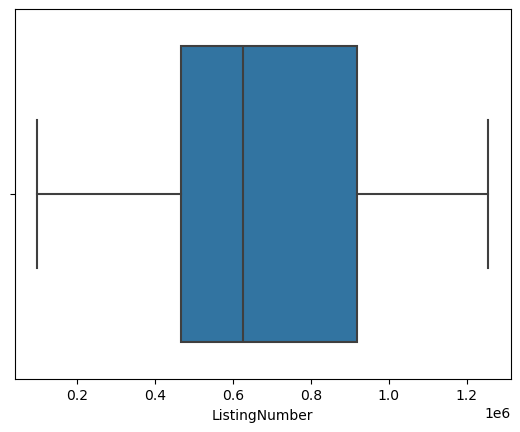

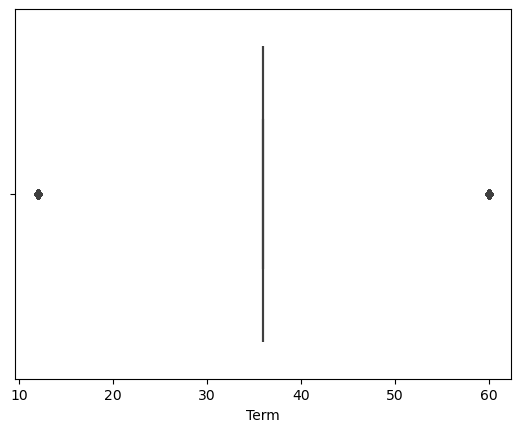

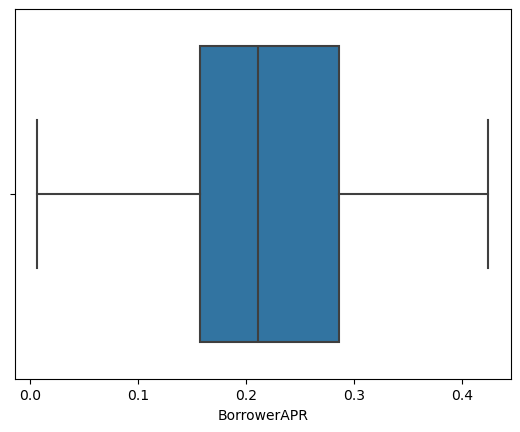

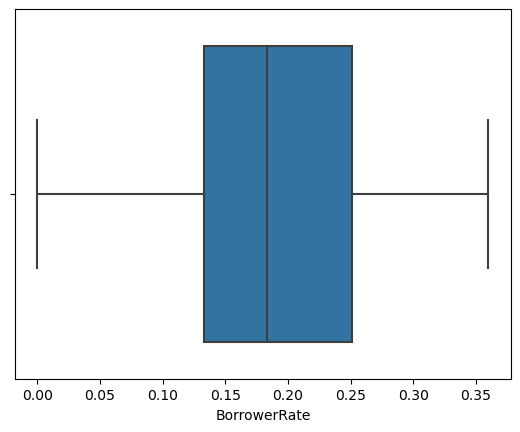

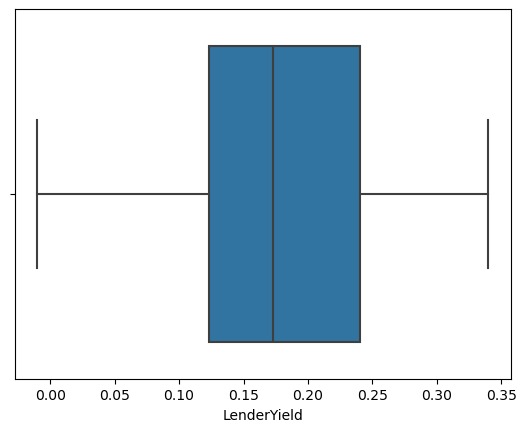

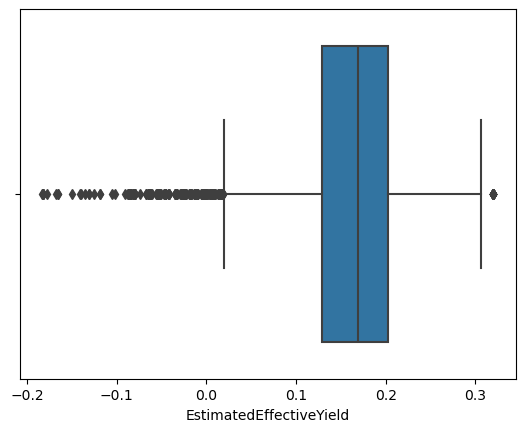

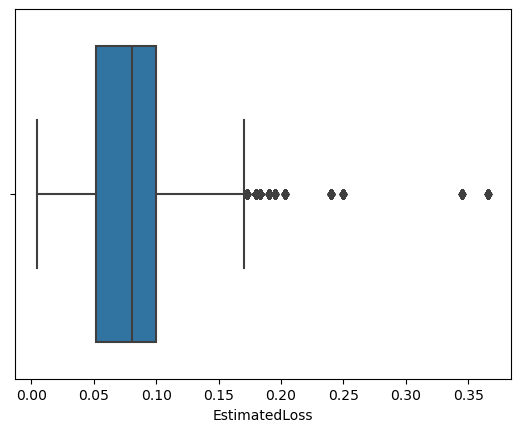

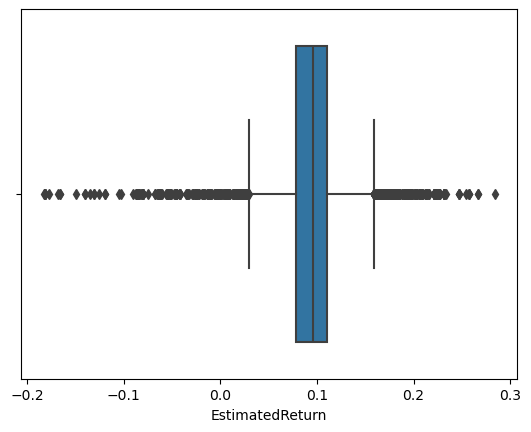

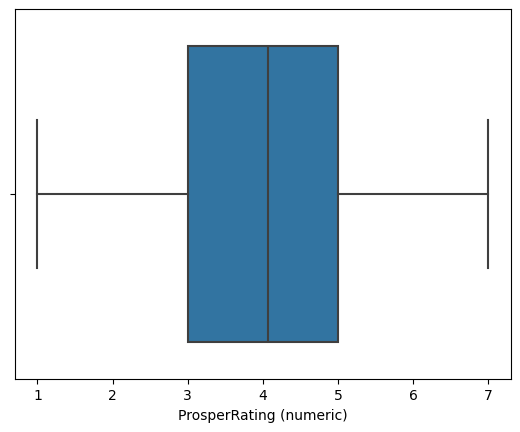

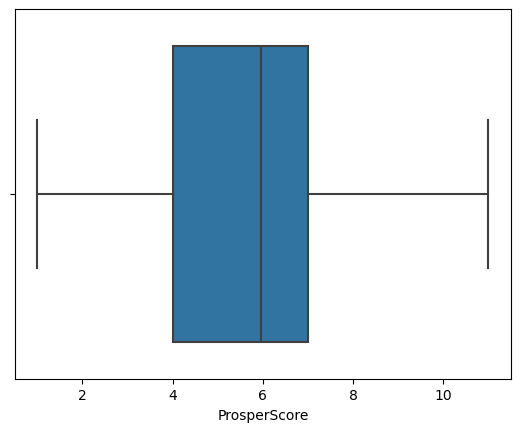

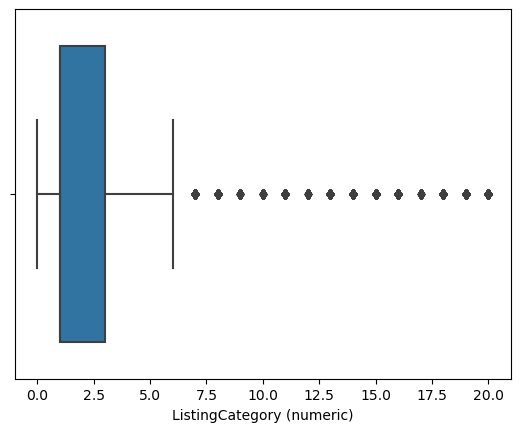

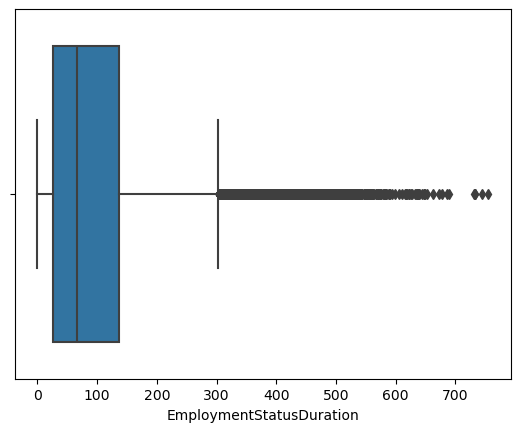

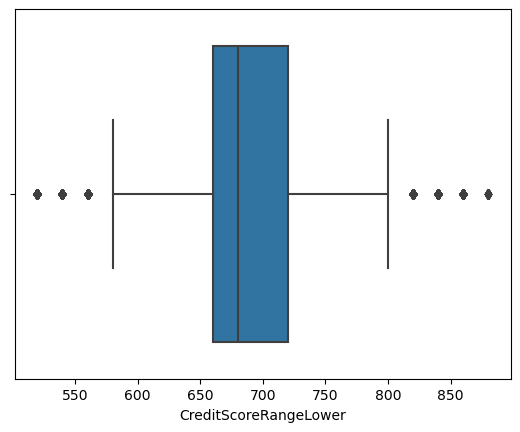

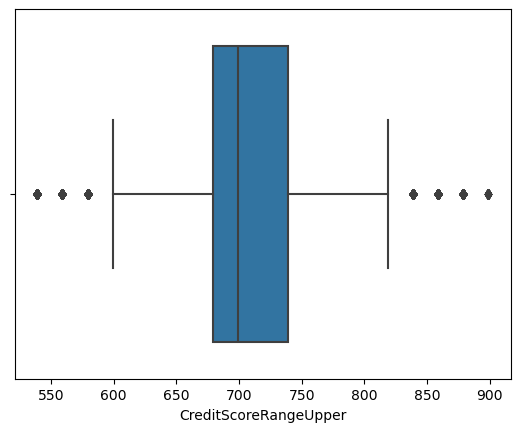

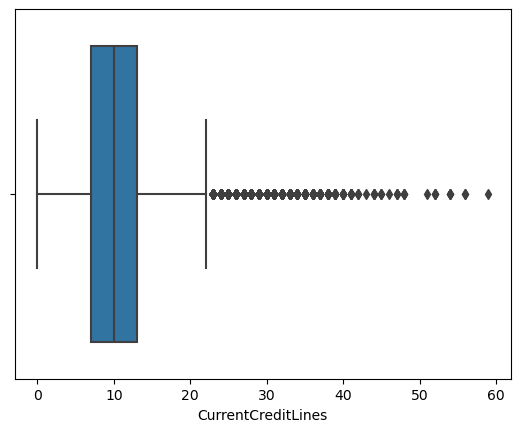

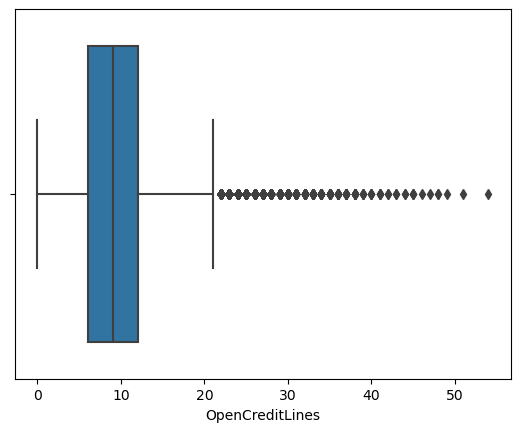

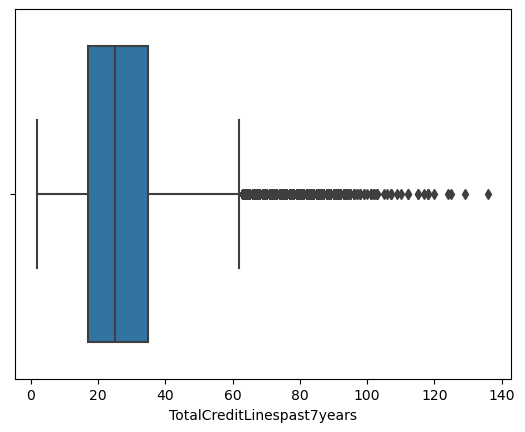

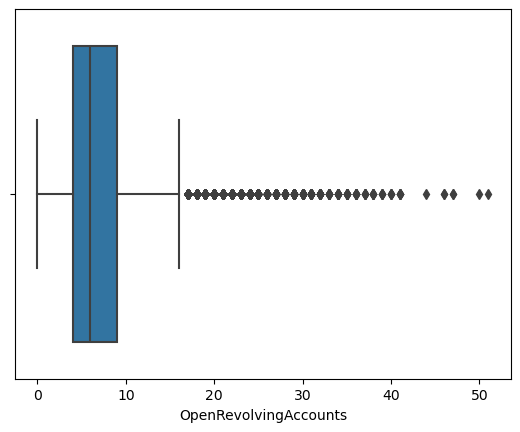

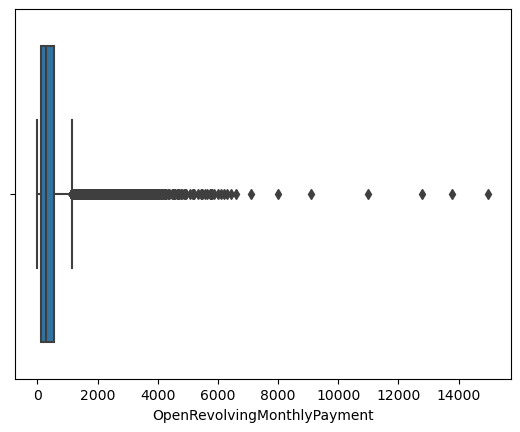

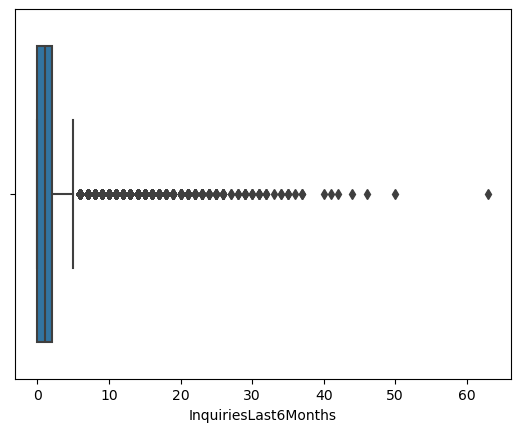

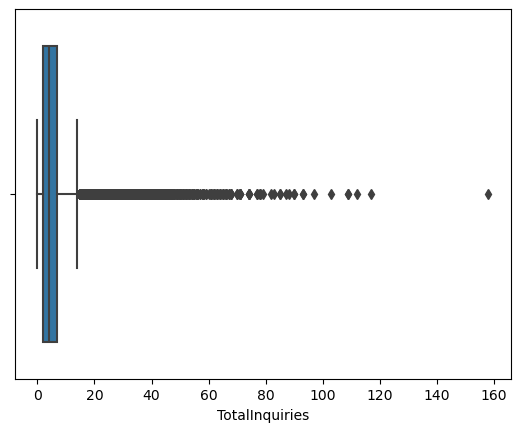

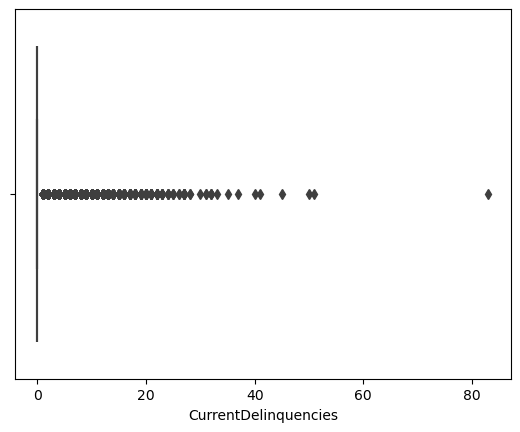

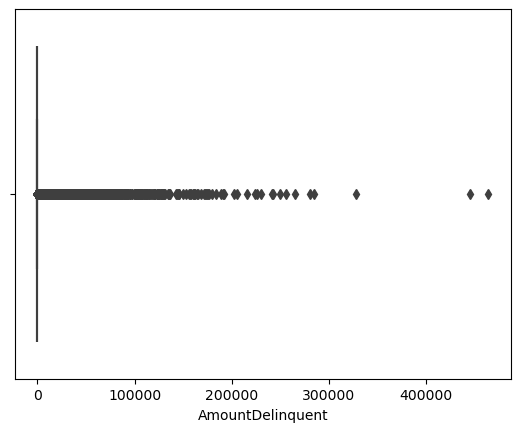

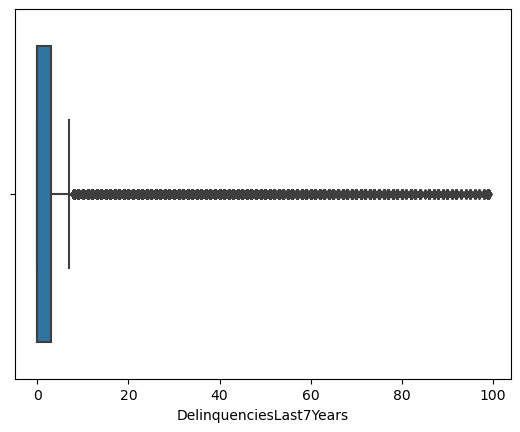

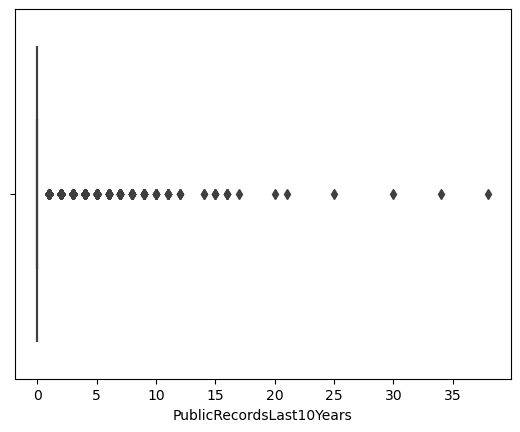

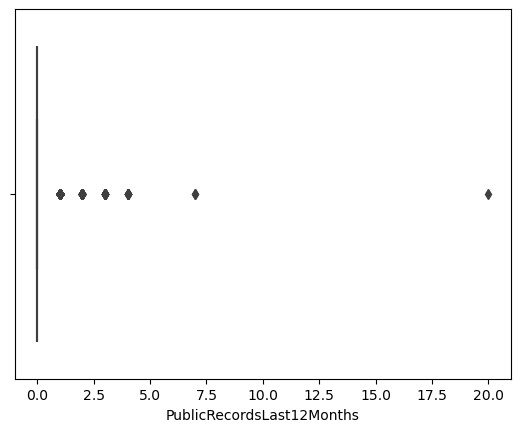

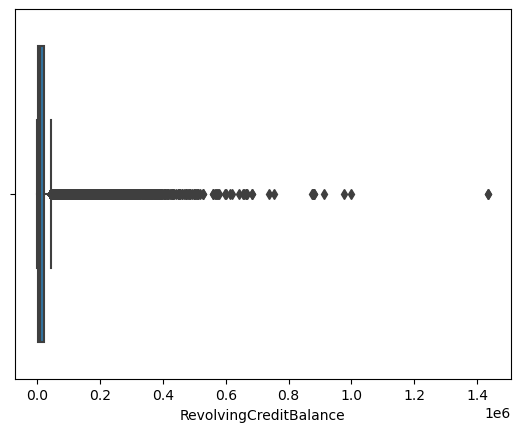

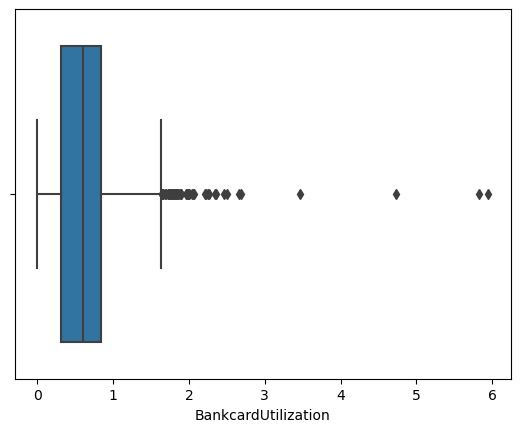

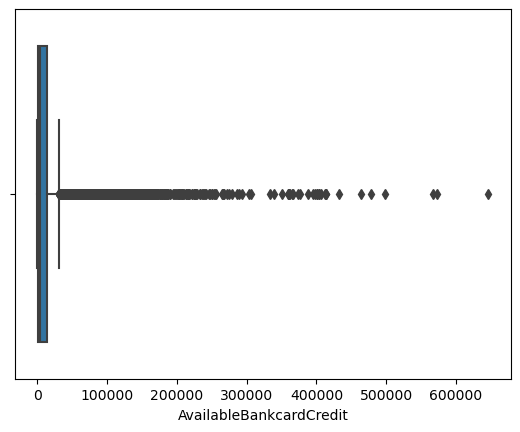

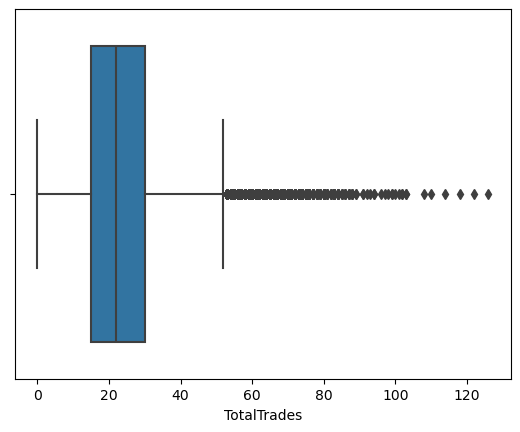

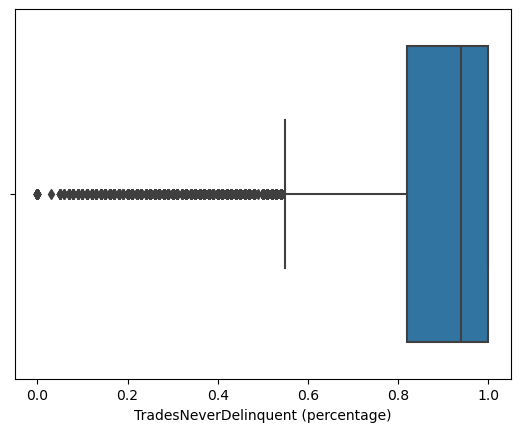

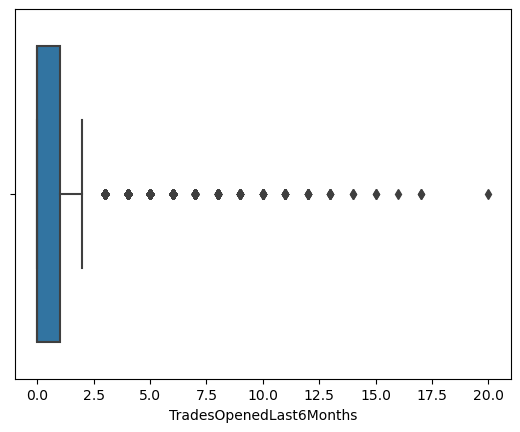

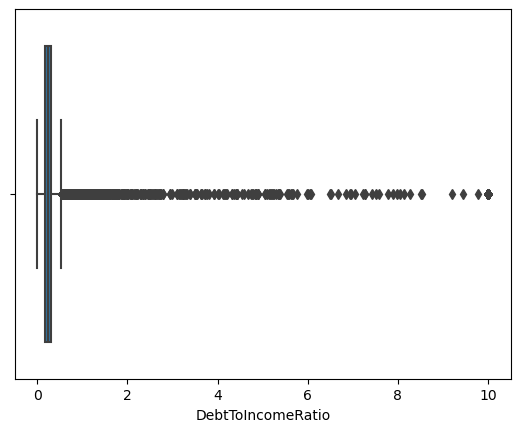

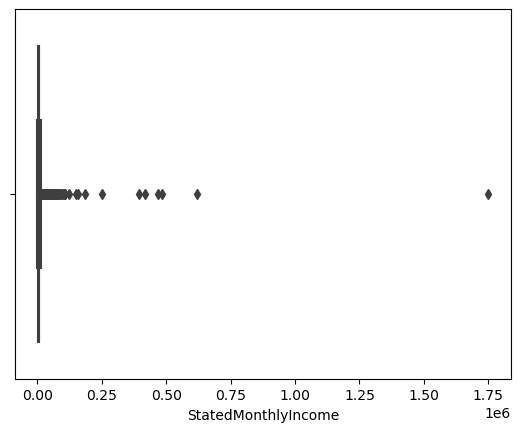

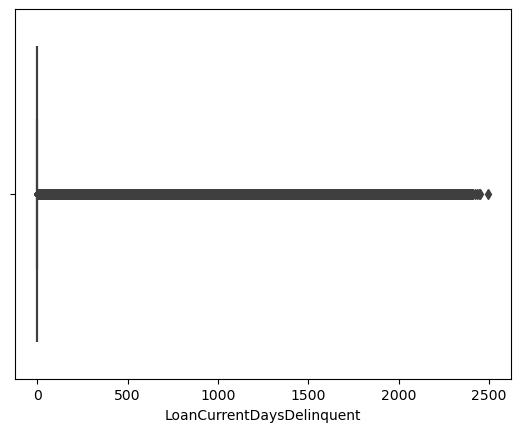

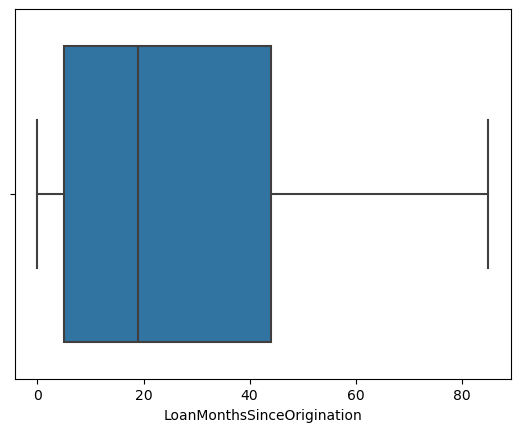

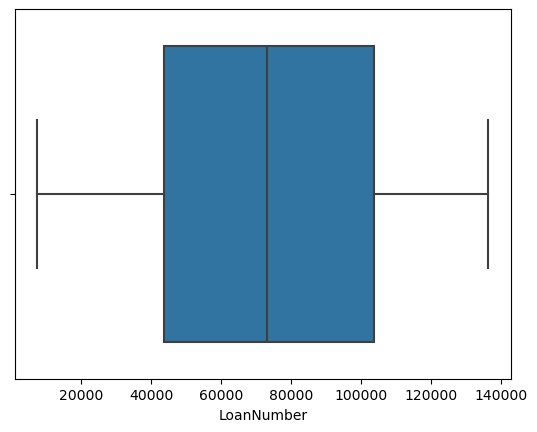

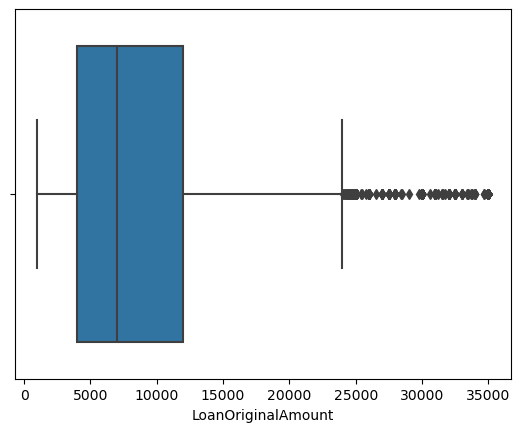

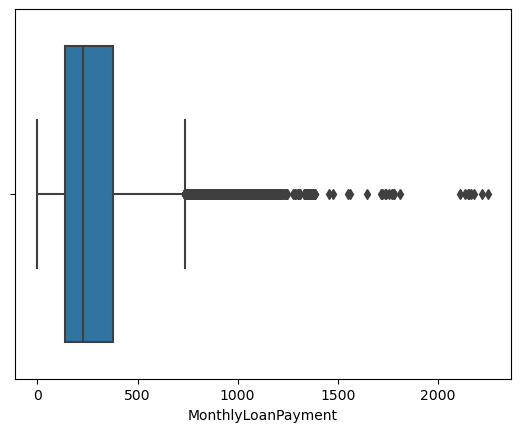

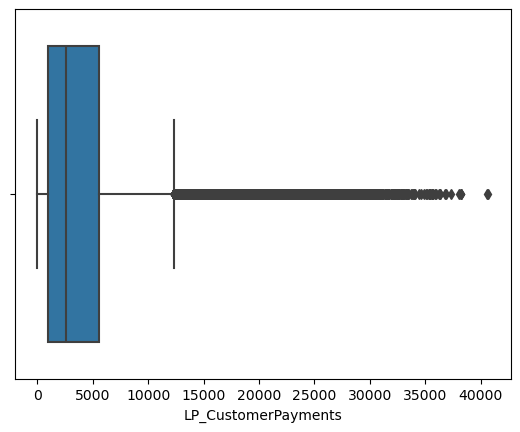

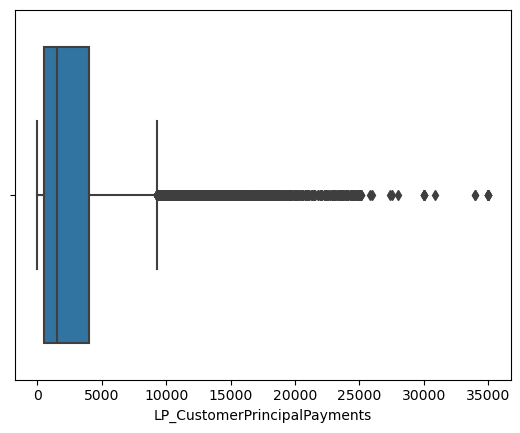

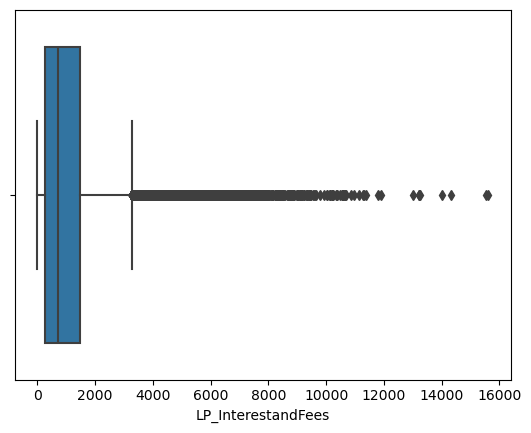

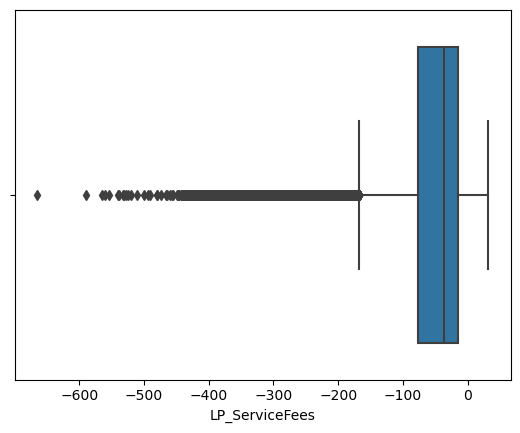

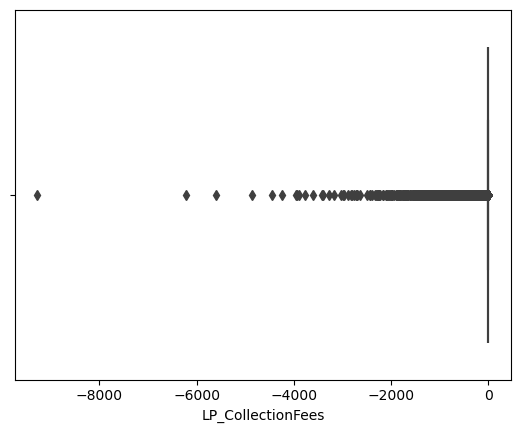

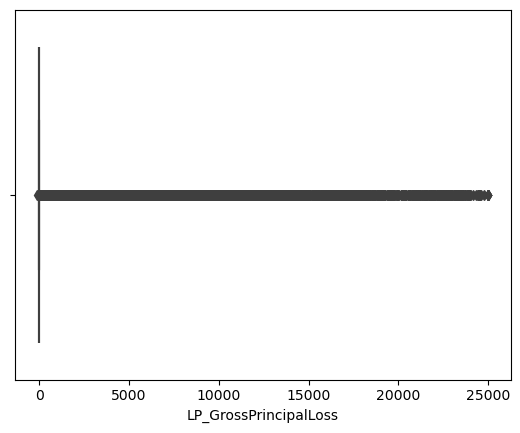

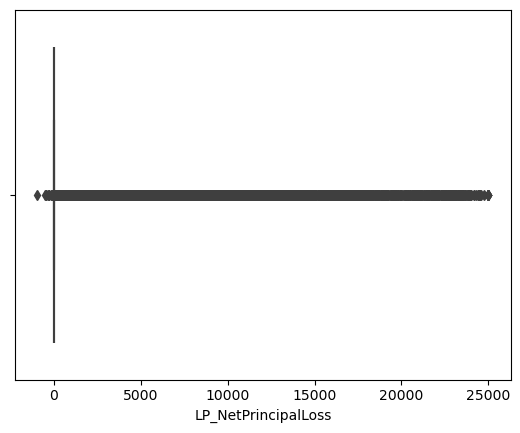

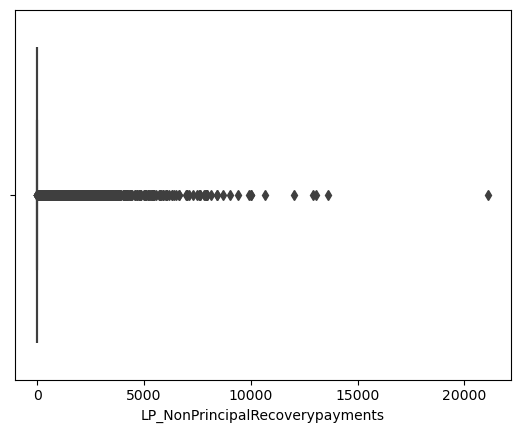

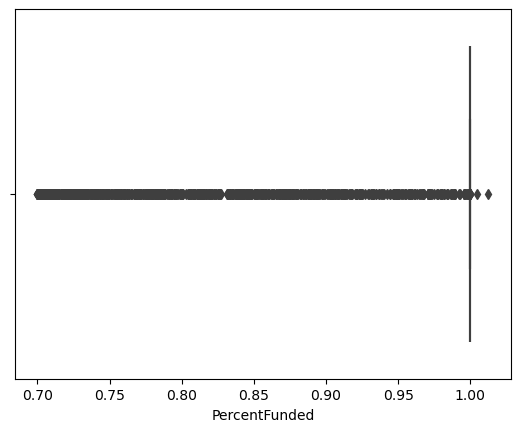

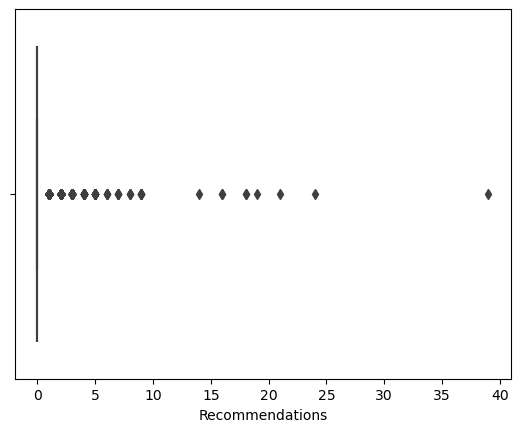

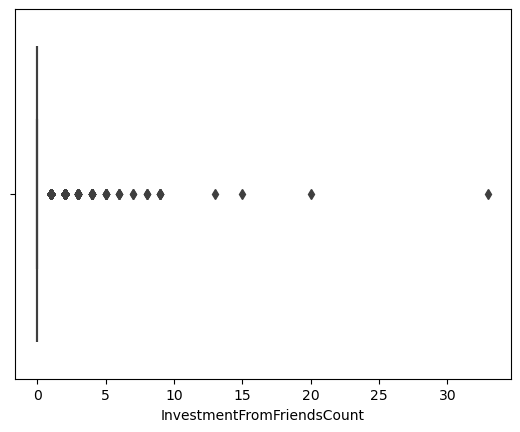

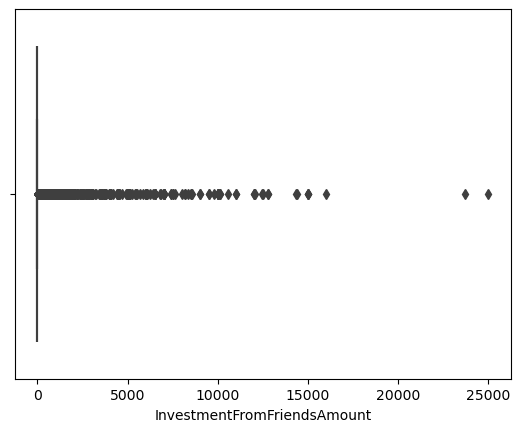

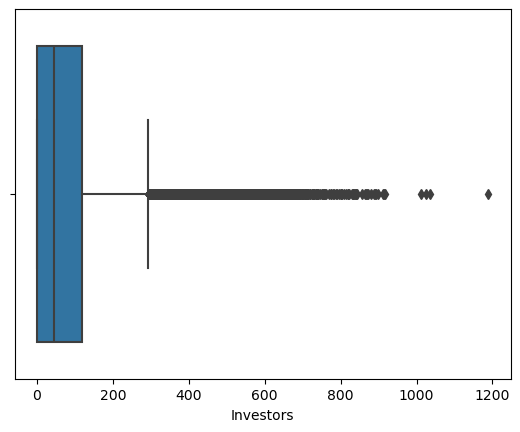

In [20]:
for i in dfclassif.select_dtypes(include = "number").columns:
    sns.boxplot(data = dfclassif, x = i)
    plt.show()

## Outlier Treatment

In [21]:
outliers = ['EstimatedLoss','EstimatedReturn','ListingCategory (numeric)','EmploymentStatusDuration',
           'CreditScoreRangeLower','CreditScoreRangeUpper','CurrentCreditLines', 'OpenCreditLines',
           'TotalCreditLinespast7years', 'OpenRevolvingAccounts','OpenRevolvingMonthlyPayment', 'InquiriesLast6Months','TotalInquiries',
            'DelinquenciesLast7Years','PublicRecordsLast10Years', 'PublicRecordsLast12Months','TotalTrades',
            'CurrentDelinquencies', 'AmountDelinquent','RevolvingCreditBalance', 'BankcardUtilization',
           'AvailableBankcardCredit','TradesOpenedLast6Months','DebtToIncomeRatio','StatedMonthlyIncome',
            'LoanOriginalAmount','MonthlyLoanPayment','LP_NetPrincipalLoss','LP_GrossPrincipalLoss', 'LP_CustomerPayments',
       'LP_CustomerPrincipalPayments', 'LP_InterestandFees','Investors']
for col in outliers:
    Q1 = dfclassif[col].quantile(0.25)
    Q3 = dfclassif[col].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR
    dfclassif[col] = np.where(dfclassif[col]<lower, lower, dfclassif[col])
    dfclassif[col] = np.where(dfclassif[col]>upper, upper, dfclassif[col])

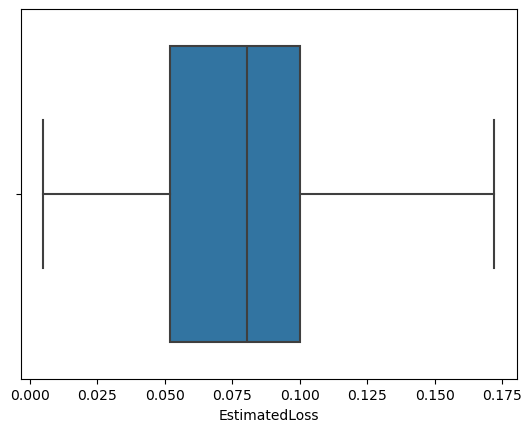

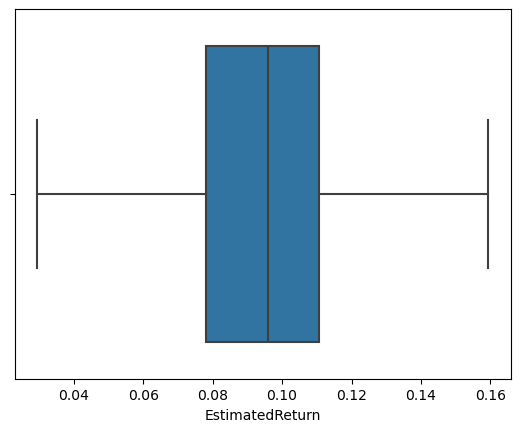

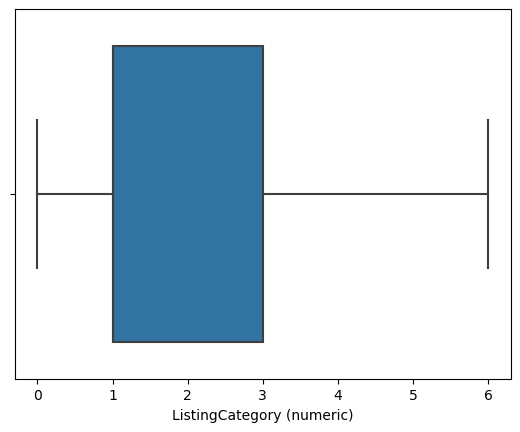

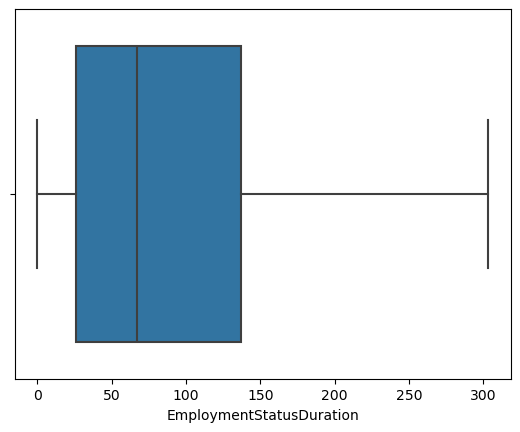

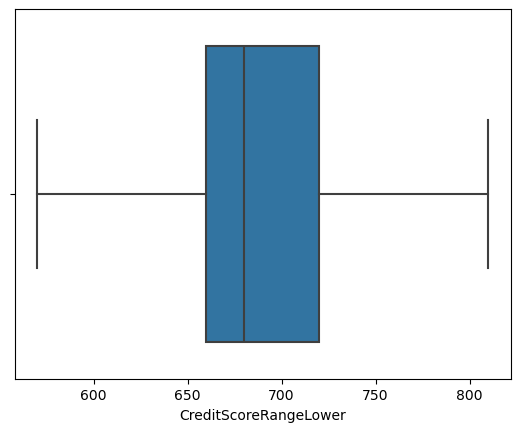

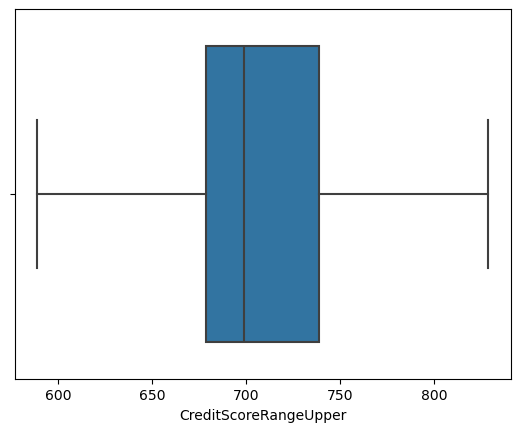

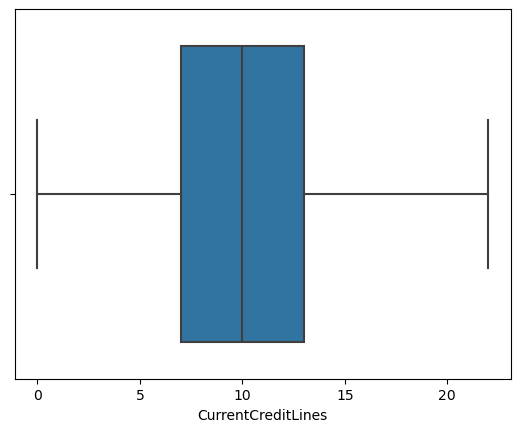

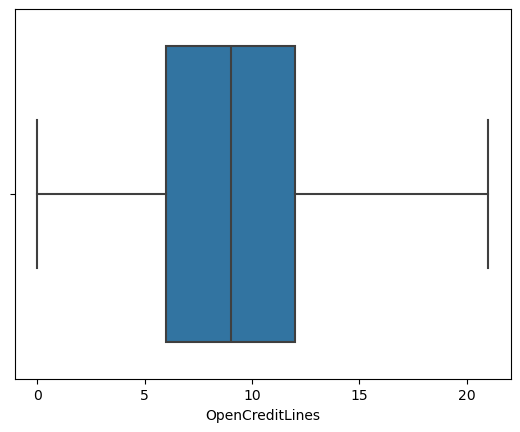

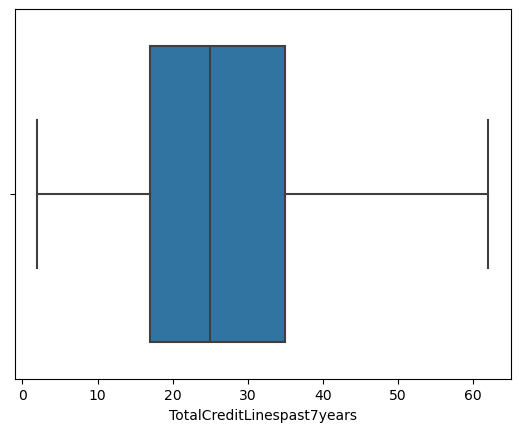

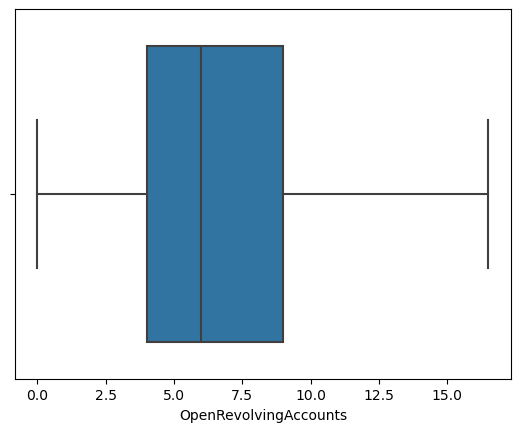

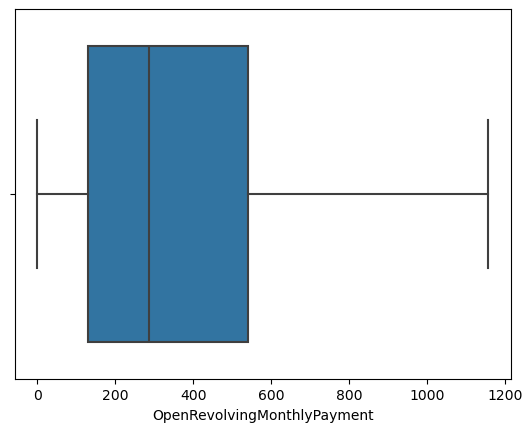

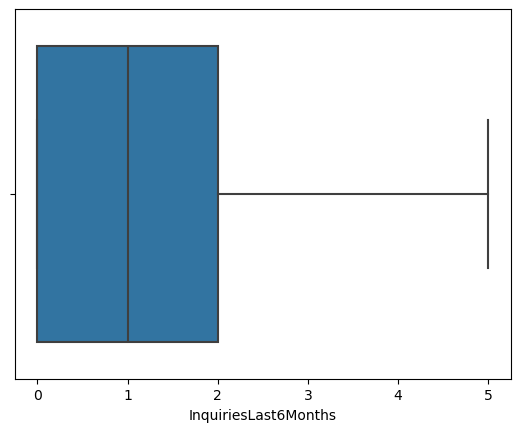

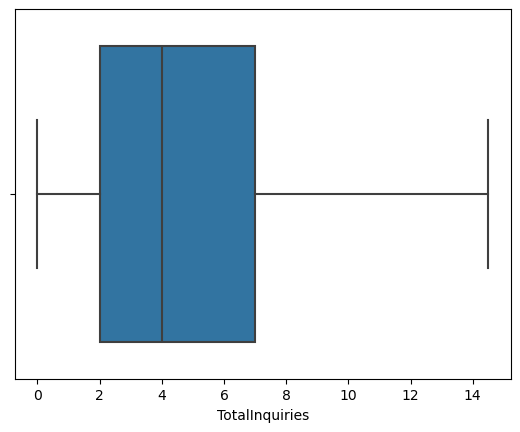

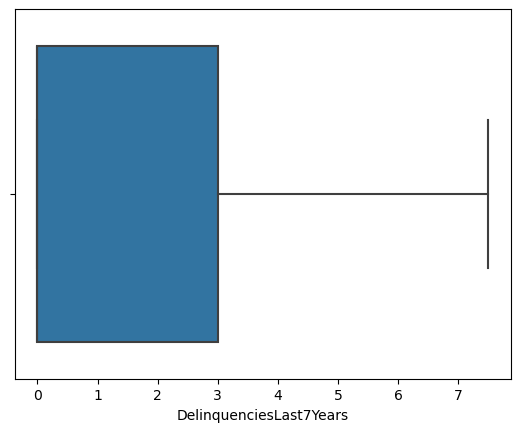

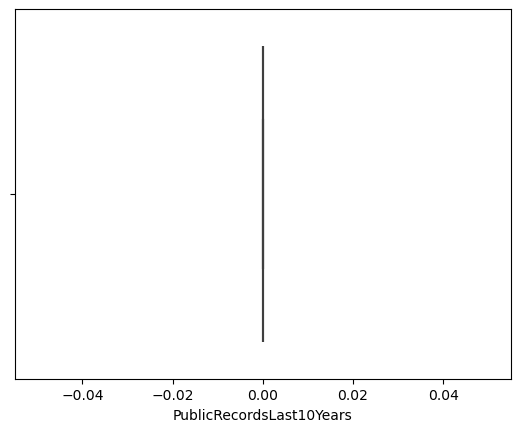

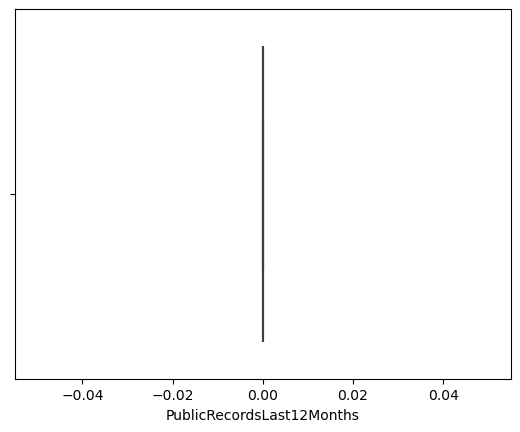

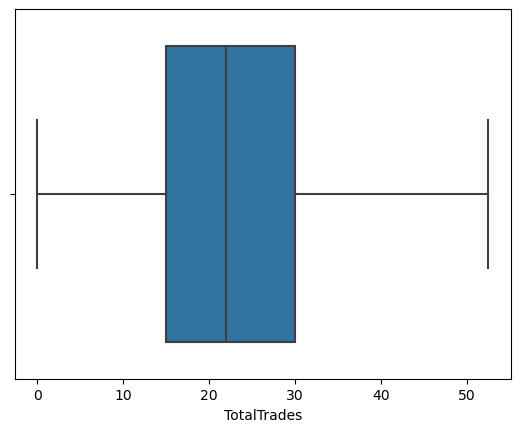

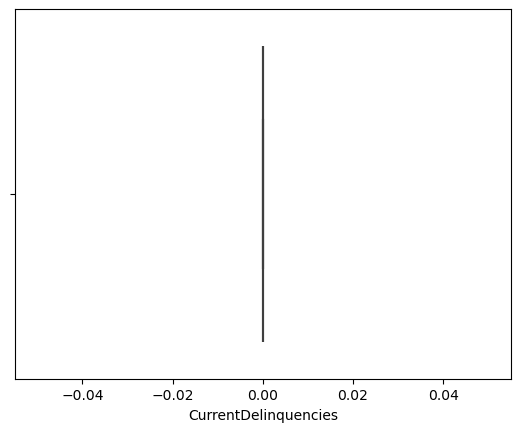

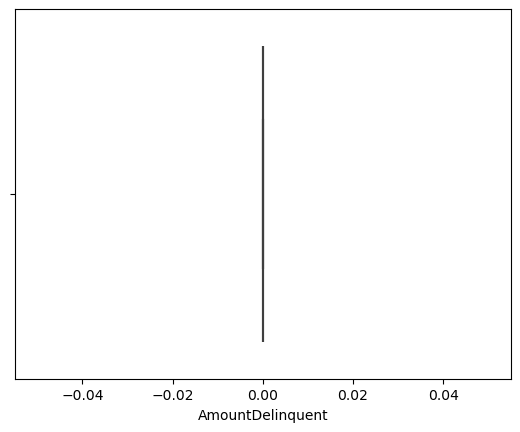

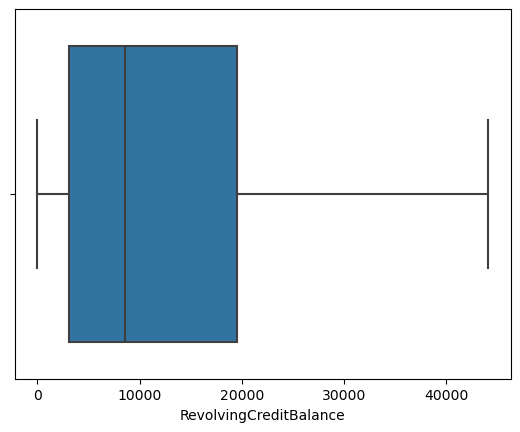

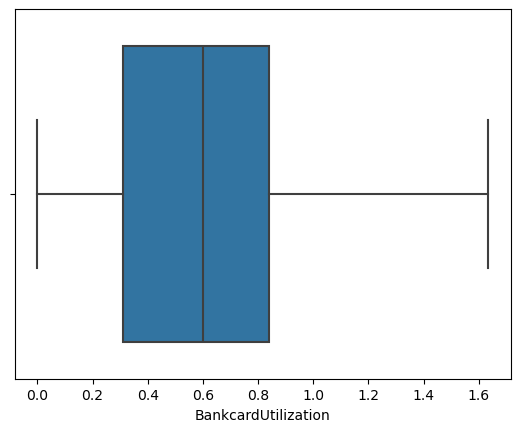

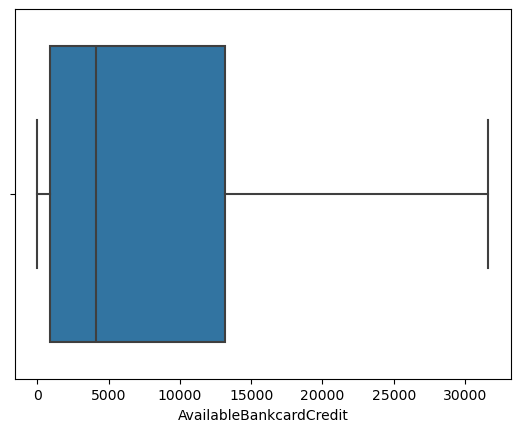

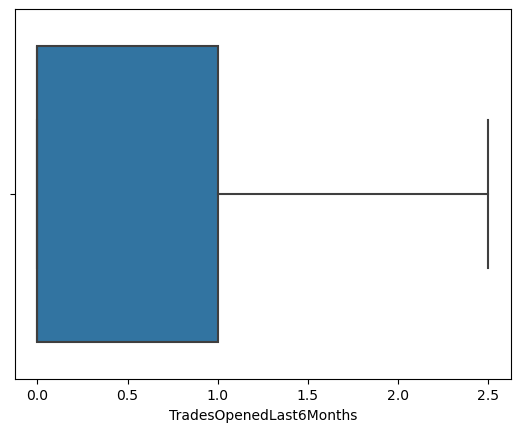

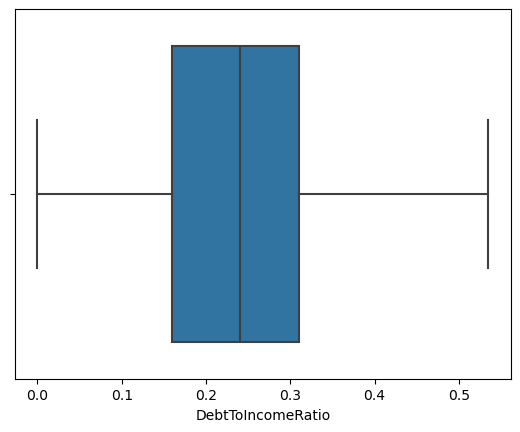

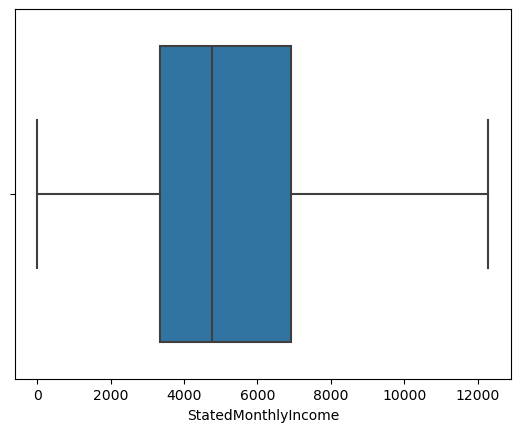

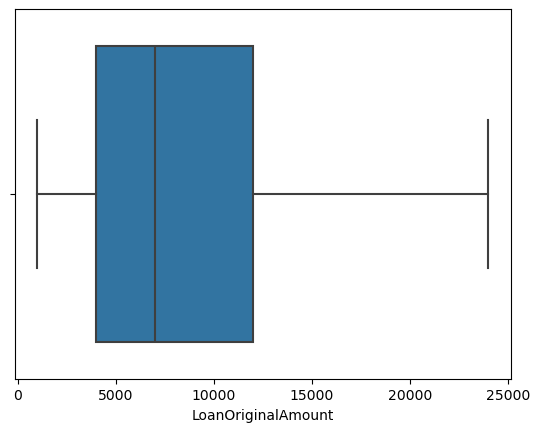

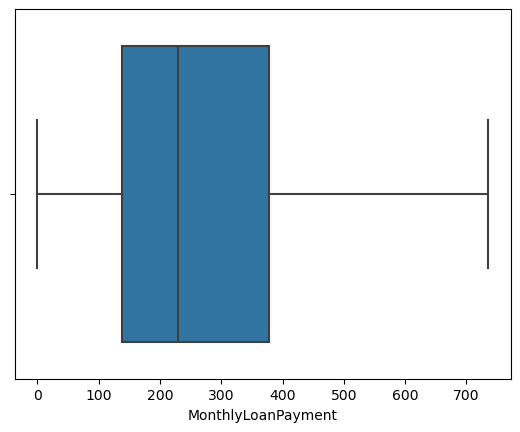

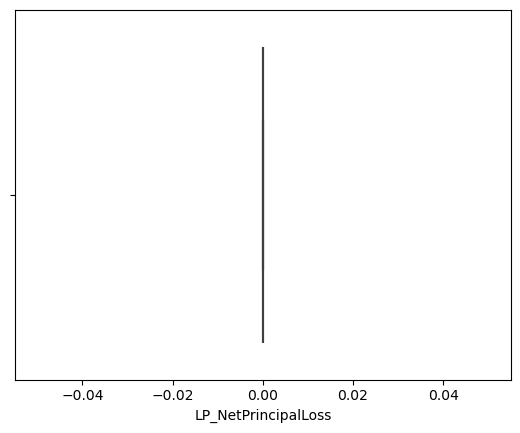

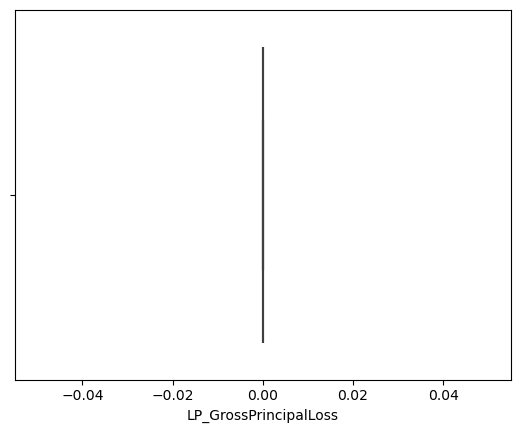

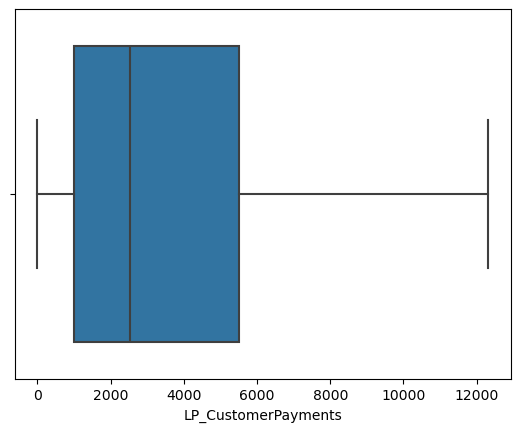

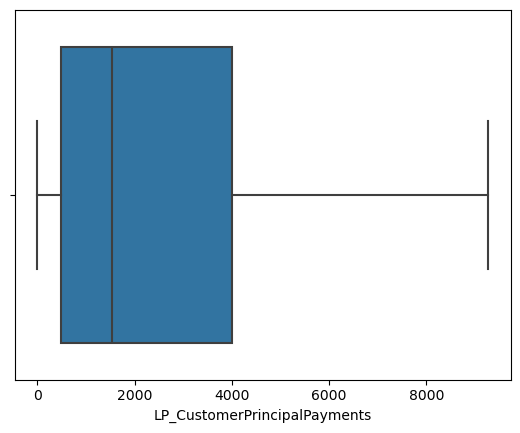

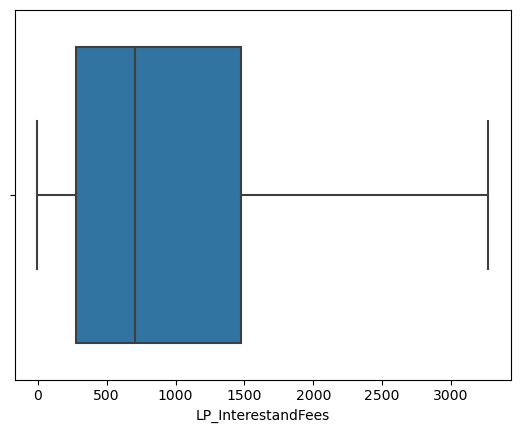

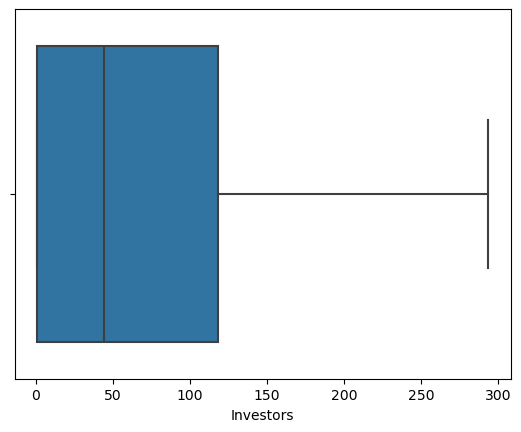

In [22]:
for i in outliers:
    sns.boxplot(data = dfclassif, x = i)
    plt.show()

In [23]:
dfclassif.shape

(106313, 71)

In [24]:
dfclassif.duplicated().sum()

0

In [205]:
dfclassif['LoanStatus'].value_counts()

LoanStatus
3     56576
2     33540
1     10634
4      3290
6       806
8       363
9       313
10      304
7       265
5       205
11       16
0         1
Name: count, dtype: int64

# **Classification**

## Data Labelling
#### (Binary Classification)

Step 1: Deal with 'ClosedDate'

Step 2: Deal with 'LoanCurrentDaysDelinquent'

In [26]:
dfclassif['Status'] = dfclassif['ClosedDate'].apply(lambda x:1 if pd.isnull(x) else 0)

#### This marks loans that are still active as 1, indicating potential risk.

In [27]:
dfclassif['Status'] = dfclassif['LoanCurrentDaysDelinquent'].apply(lambda x:1 if x>180 else 0)

#### This updates the status to 1 for loans that are significantly overdue (more than 180 days), indicating high risk of default.

In [28]:
dfclassif['Status'].value_counts()

Status
0    93812
1    12501
Name: count, dtype: int64

In [29]:
catcols = dfclassif.select_dtypes(include = ['object', 'bool']).columns

In [30]:
print(catcols)

Index(['ListingKey', 'ListingCreationDate', 'CreditGrade', 'LoanStatus',
       'ClosedDate', 'ProsperRating (Alpha)', 'BorrowerState', 'Occupation',
       'EmploymentStatus', 'IsBorrowerHomeowner', 'CurrentlyInGroup',
       'DateCreditPulled', 'FirstRecordedCreditLine', 'IncomeRange',
       'IncomeVerifiable', 'LoanKey', 'LoanOriginationDate',
       'LoanOriginationQuarter', 'MemberKey'],
      dtype='object')


In [31]:
dfclassif.shape

(106313, 72)

#### Creating a copy of the 'X' to save the cleaned dataset with original values which is further used for Regression.

In [32]:
X = dfclassif.drop(columns = ['Status'])
y = dfclassif['Status']

In [33]:
X_temp = X.copy()

In [34]:
numcols = X_temp.select_dtypes(include = ['number']).columns
catcols = X_temp.select_dtypes(include = ['object', 'bool']).columns

In [35]:
from sklearn.preprocessing import LabelEncoder
encoder  = {}
for col in catcols:
    le = LabelEncoder()
    X_temp[col] = le.fit_transform(X_temp[col])
    encoder[col] = le

In [36]:
print(X_temp.select_dtypes(include = "object").columns)

Index([], dtype='object')


In [37]:
from sklearn.feature_selection import mutual_info_classif
#miscores_dfis for finding the important mi scores
miscores = mutual_info_classif(X_temp, y, random_state = 42)
miscores_df =pd.DataFrame({'Feature': X_temp.columns, 'Importance': miscores})

In [38]:
#Finding the top 50 MI Scores
top_miscores = miscores_df.nlargest(50, 'Importance')['Feature']
print("Top 50 features from Mutual Information\n")
print(top_miscores)

Top 50 features from Mutual Information

50             LoanCurrentDaysDelinquent
5                             LoanStatus
6                             ClosedDate
12                       EstimatedReturn
11                         EstimatedLoss
54                   LoanOriginationDate
52                            LoanNumber
7                            BorrowerAPR
23                      DateCreditPulled
55                LoanOriginationQuarter
10               EstimatedEffectiveYield
51            LoanMonthsSinceOrigination
2                    ListingCreationDate
1                          ListingNumber
9                            LenderYield
8                           BorrowerRate
59          LP_CustomerPrincipalPayments
13               ProsperRating (numeric)
15                          ProsperScore
57                    MonthlyLoanPayment
58                   LP_CustomerPayments
3                            CreditGrade
65       LP_NonPrincipalRecoverypayments
19              

In [39]:
remaining = miscores_df[~miscores_df['Feature'].isin(top_miscores)]['Feature']
print("Remaining Features\n")
print(remaining)

Remaining Features

0                      ListingKey
17                  BorrowerState
18                     Occupation
20       EmploymentStatusDuration
26        FirstRecordedCreditLine
27             CurrentCreditLines
29     TotalCreditLinespast7years
34           CurrentDelinquencies
35               AmountDelinquent
36        DelinquenciesLast7Years
37       PublicRecordsLast10Years
38      PublicRecordsLast12Months
42                    TotalTrades
44        TradesOpenedLast6Months
45              DebtToIncomeRatio
49                        LoanKey
63          LP_GrossPrincipalLoss
64            LP_NetPrincipalLoss
67                Recommendations
68     InvestmentFromFriendsCount
69    InvestmentFromFriendsAmount
Name: Feature, dtype: object


#### Removing some features which has least importance with the target variable.

In [40]:
dropcols = ['InvestmentFromFriendsAmount','InvestmentFromFriendsCount','Recommendations','LoanKey','PublicRecordsLast12Months','PublicRecordsLast10Years',
           'TotalCreditLinespast7years','CurrentDelinquencies','LP_GrossPrincipalLoss','LP_NetPrincipalLoss','LoanKey','FirstRecordedCreditLine']
X_temp = X_temp.drop(columns = dropcols)
X = X.drop(columns = dropcols)

In [41]:
X.shape

(106313, 60)

In [42]:
dfclassif = pd.concat([X,y], axis = 1)
dfclassif.shape

(106313, 61)

#### Saving the cleaned and processed data into a csv file. 

In [43]:
dfclassif.to_csv('FinalProsperLoanDataForReg.csv', index = False)

## Data Encoding
Before categorical data can be utilized as input to a machine learning model, it must first be transformed into numerical data.

In [44]:
numcols = dfclassif.select_dtypes(include = "number").columns
catcols = dfclassif.select_dtypes(include = ["object","bool"]).columns

### Label Encoding is done for the categorical columns.

In [45]:
encoder = LabelEncoder()
for col in catcols:
    dfclassif[col] = encoder.fit_transform(dfclassif[col]) 

In [46]:
dfclassif.select_dtypes(include = ["object","bool"]).columns

Index([], dtype='object')

In [47]:
dfclassif.head()

ListingKey  ListingNumber  ListingCreationDate  CreditGrade  Term  \
0        6702         193129                 6569            3    36   
1        6715        1209647               104269            3    36   
3        6228         658116                57135            3    36   
4        6244         909464                78342            3    36   
5        6247        1074836                92685            3    60   

   LoanStatus  ClosedDate  BorrowerAPR  BorrowerRate  LenderYield  ...  \
0           2         817      0.16516        0.1580       0.1380  ...   
1           3        2476      0.12016        0.0920       0.0820  ...   
3           3        2476      0.12528        0.0974       0.0874  ...   
4           3        2476      0.24614        0.2085       0.1985  ...   
5           3        2476      0.15425        0.1314       0.1214  ...   

   MonthlyLoanPayment  LP_CustomerPayments  LP_CustomerPrincipalPayments  \
0              330.43             11396.14                       9272.20   
1              318.93                 0.00                          0.00   
3              321.45              5143.20                       4091.09   
4              563.97              2819.85                       1563.22   
5              342.37               679.34                        351.89   

   LP_InterestandFees  LP_ServiceFees  LP_CollectionFees  \
0             1971.14         -133.18                0.0   
1                0.00            0.00                0.0   
3             1052.11         -108.01                0.0   
4             1256.63          -60.27                0.0   
5              327.45          -25.33                0.0   

   LP_NonPrincipalRecoverypayments  PercentFunded  Investors  Status  
0                              0.0            1.0      258.0       0  
1                              0.0            1.0        1.0       0  
3                              0.0            1.0      158.0       0  
4                              0.0            1.0       20.0       0  
5                              0.0            1.0        1.0       0  

[5 rows x 61 columns]

## EDA-Exploratory Data Analysis


### 1. Univariate Data Analysis

#### Histogram for Numerical features

In [48]:
import warnings 
warnings.filterwarnings("ignore")

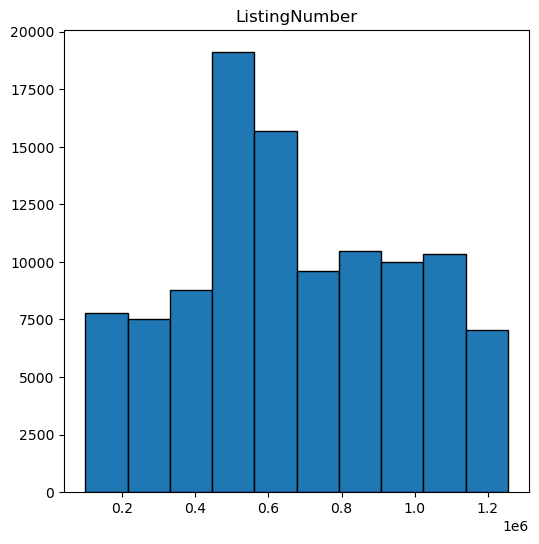

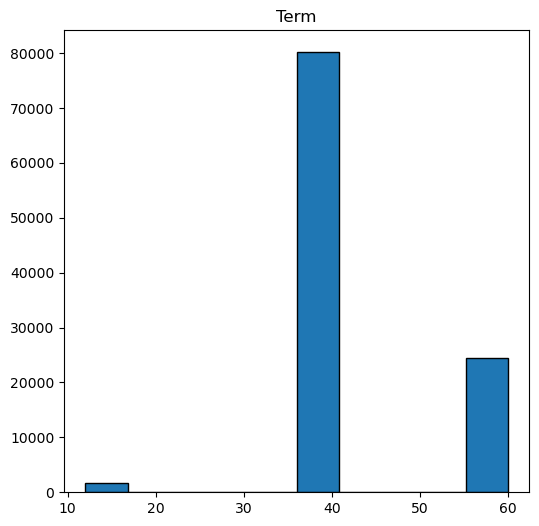

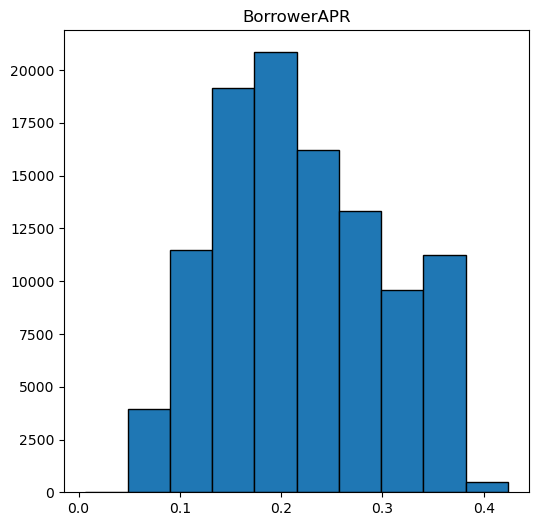

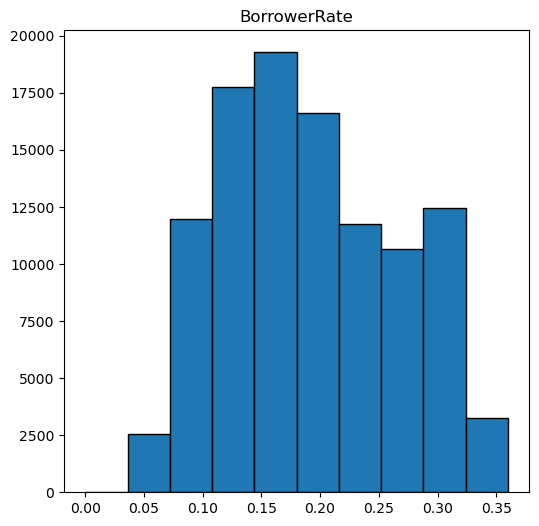

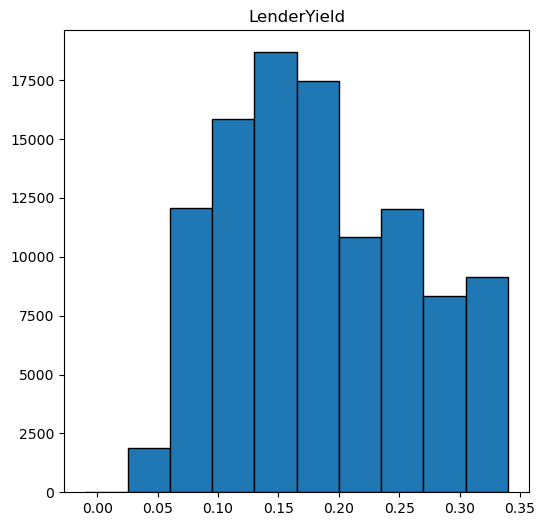

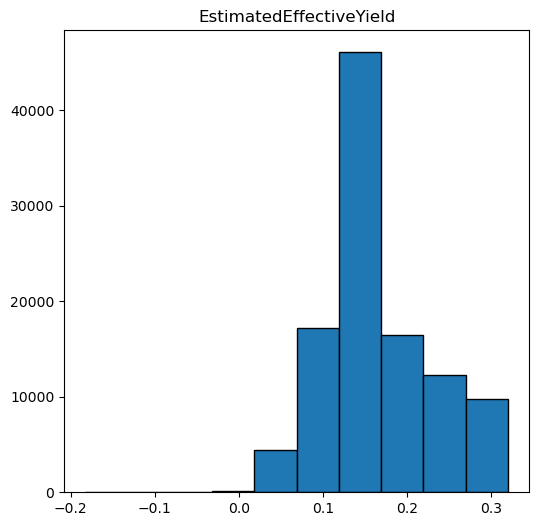

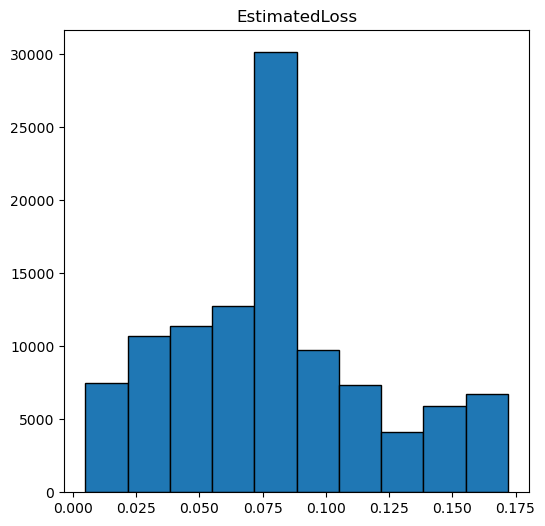

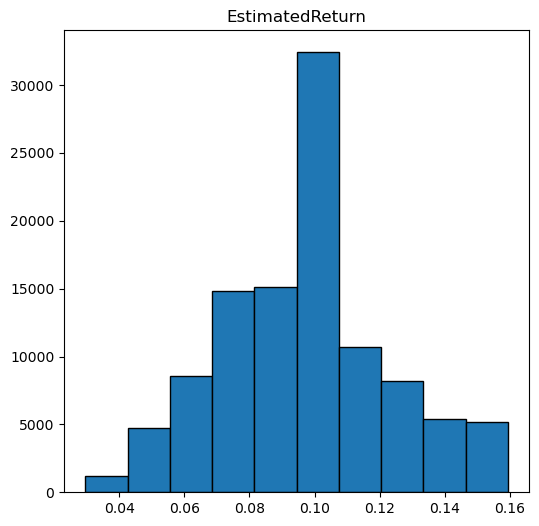

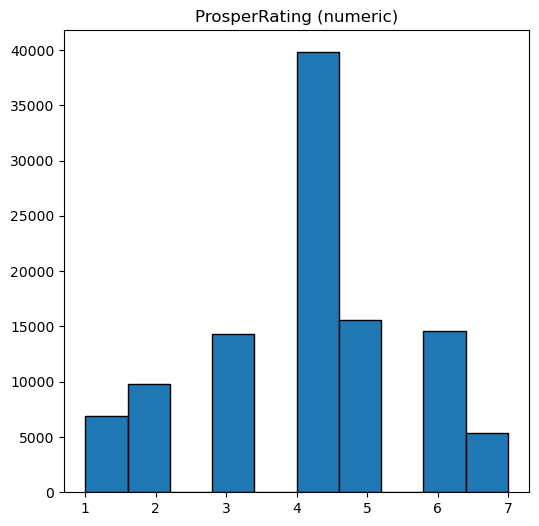

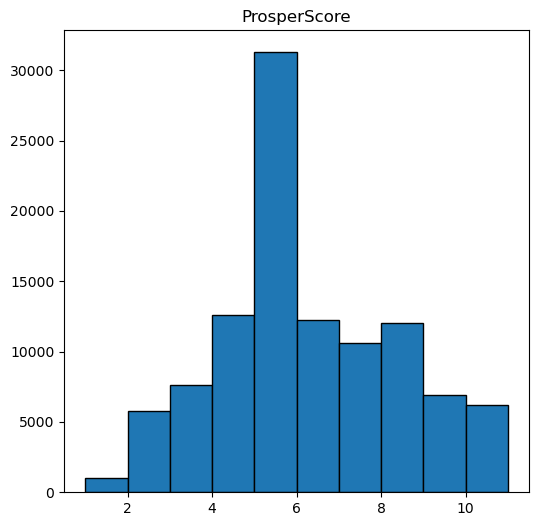

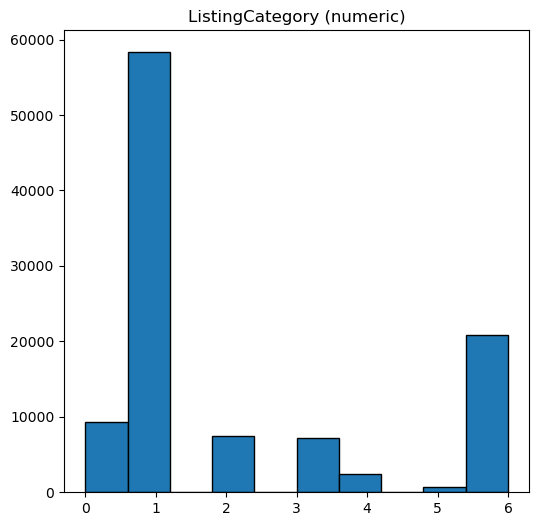

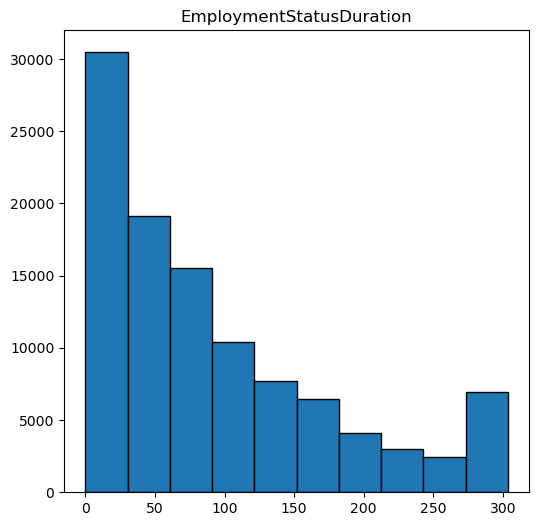

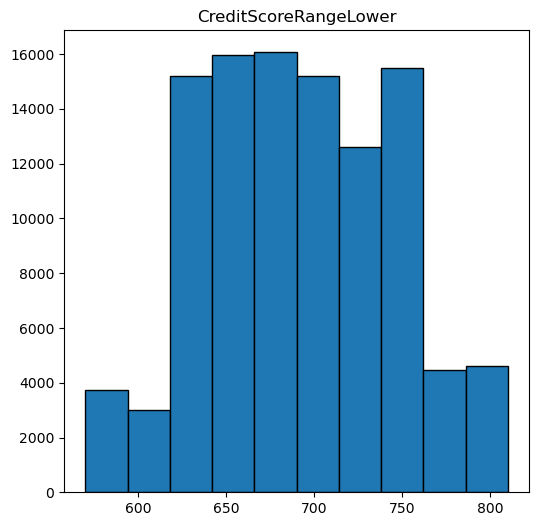

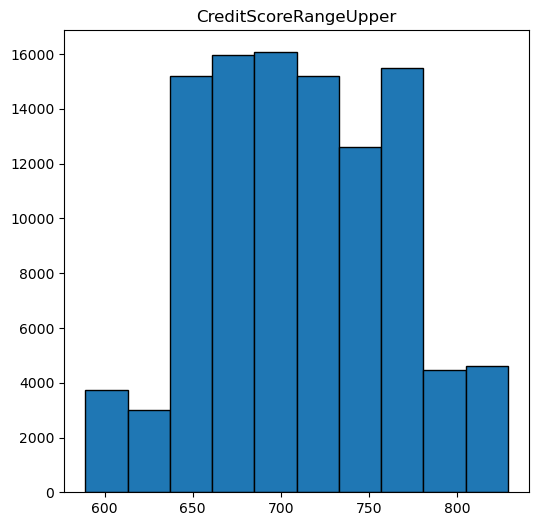

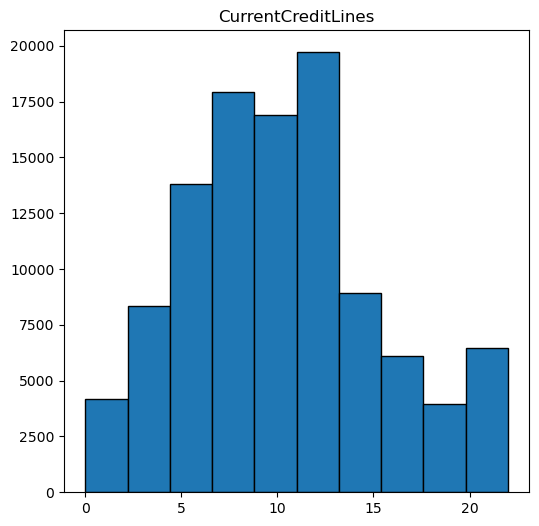

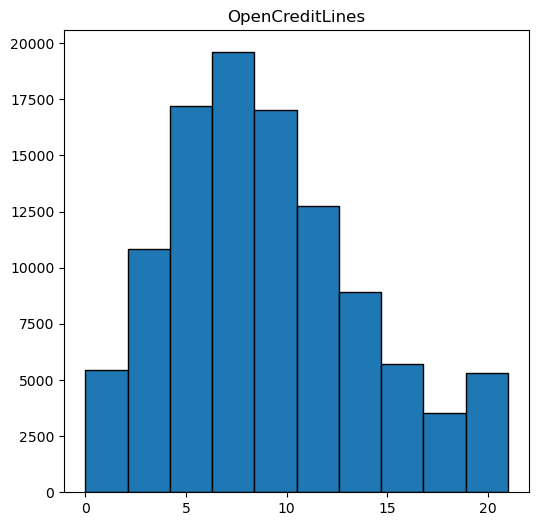

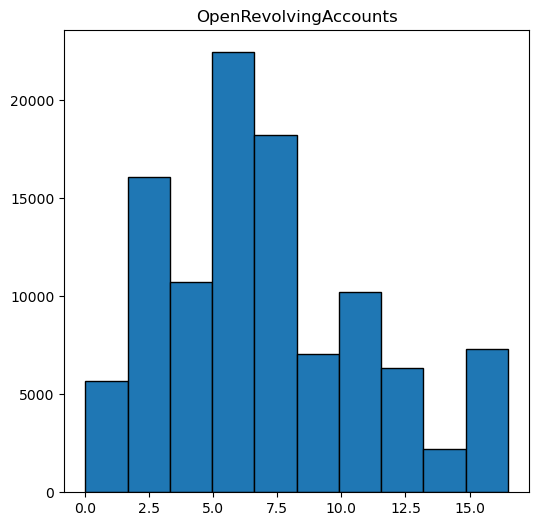

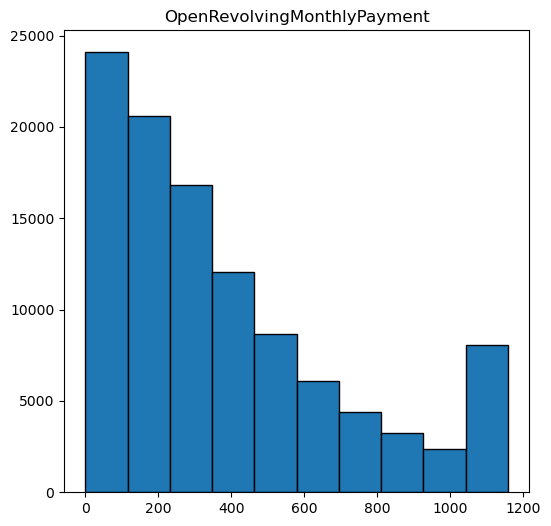

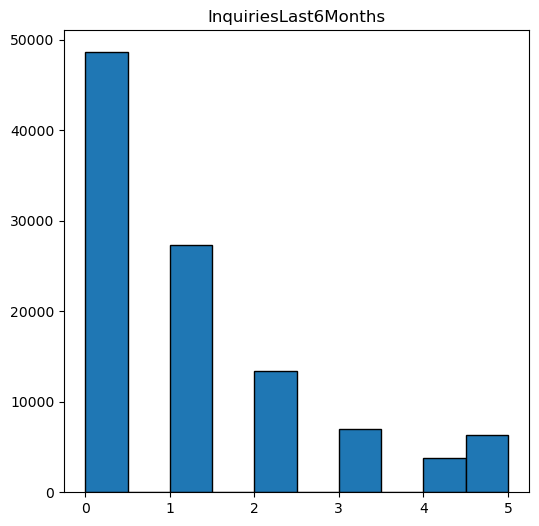

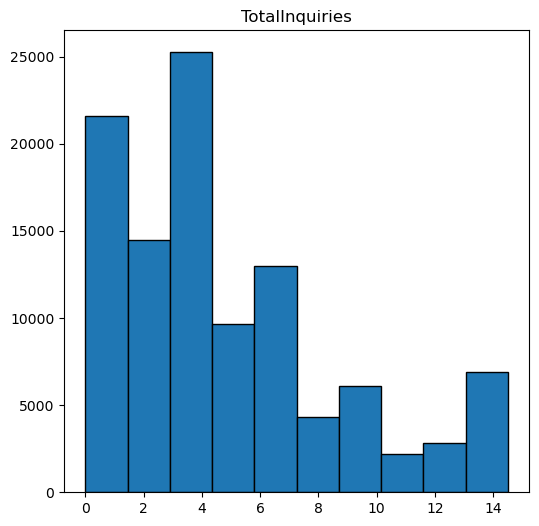

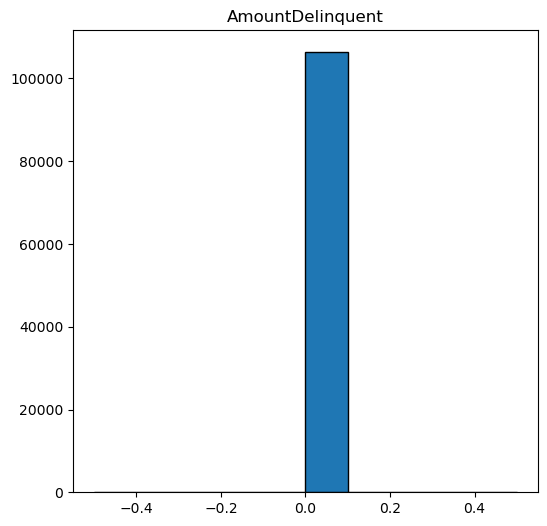

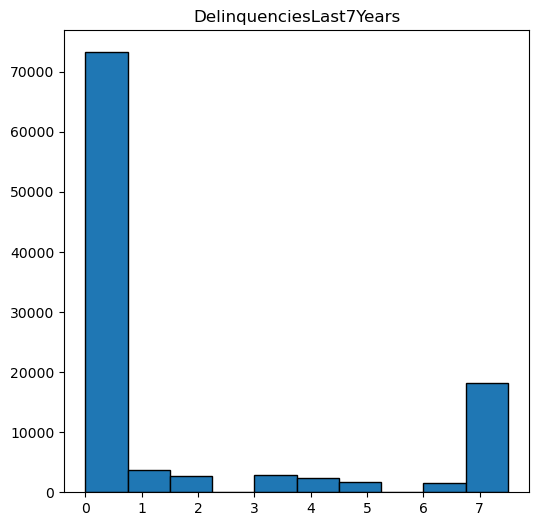

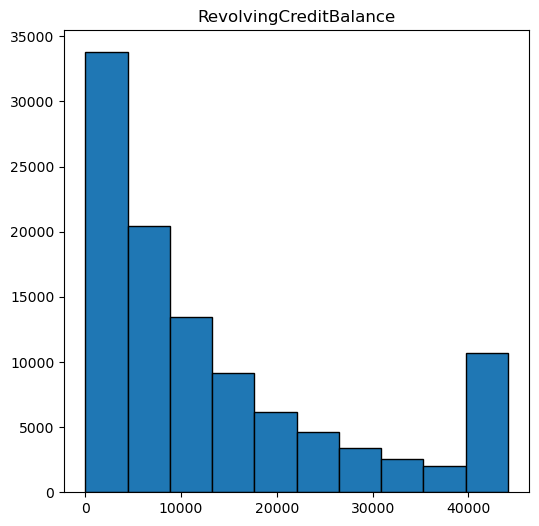

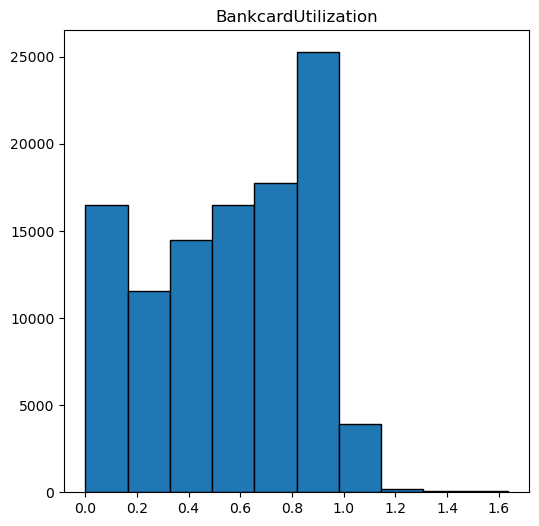

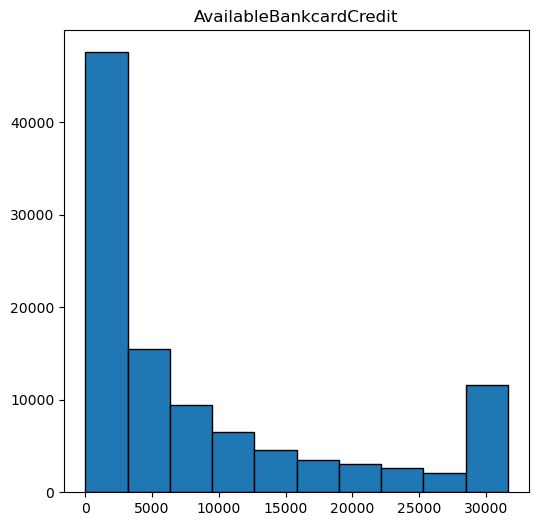

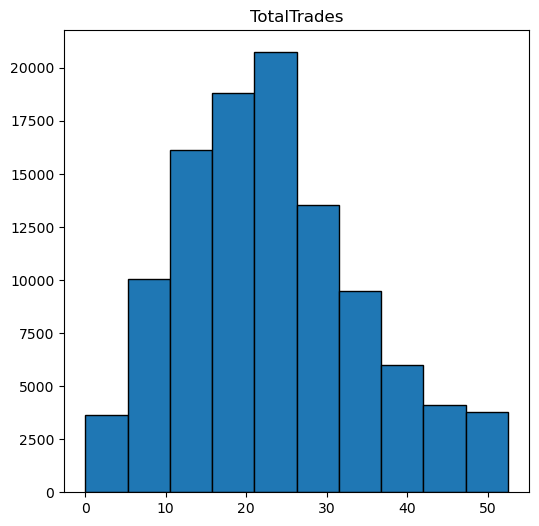

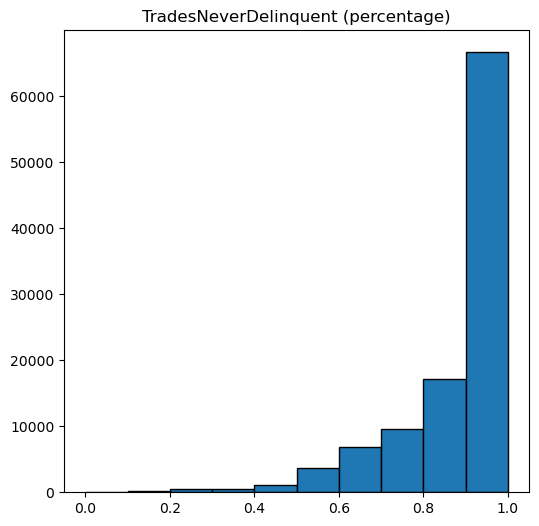

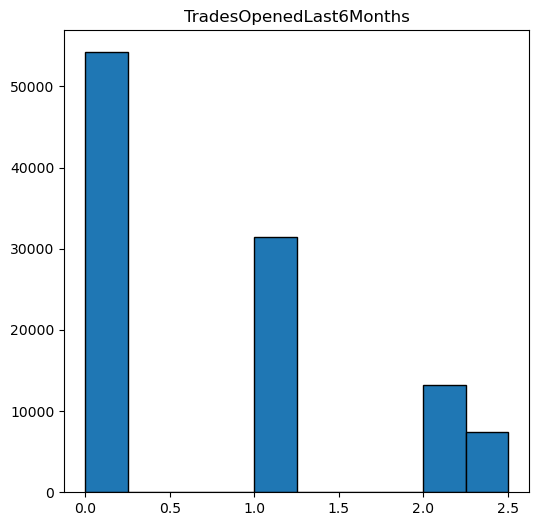

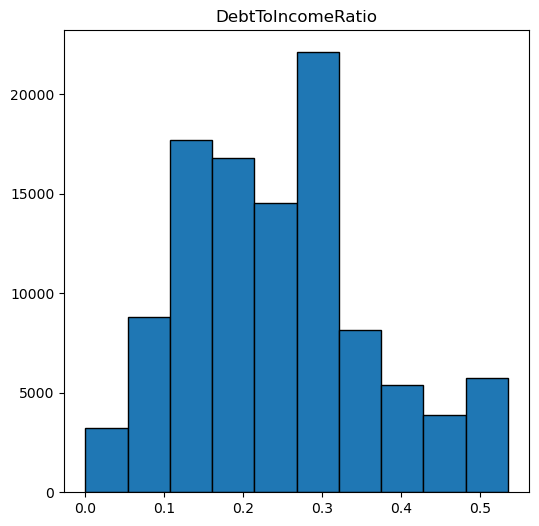

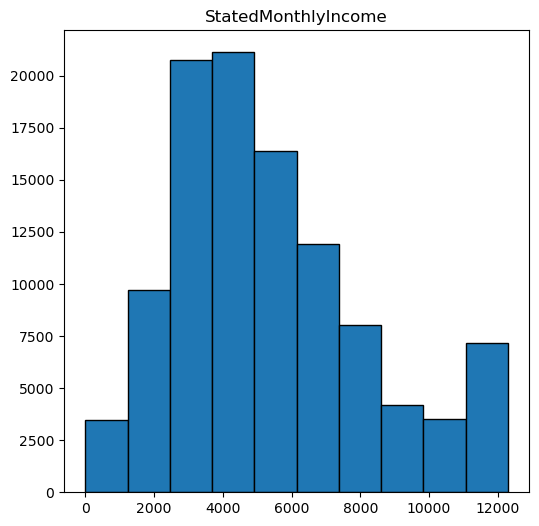

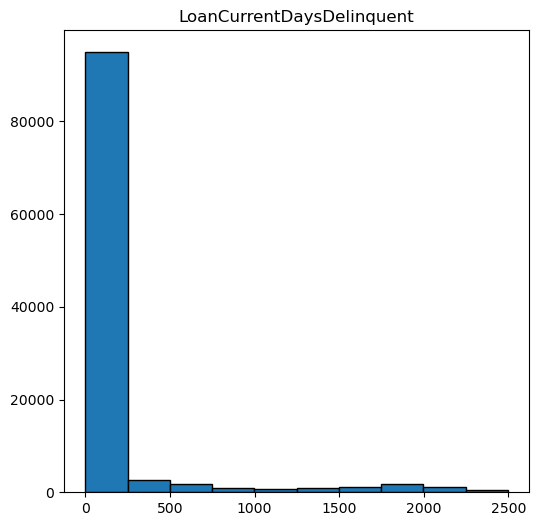

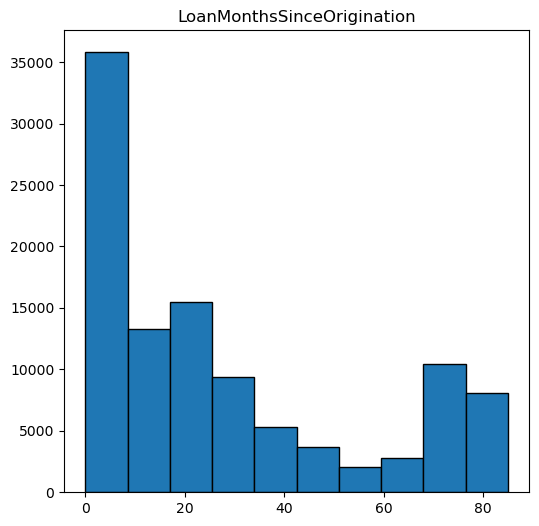

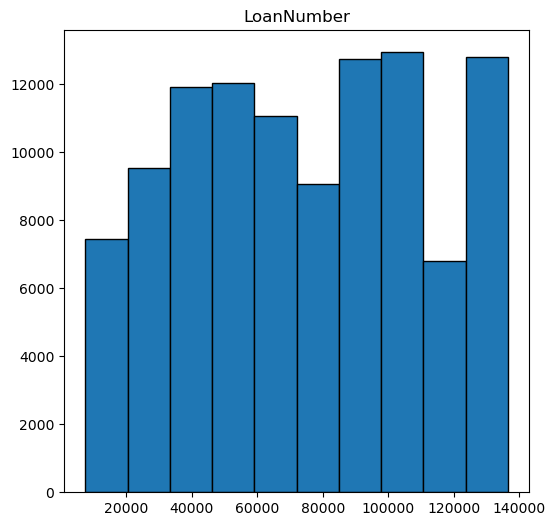

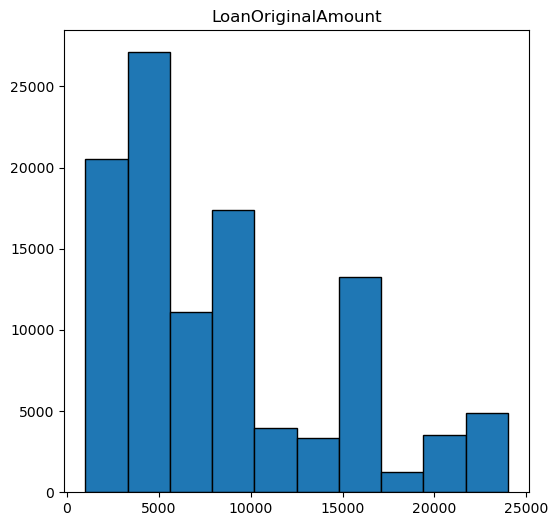

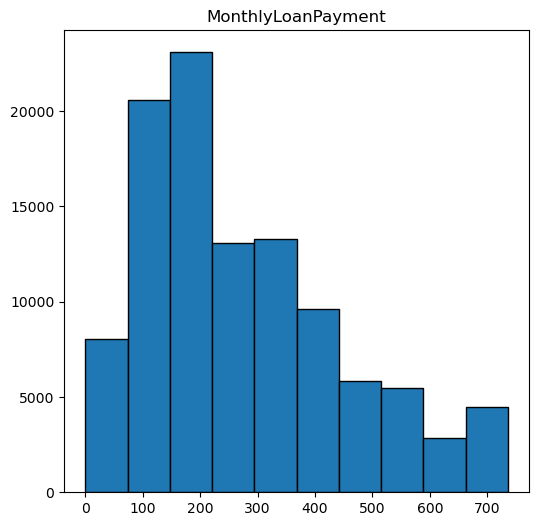

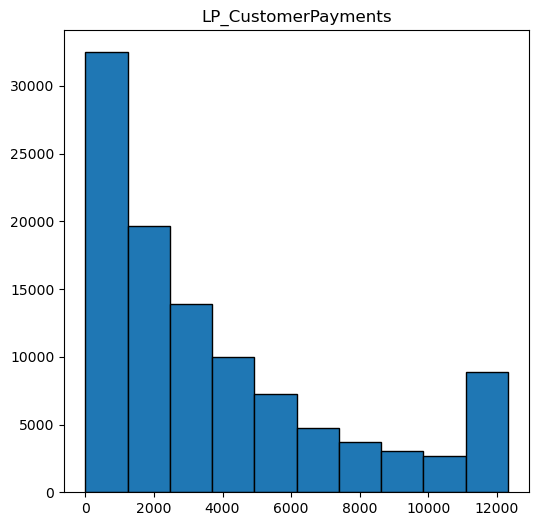

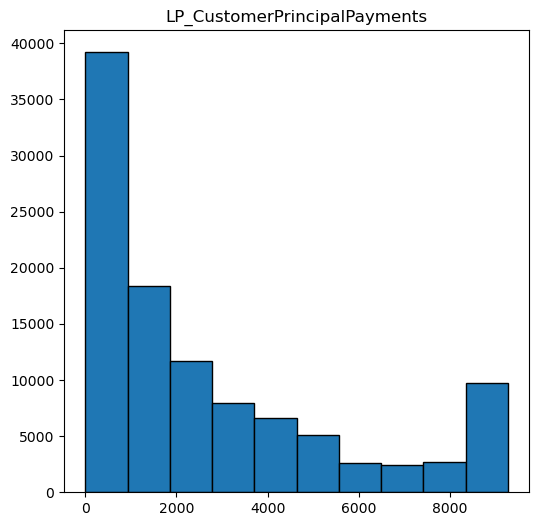

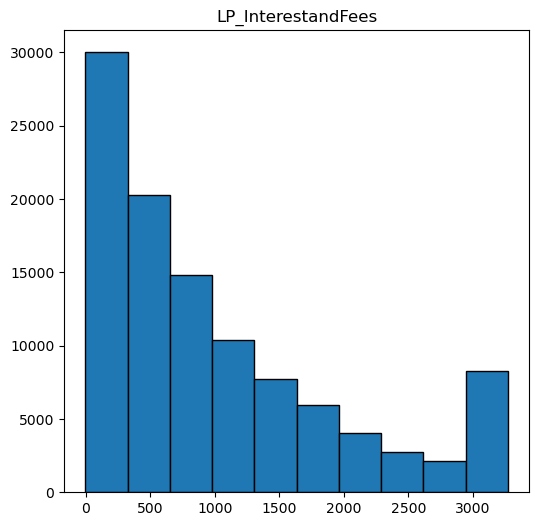

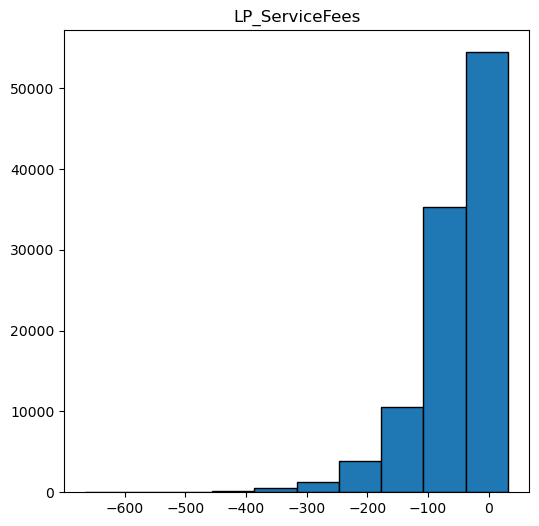

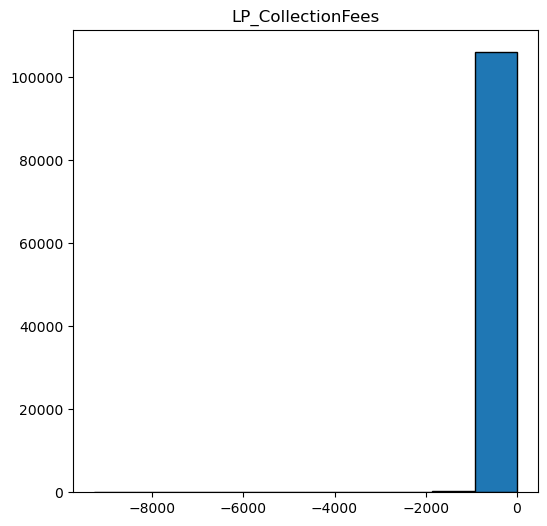

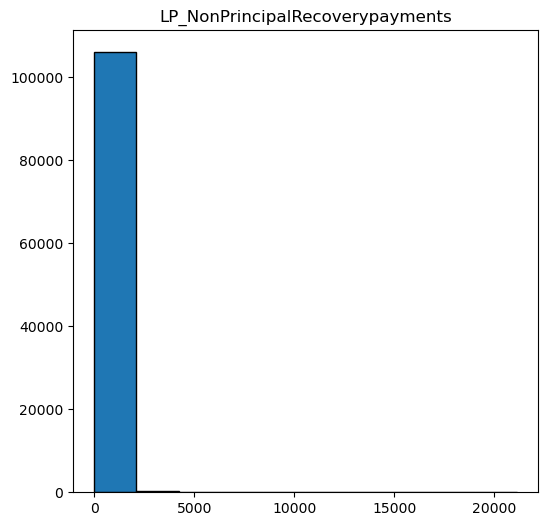

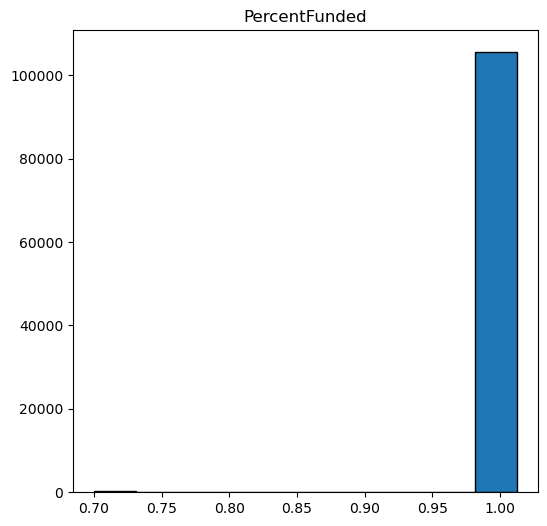

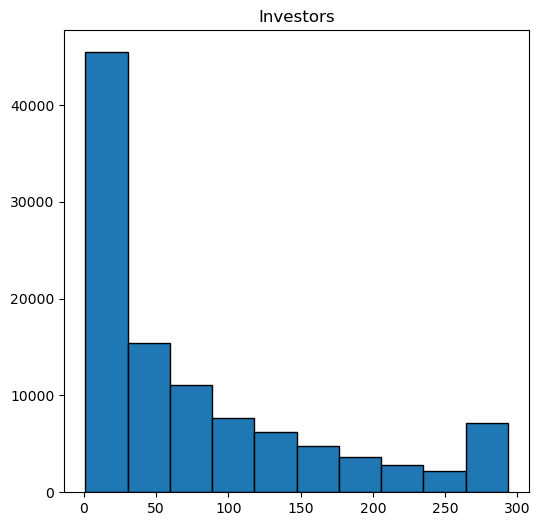

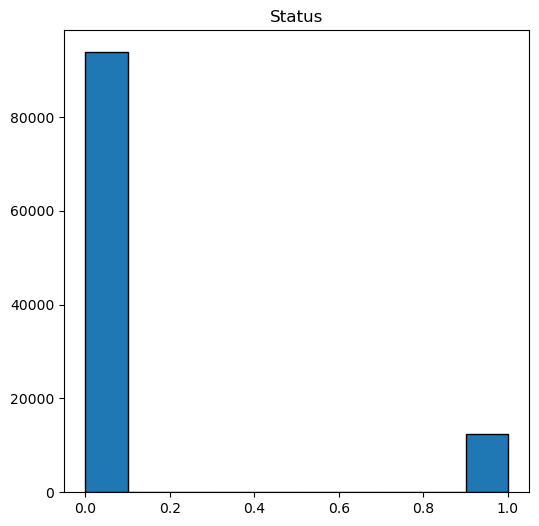

In [49]:
for col in numcols:
    plt.figure(figsize = (6,6))
    plt.hist(dfclassif[col], edgecolor = 'black')
    plt.title(col)
    plt.show()

#### Kernel Density plot for Numerical features

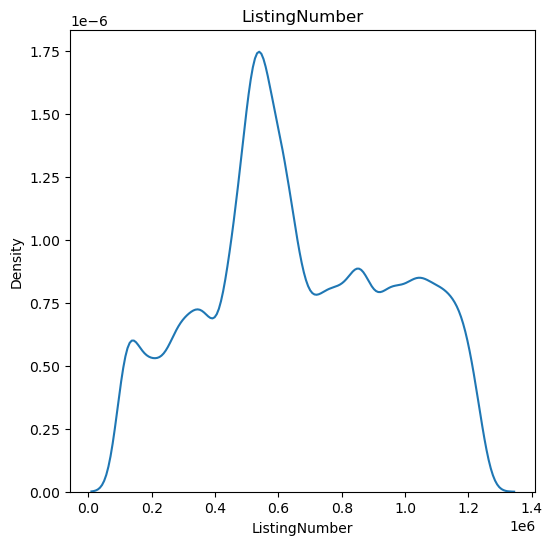

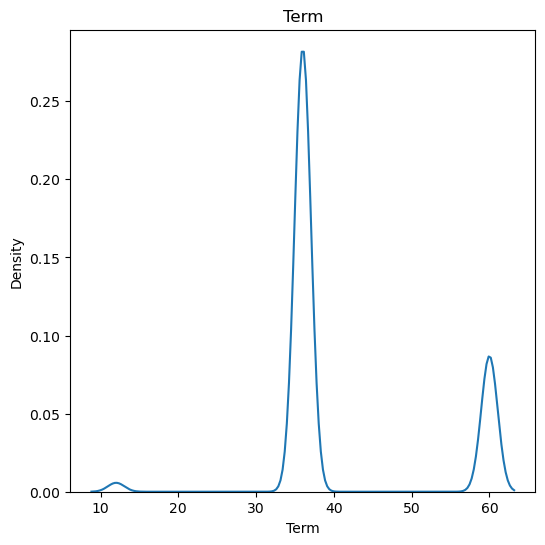

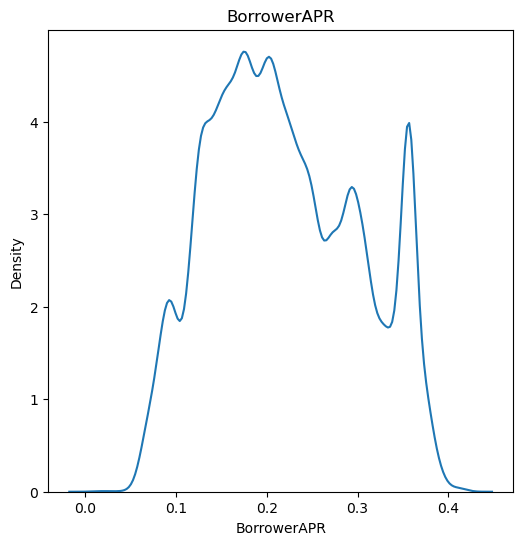

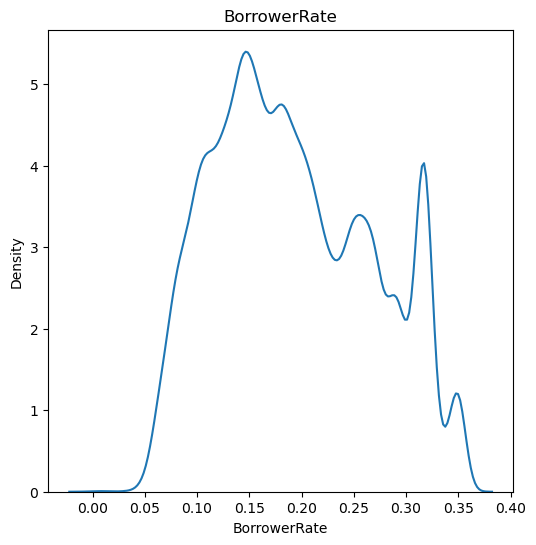

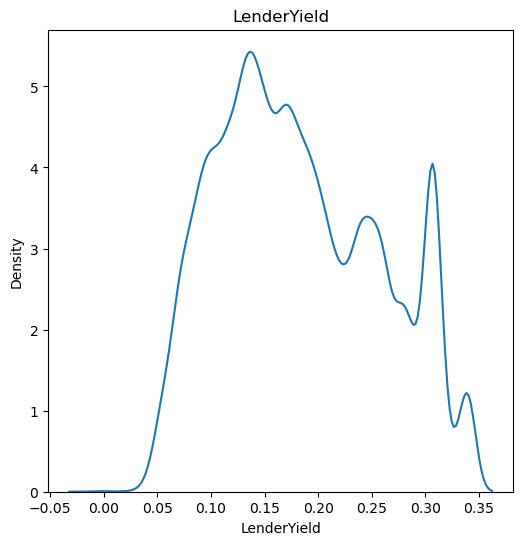

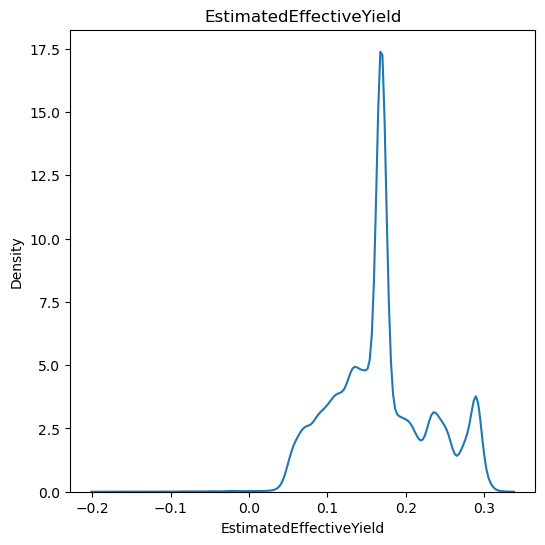

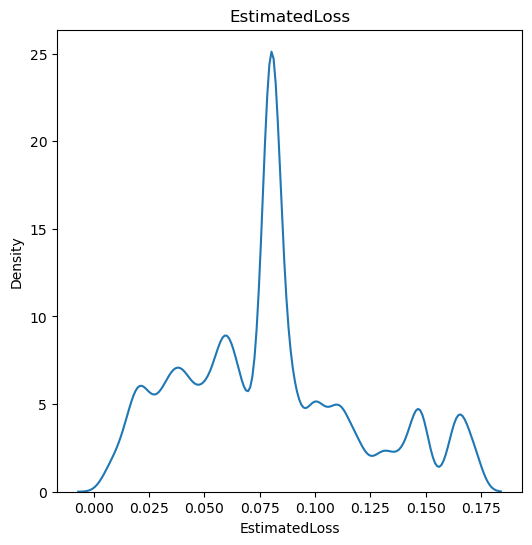

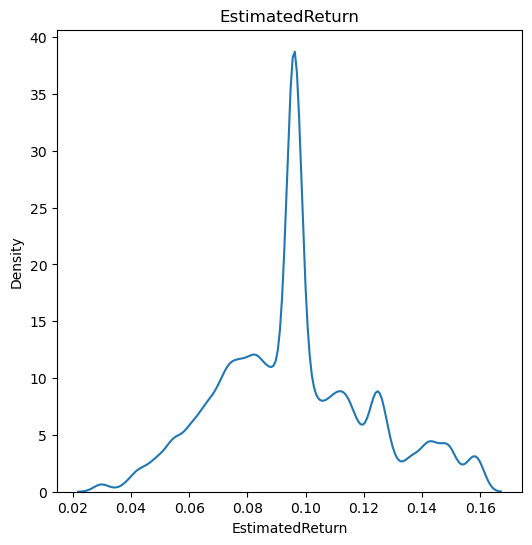

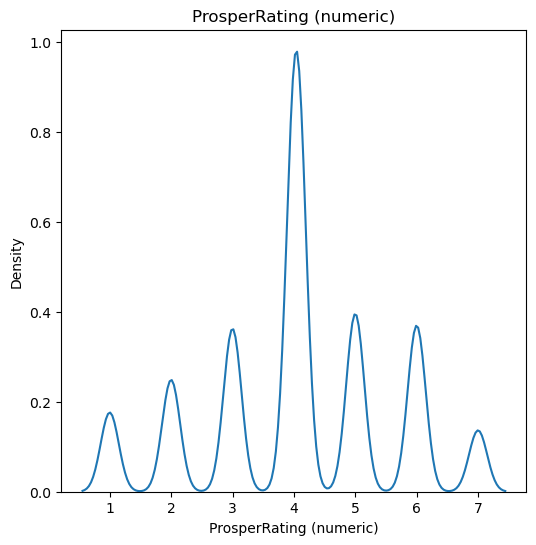

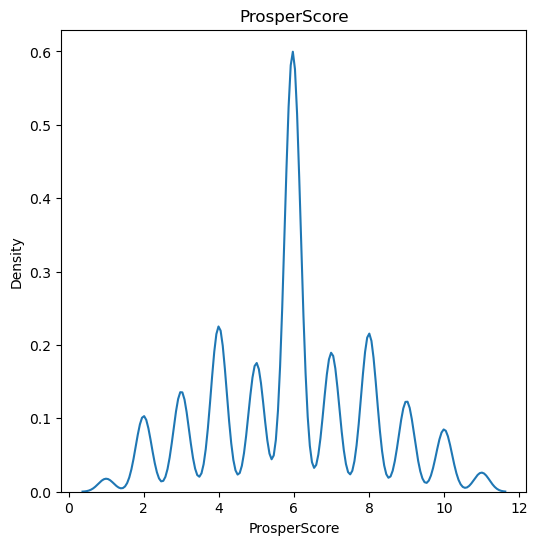

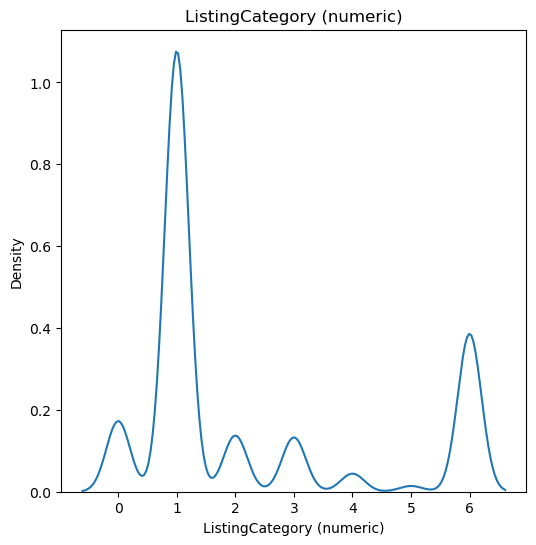

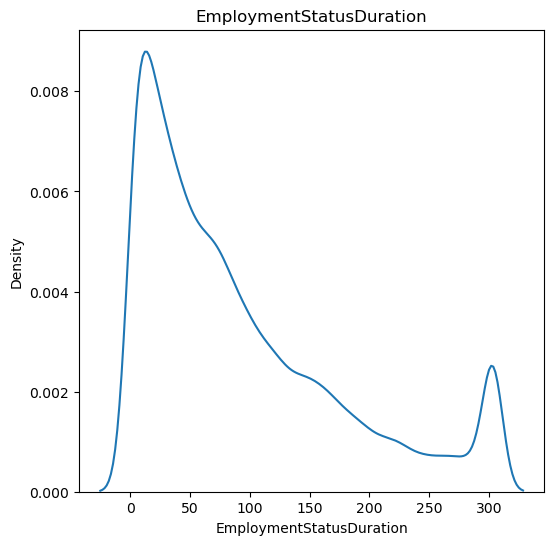

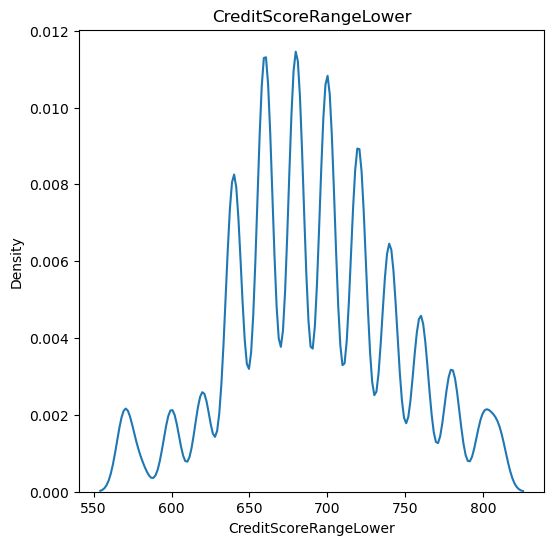

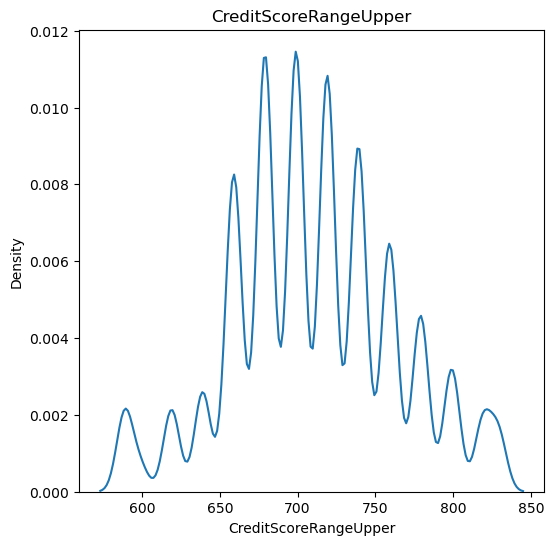

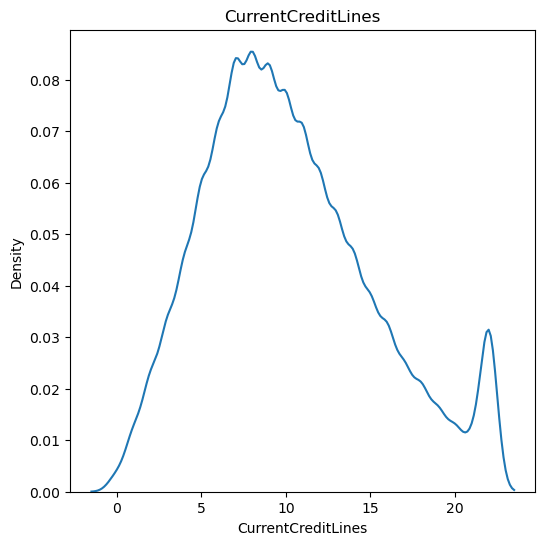

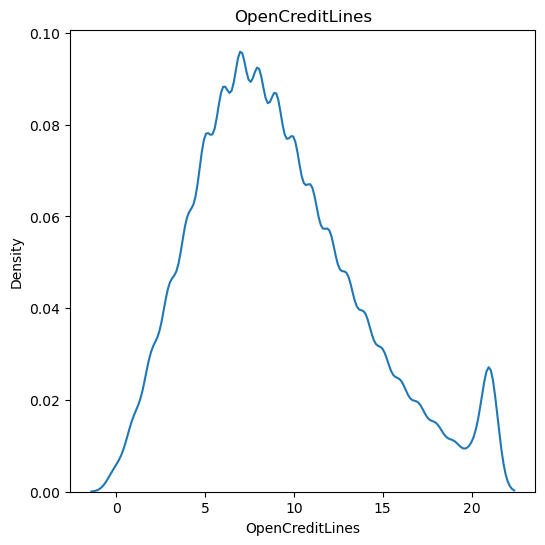

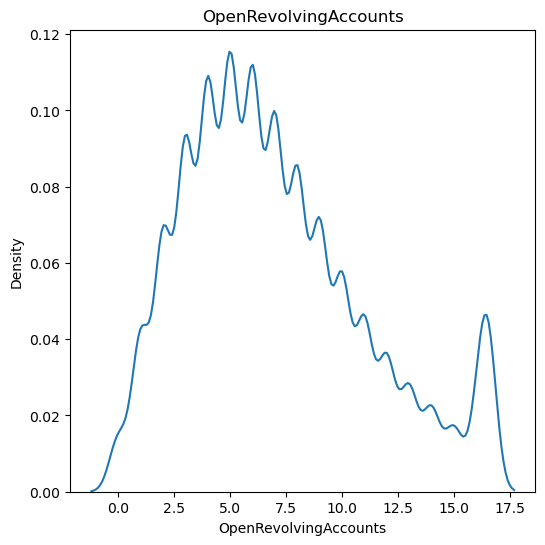

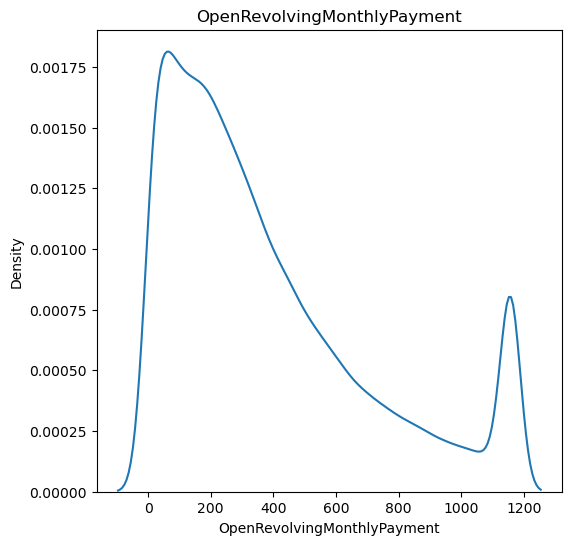

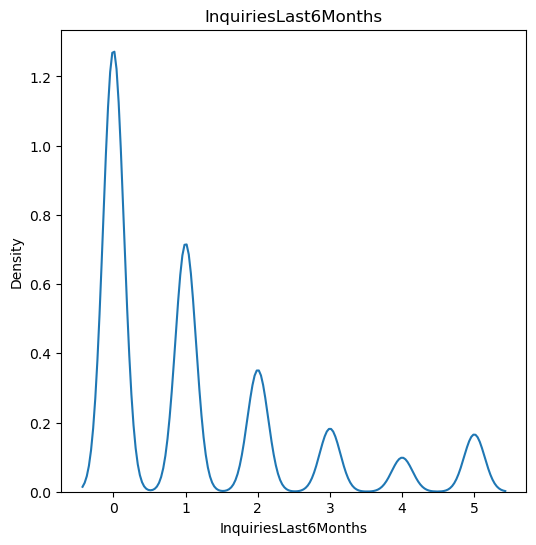

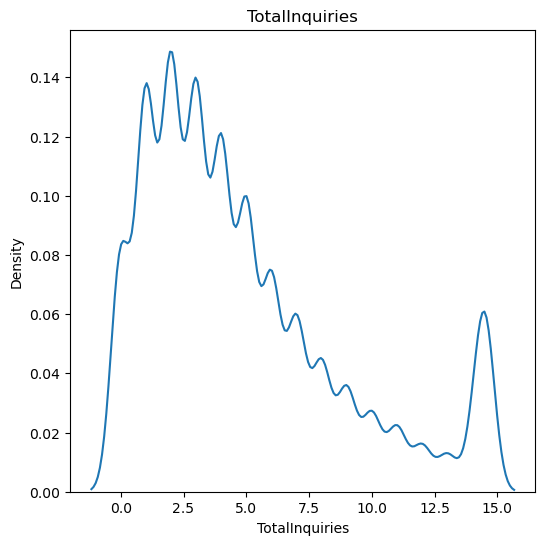

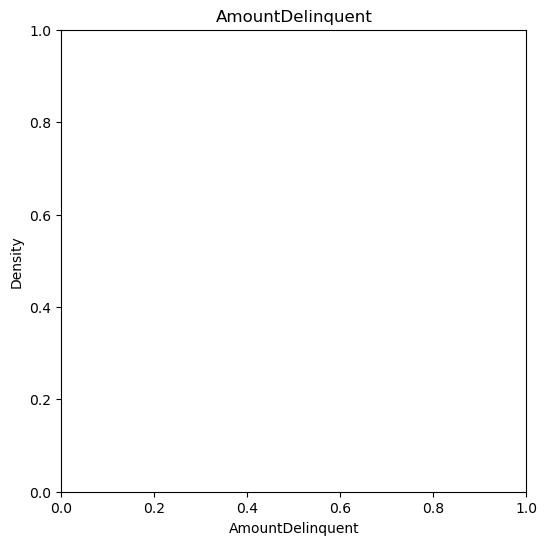

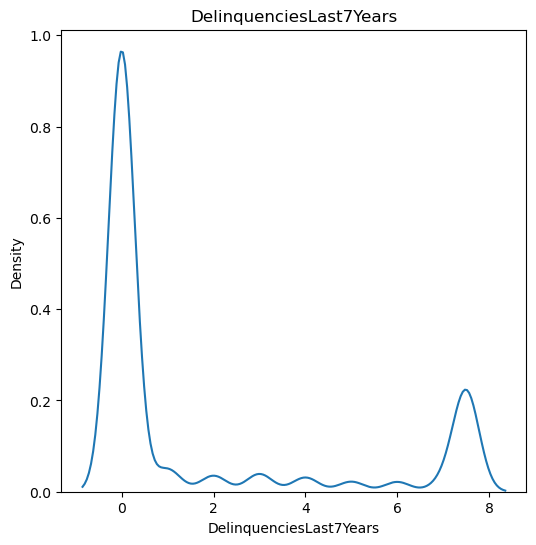

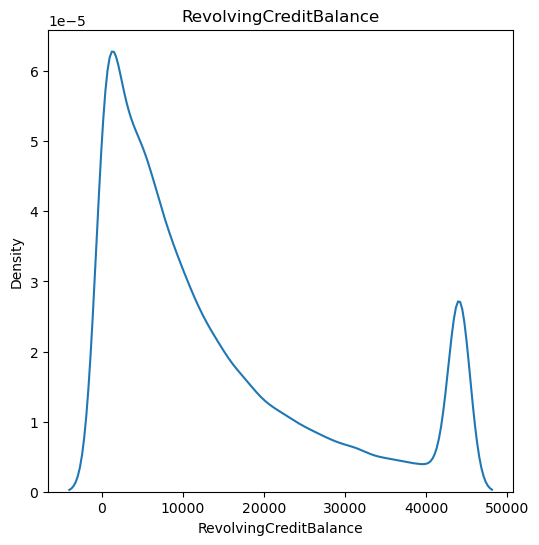

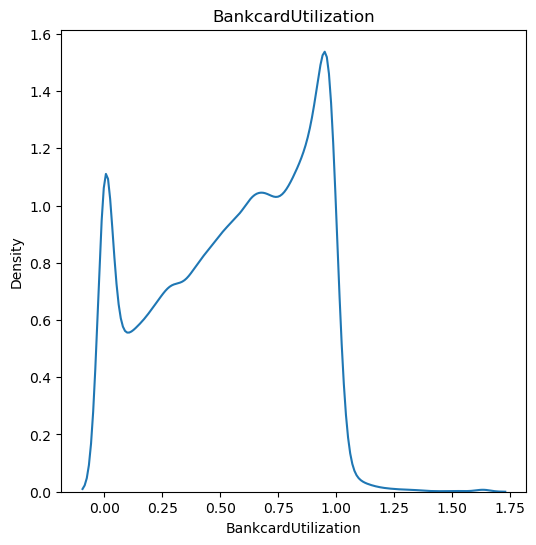

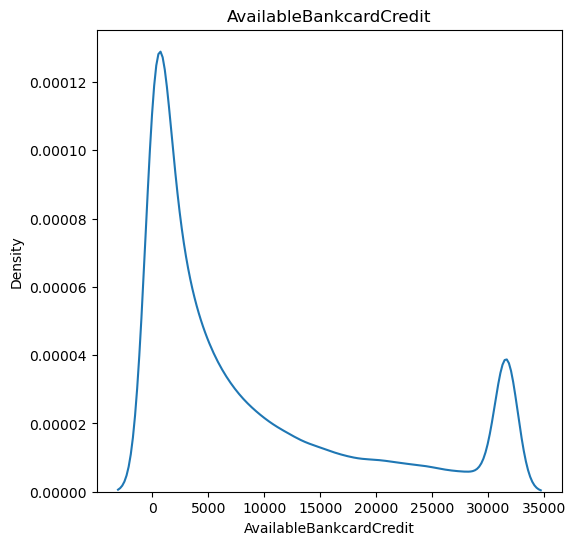

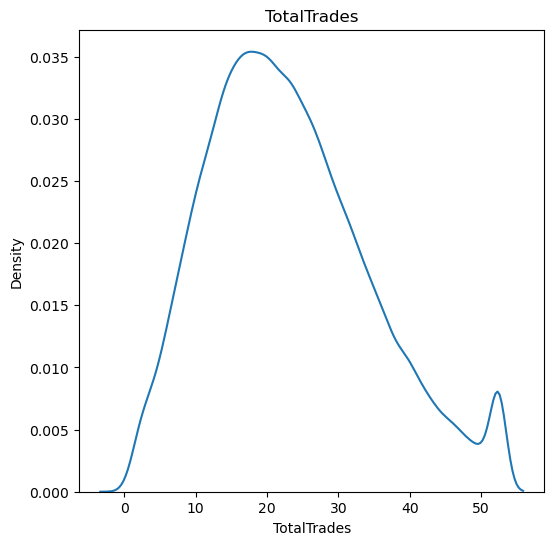

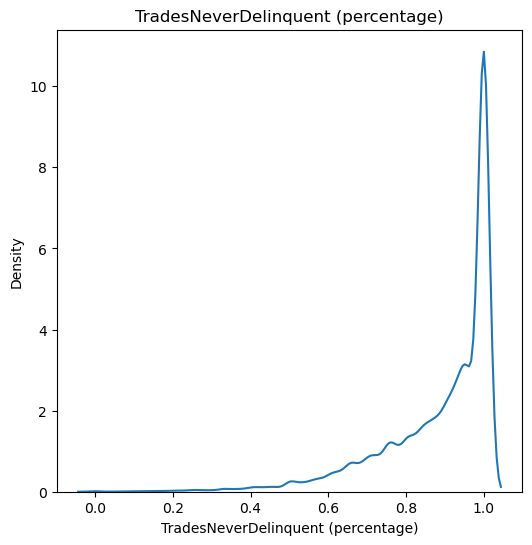

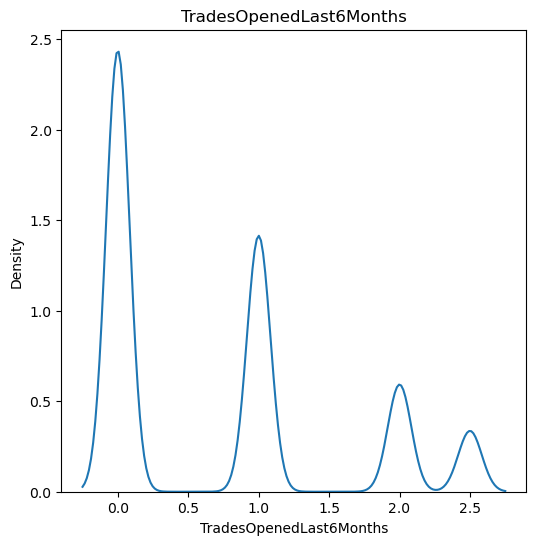

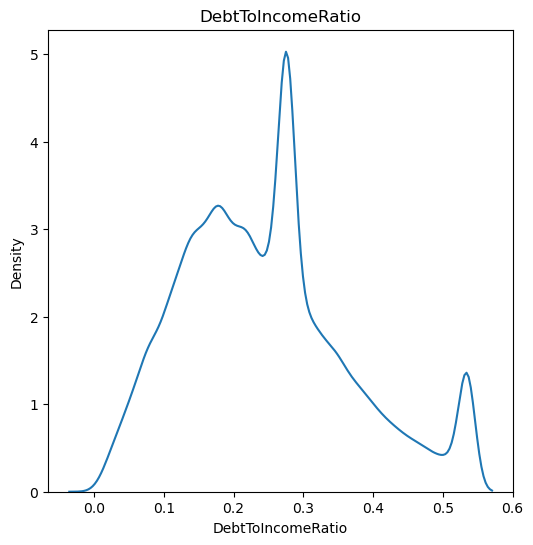

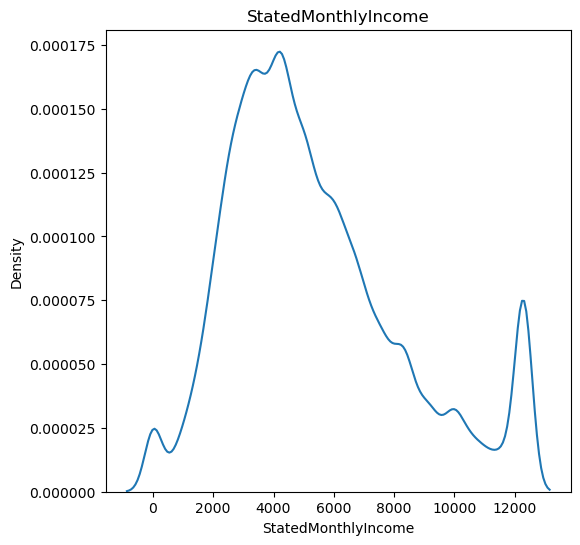

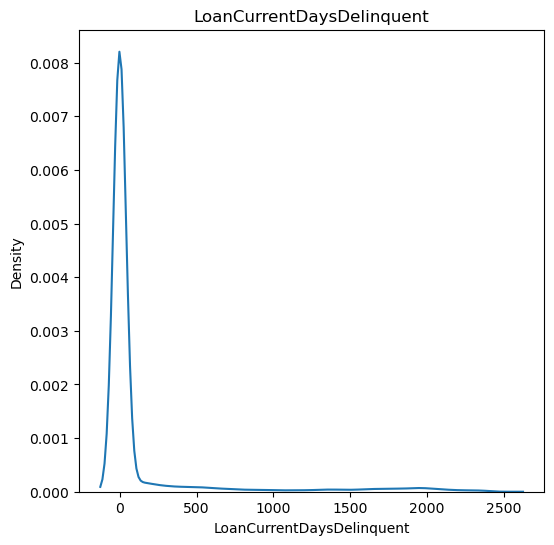

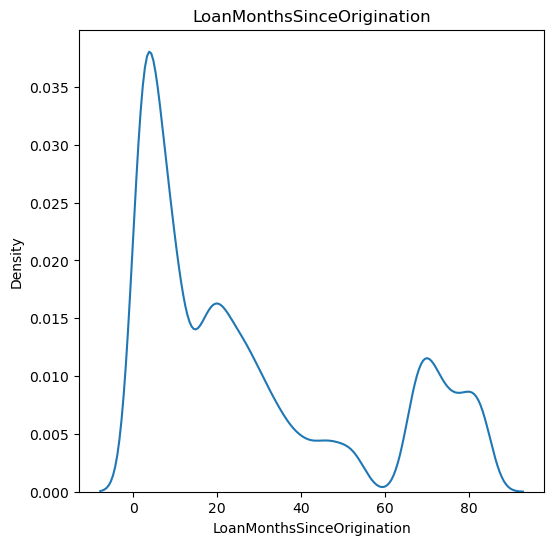

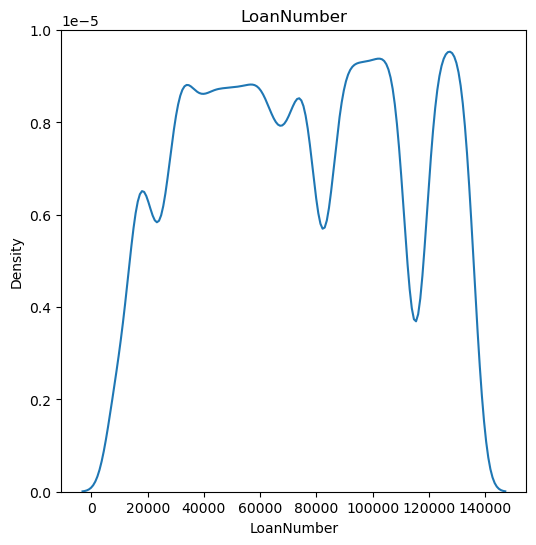

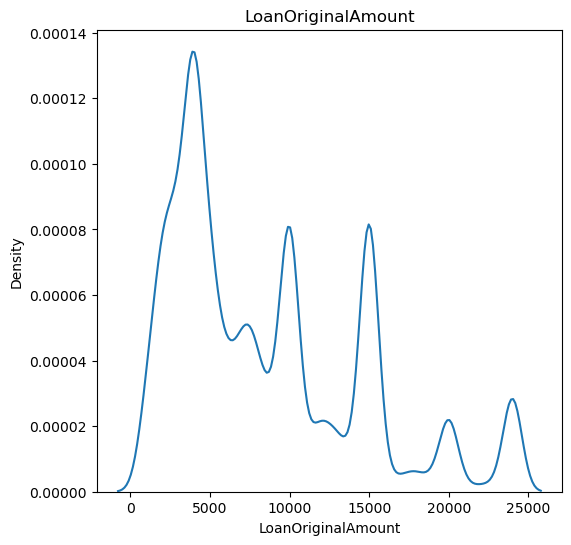

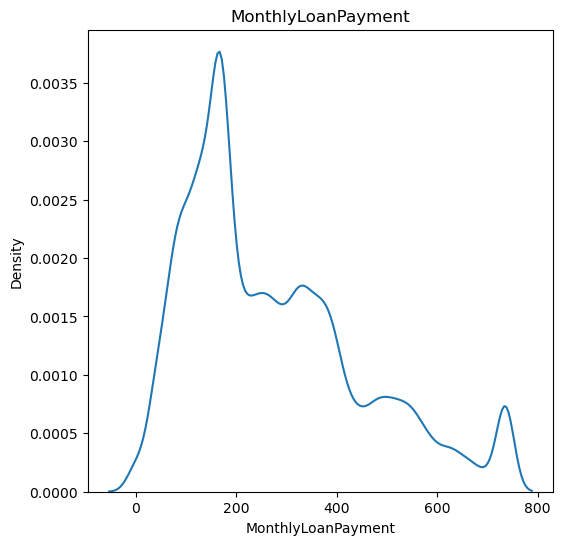

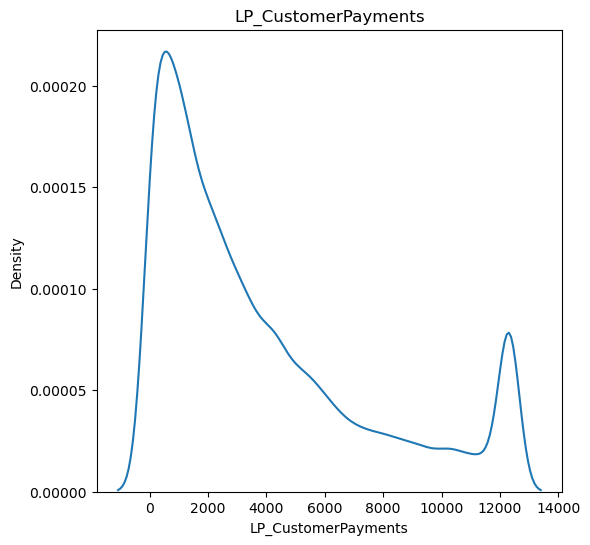

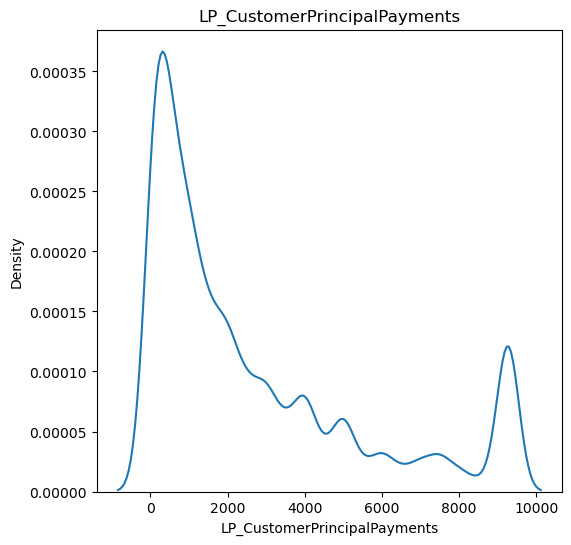

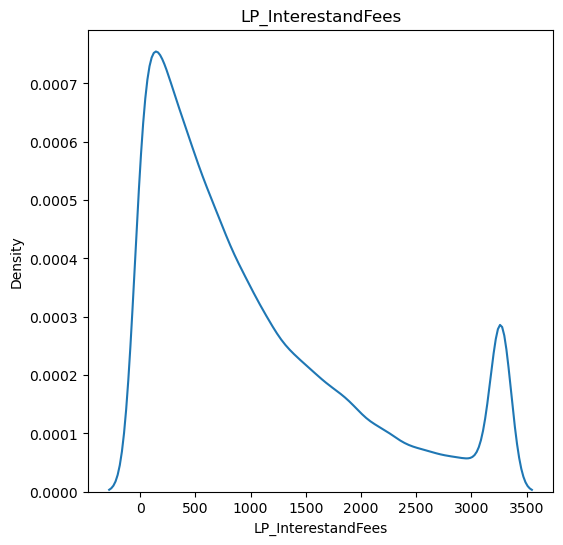

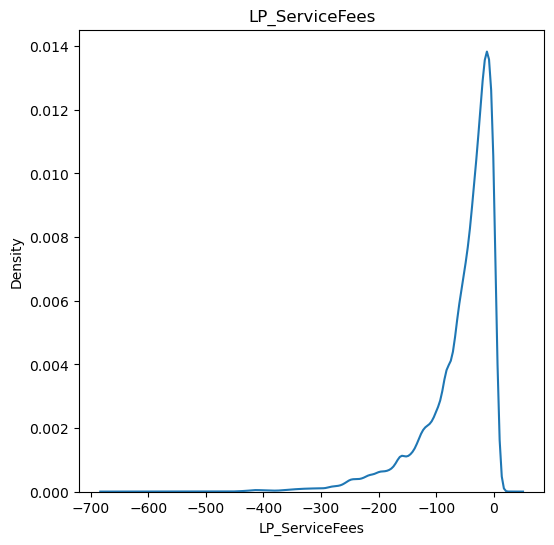

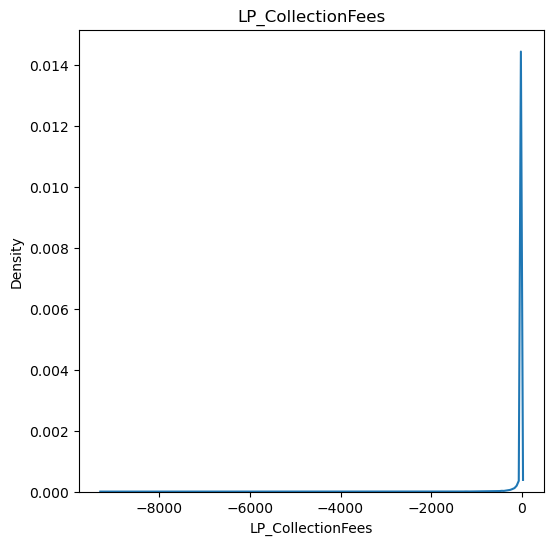

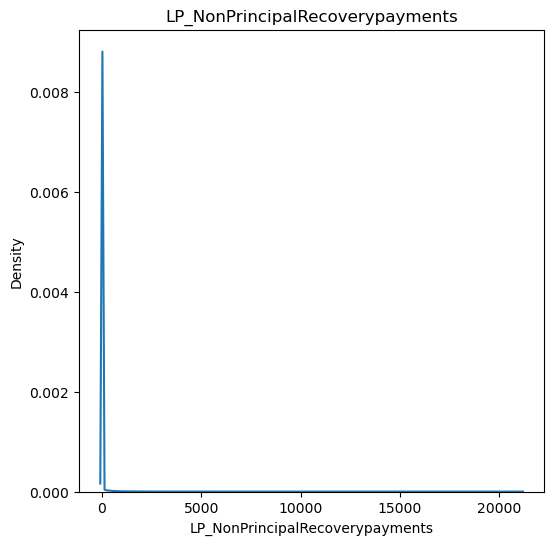

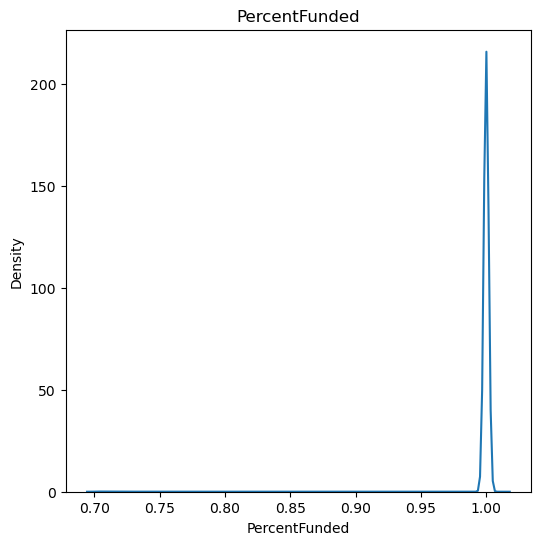

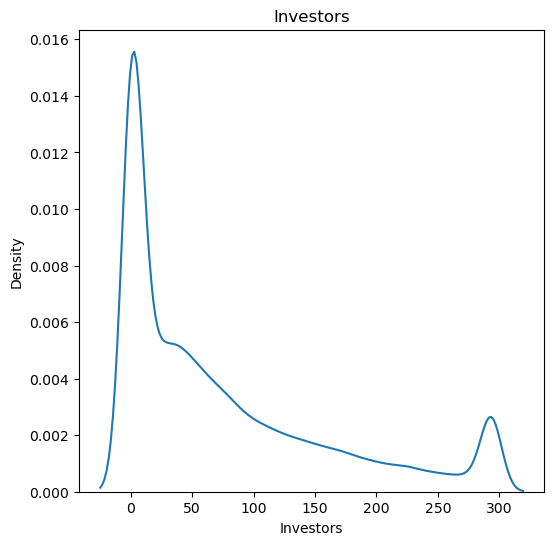

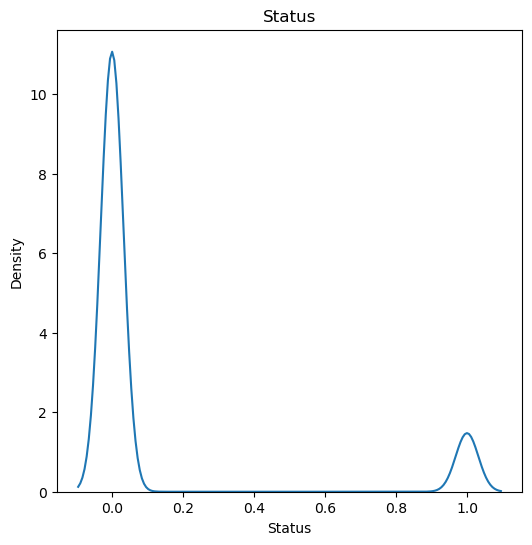

In [50]:
for col in numcols:
    plt.figure(figsize = (6,6))
    sns.kdeplot(dfclassif[col])
    plt.title(col)
    plt.show()

#### Pie Chart for Categorical features

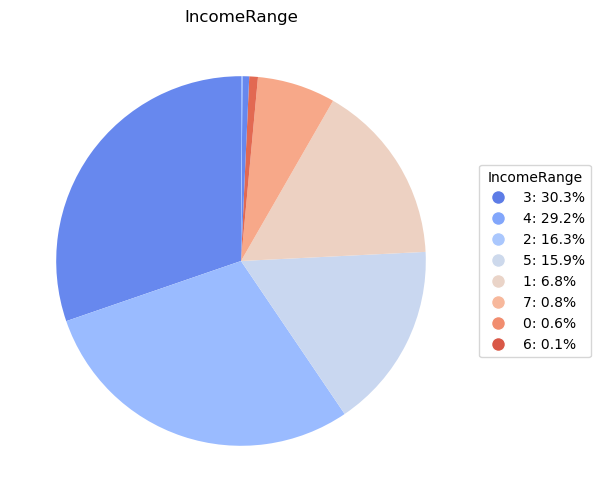

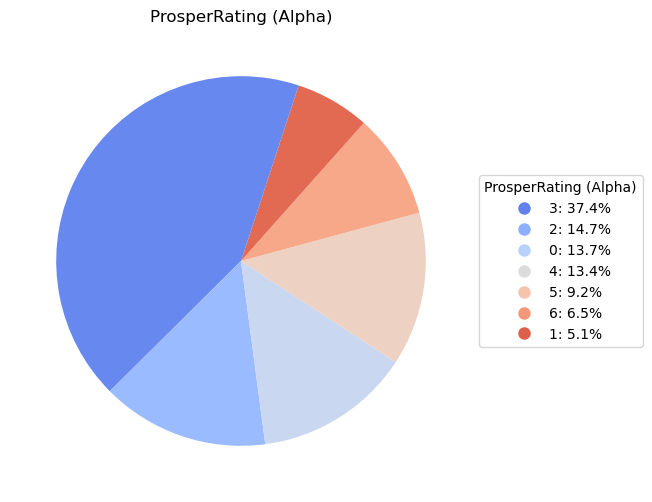

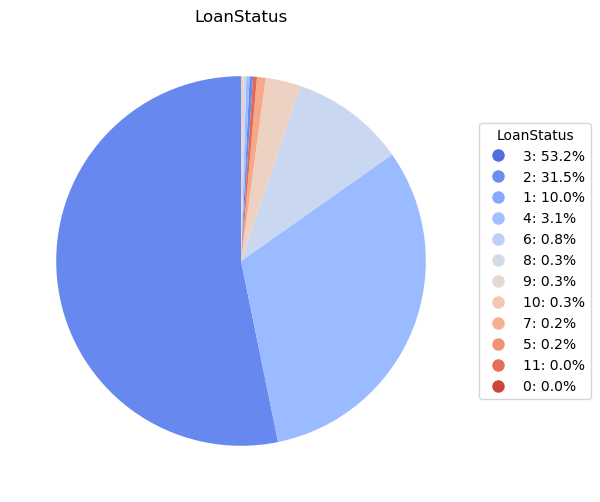

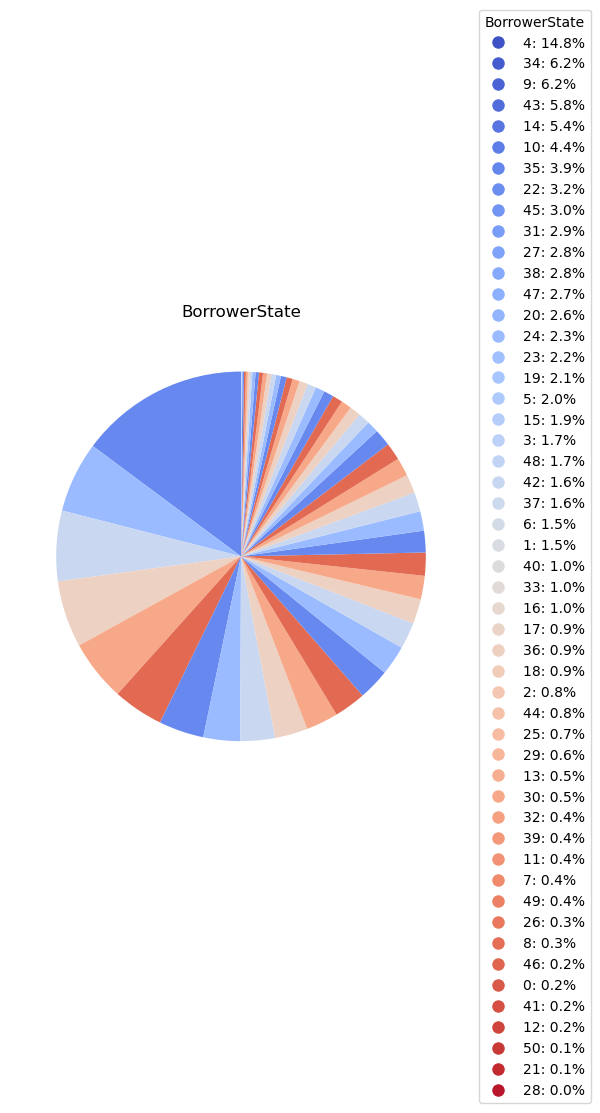

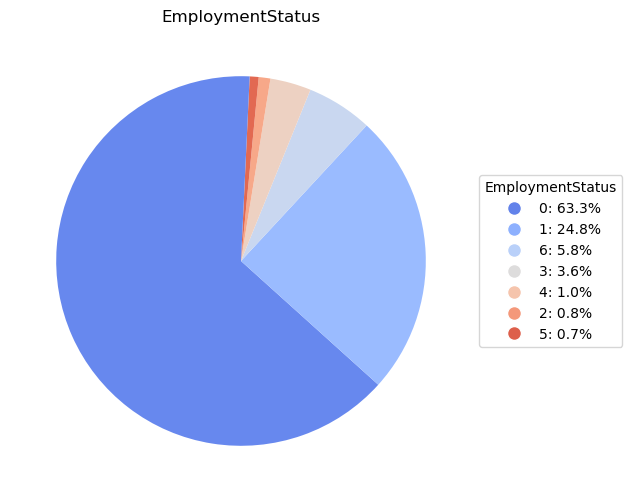

In [51]:
catcols1 = ['IncomeRange', 'ProsperRating (Alpha)','LoanStatus','BorrowerState','EmploymentStatus']
for col in catcols1:
    plt.figure(figsize = (6,6))
    pie = dfclassif[col].value_counts()
    wedges, texts = plt.pie(pie, startangle = 90, colors = sns.color_palette('coolwarm'))
    plt.title(col)
    plt.ylabel('')
    total = pie.sum()
    labels = [f'{label}: {count/total:.1%}' for label, count in zip(pie.index, pie)]
    handles = [plt.Line2D([0], [0], marker = 'o', color = 'w', markerfacecolor = color, markersize = 10) for color in sns.color_palette('coolwarm', len(labels))]
    plt.legend(handles, labels, loc = 'center left', bbox_to_anchor= (1,0.5), fontsize = 10, title = col)
    plt.show()

### 2. Bivariate Data Analysis

#### Pairplots for Numerical features

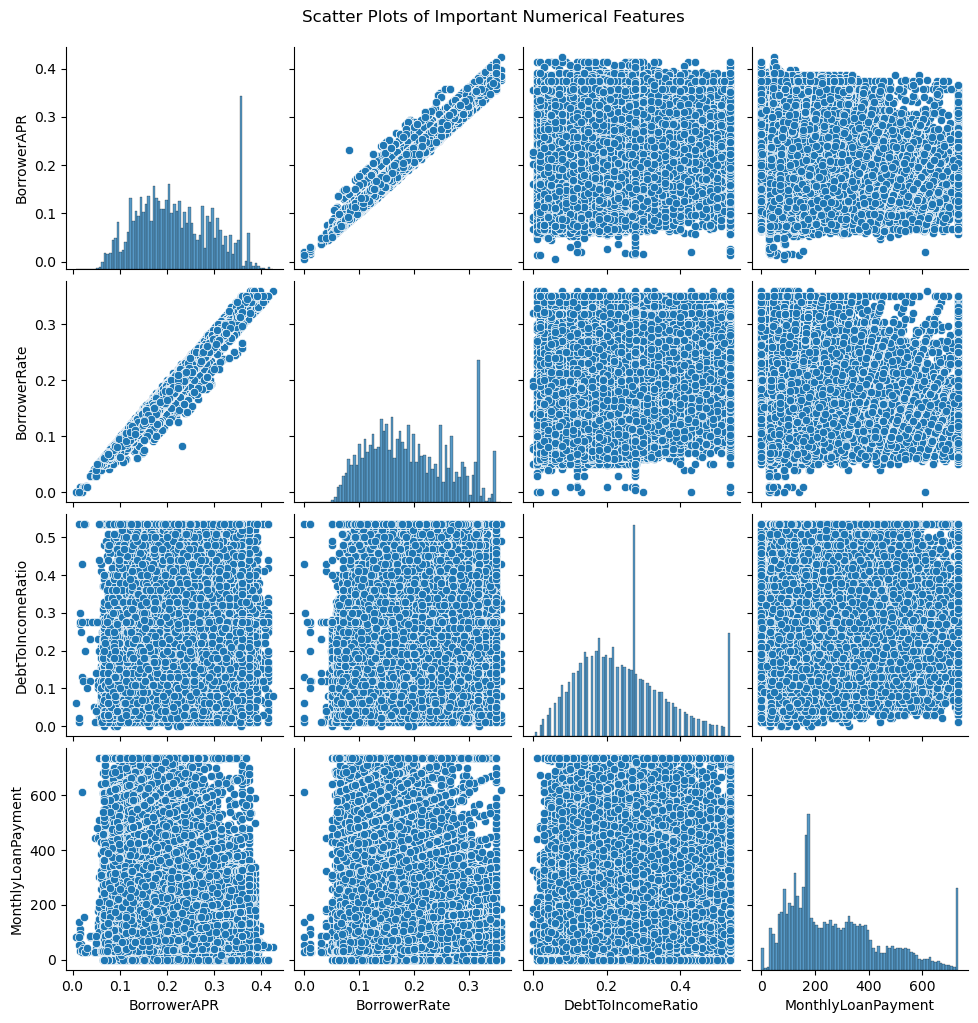

In [52]:
numcols1 = ['BorrowerAPR', 'BorrowerRate', 'DebtToIncomeRatio', 'MonthlyLoanPayment']
sns.pairplot(dfclassif[numcols1])
plt.suptitle("Scatter Plots of Important Numerical Features", y=1.02)
plt.show()

#### Correlation coefficients 

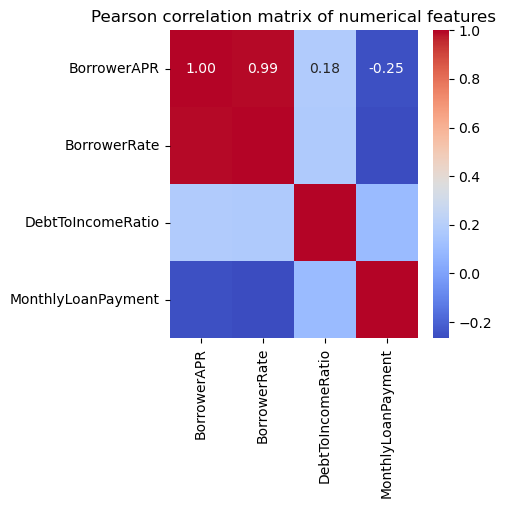

In [53]:
corr = dfclassif[numcols1].corr(method = 'pearson')
plt.figure(figsize = (4,4))
sns.heatmap(corr, annot = True, cmap = 'coolwarm', fmt = ".2f")
plt.title("Pearson correlation matrix of numerical features")
plt.show()

#### Numerical-Categorical Relationship using Boxplots

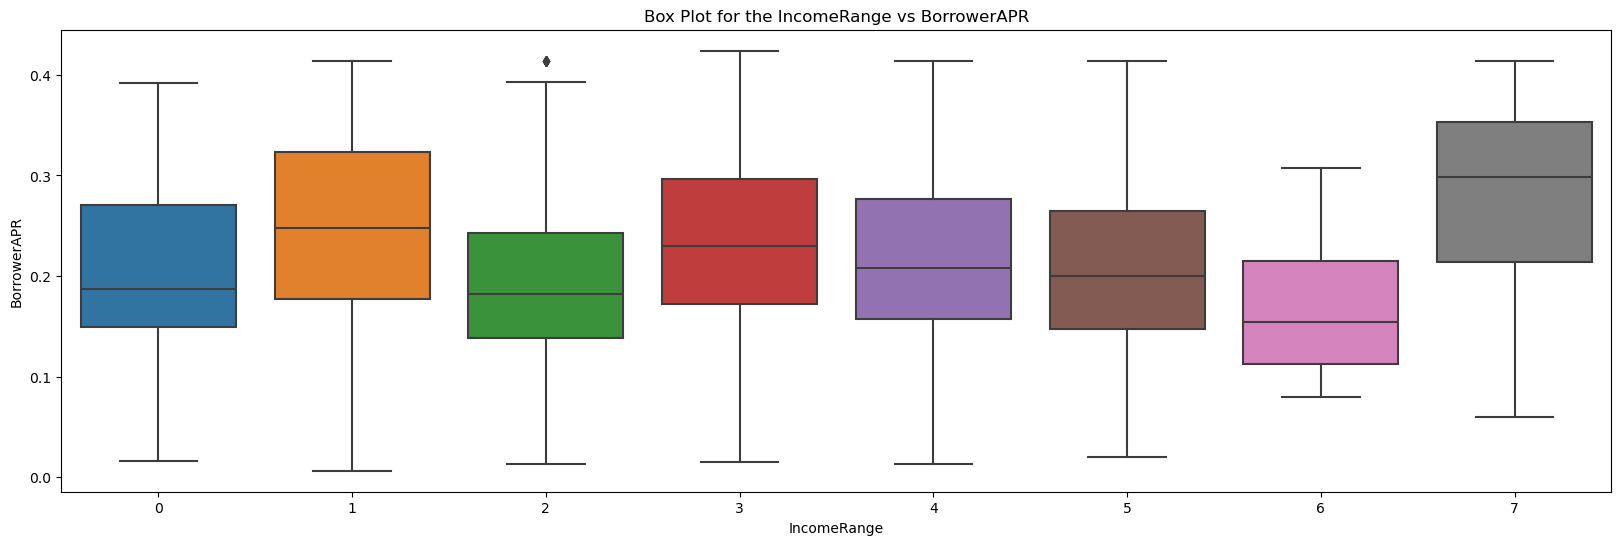

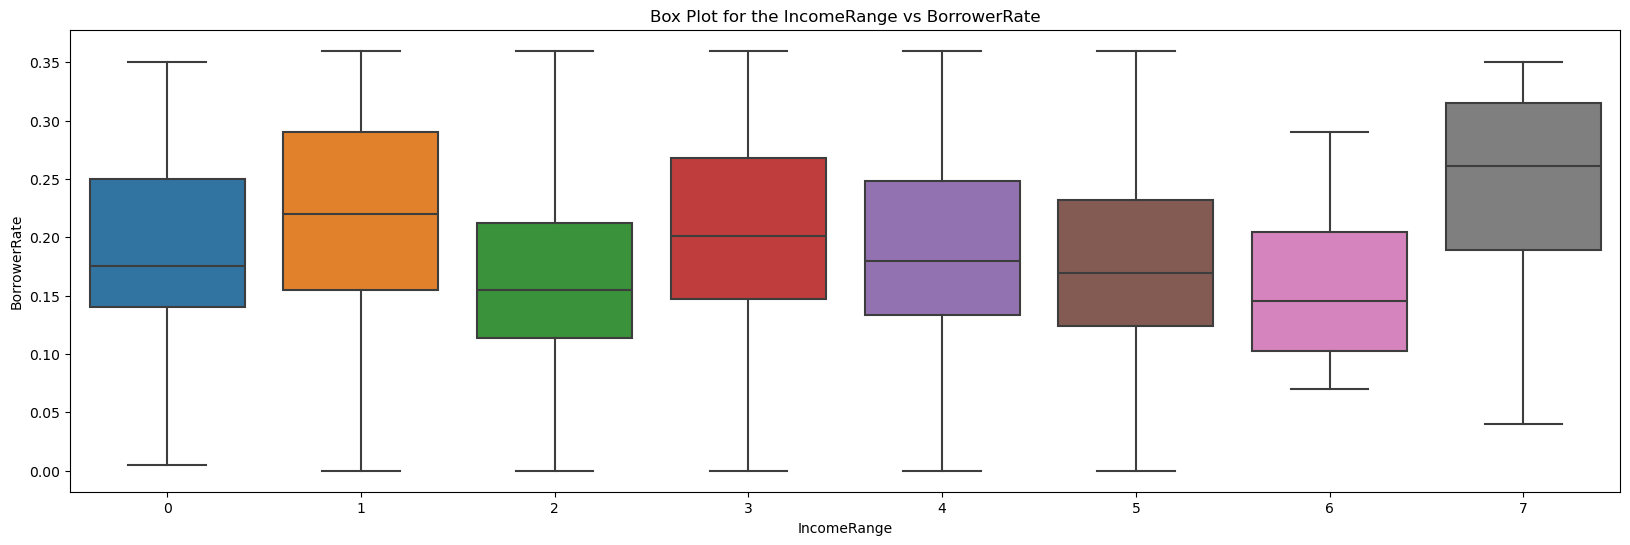

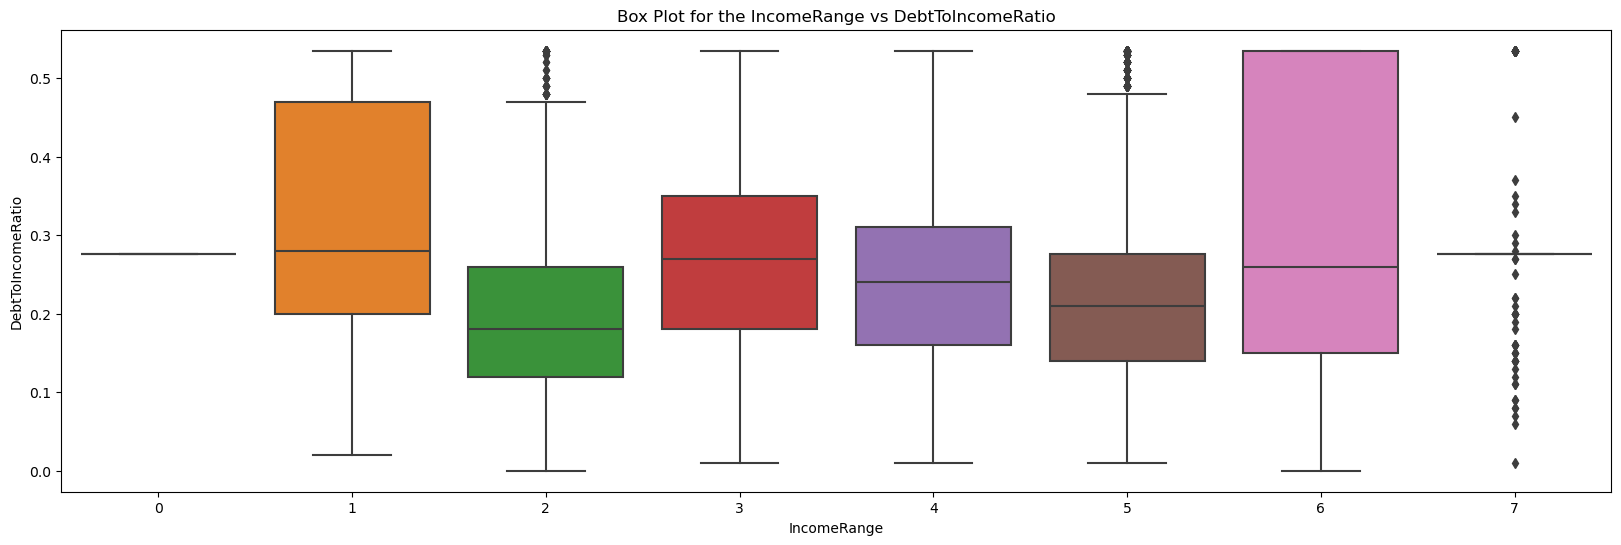

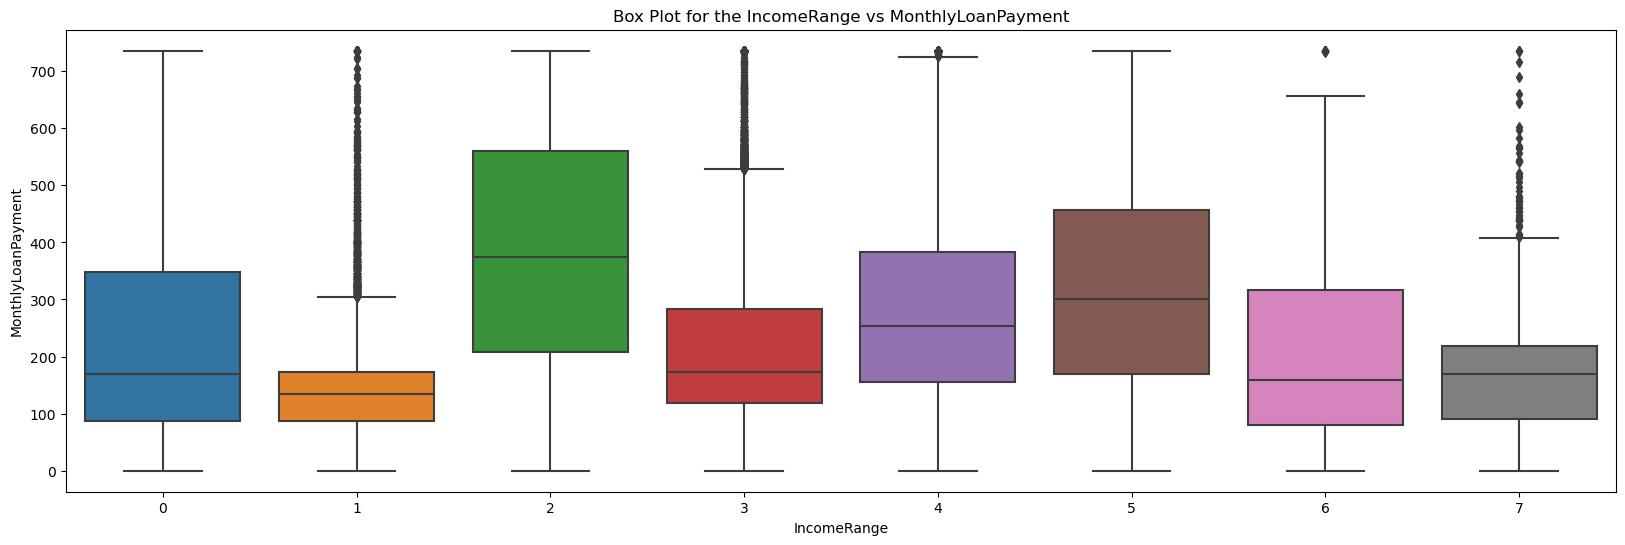

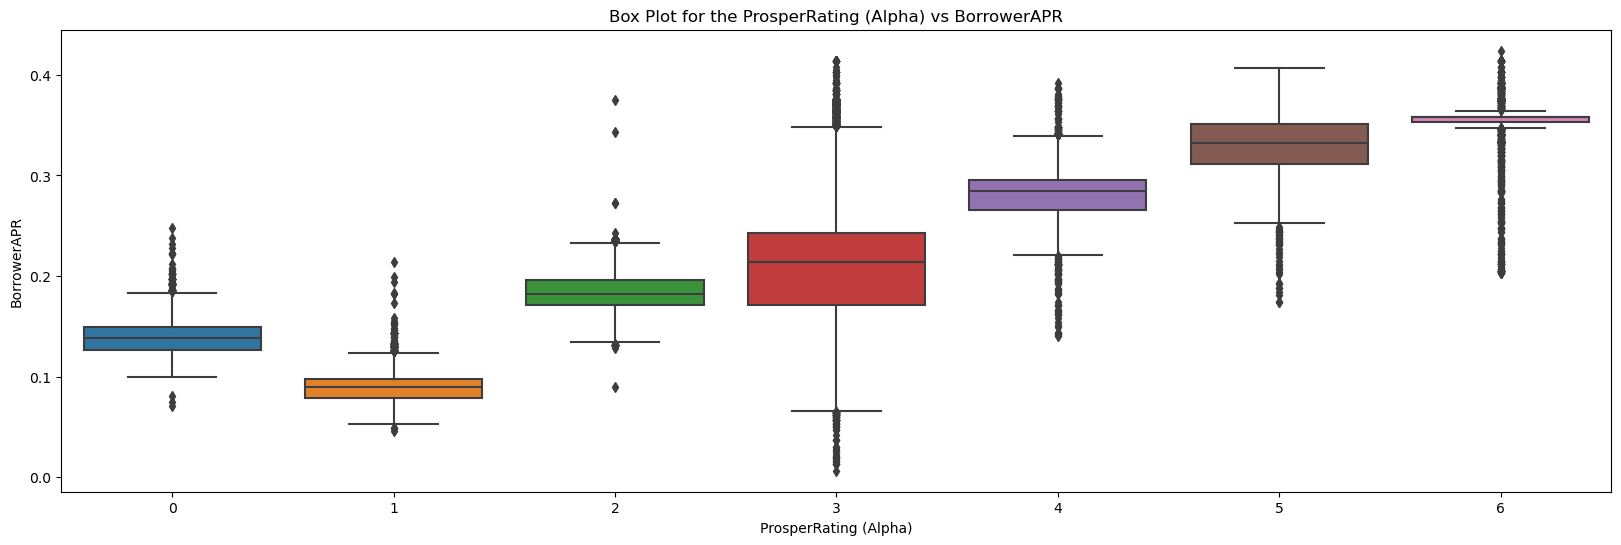

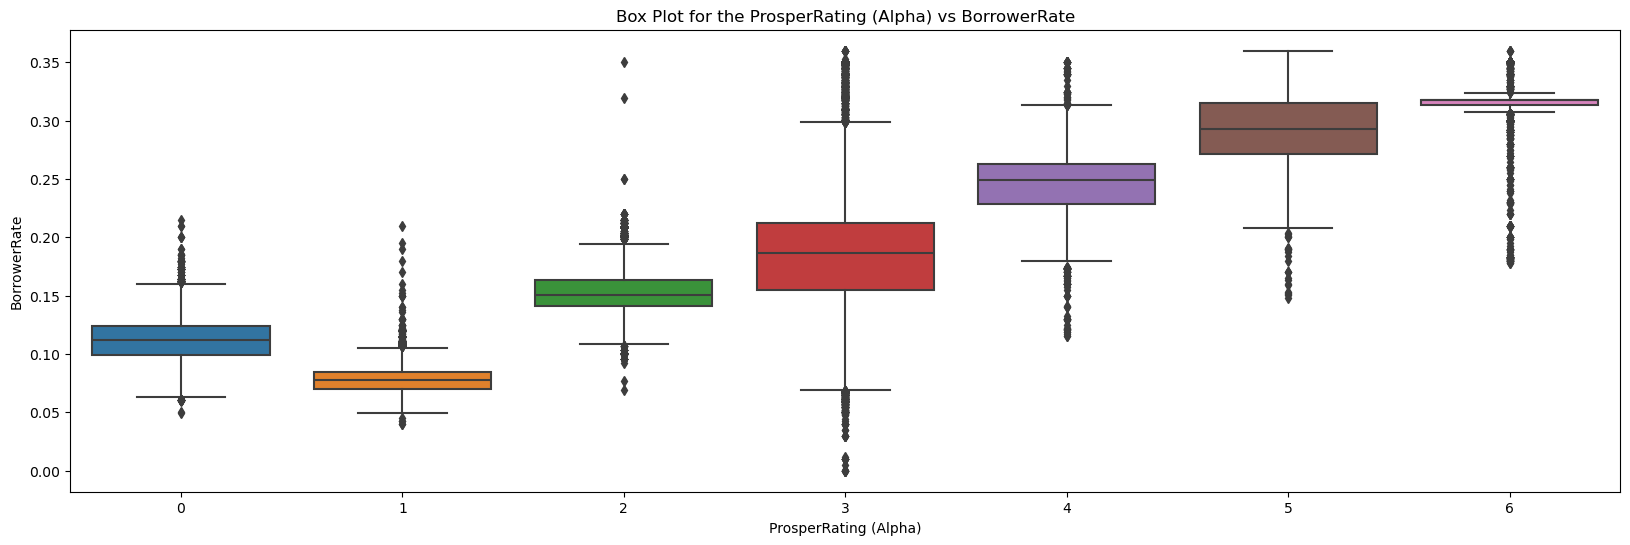

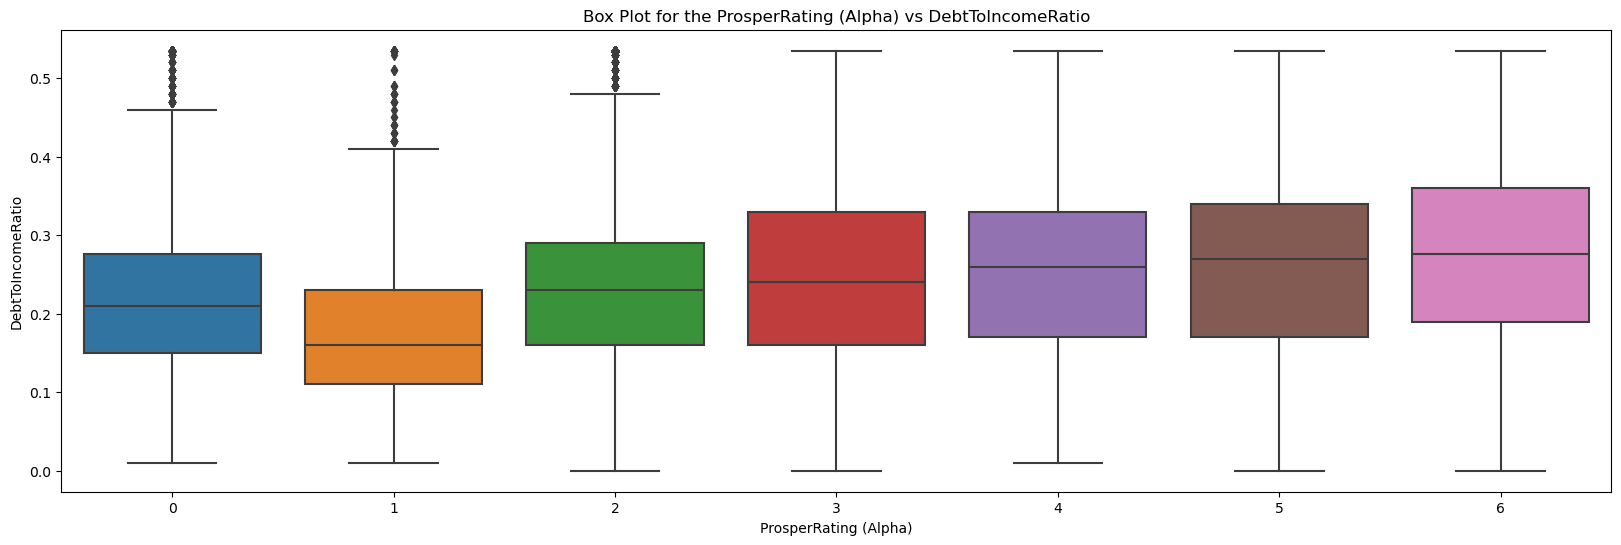

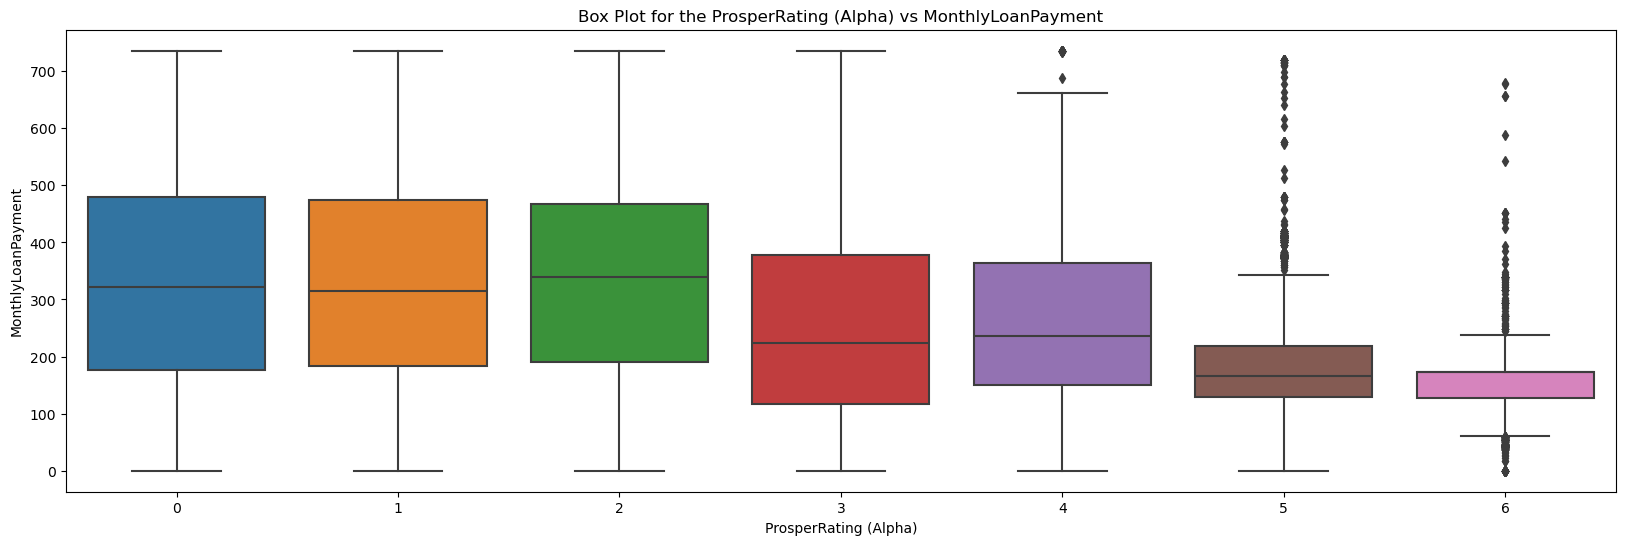

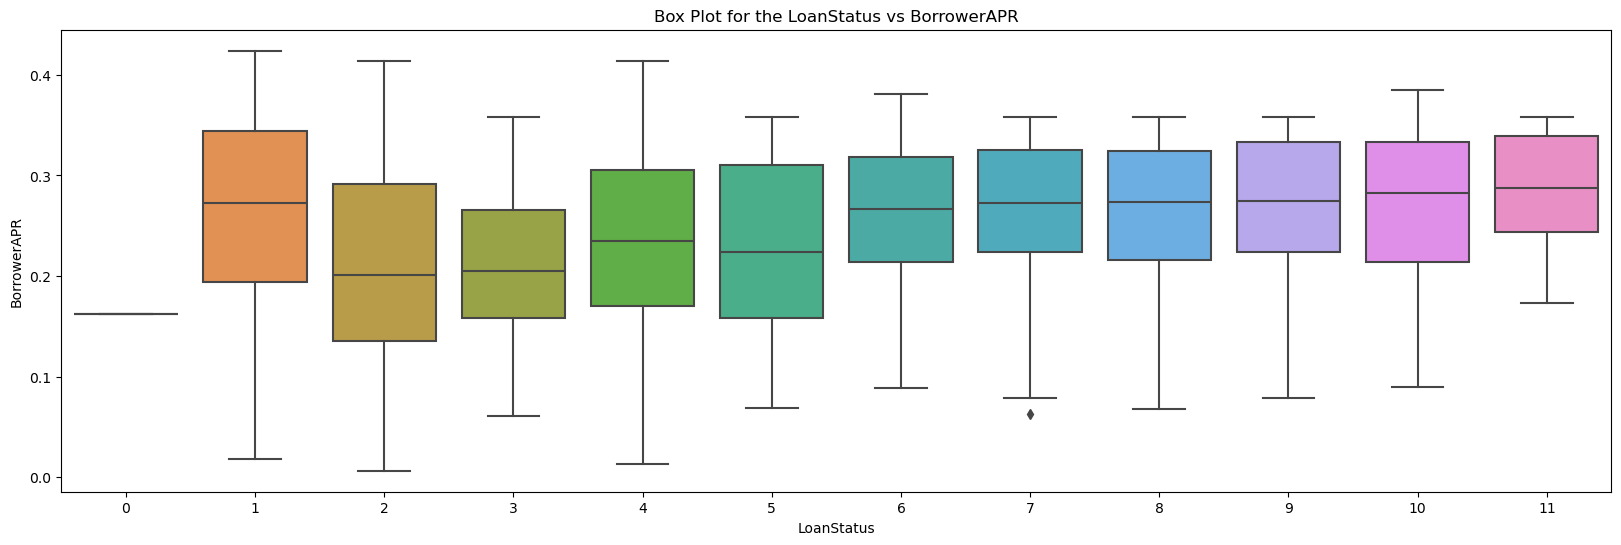

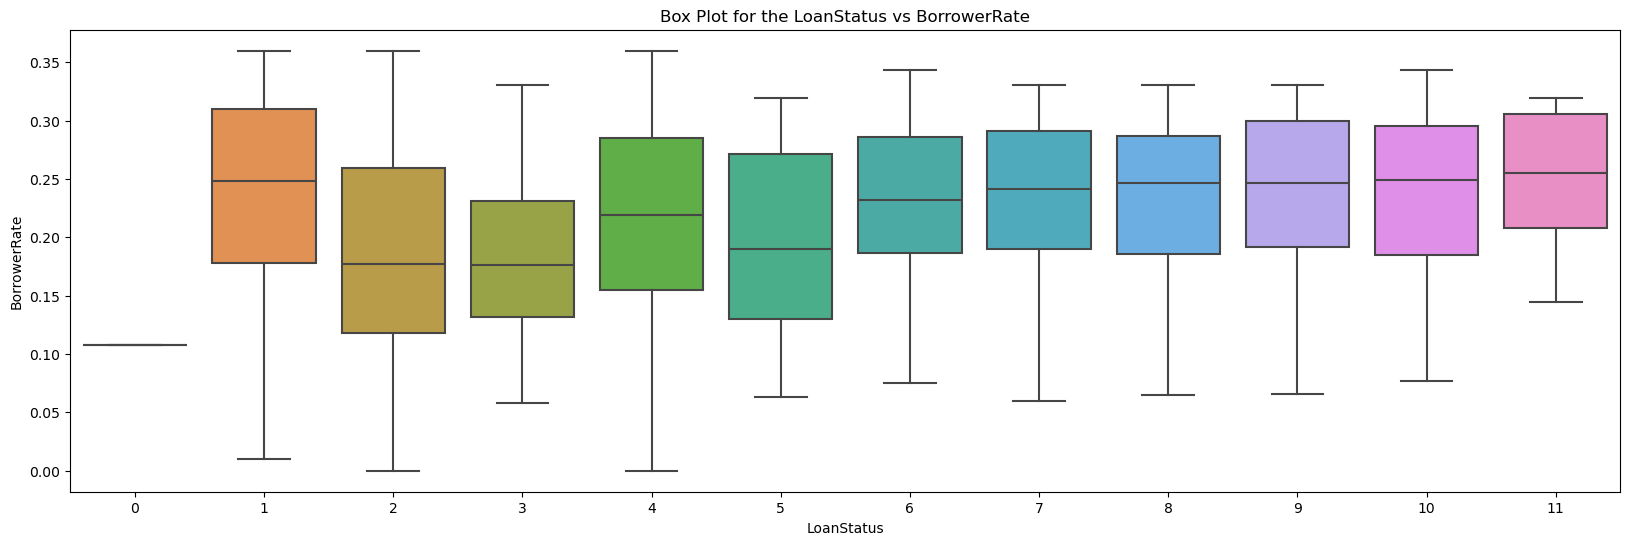

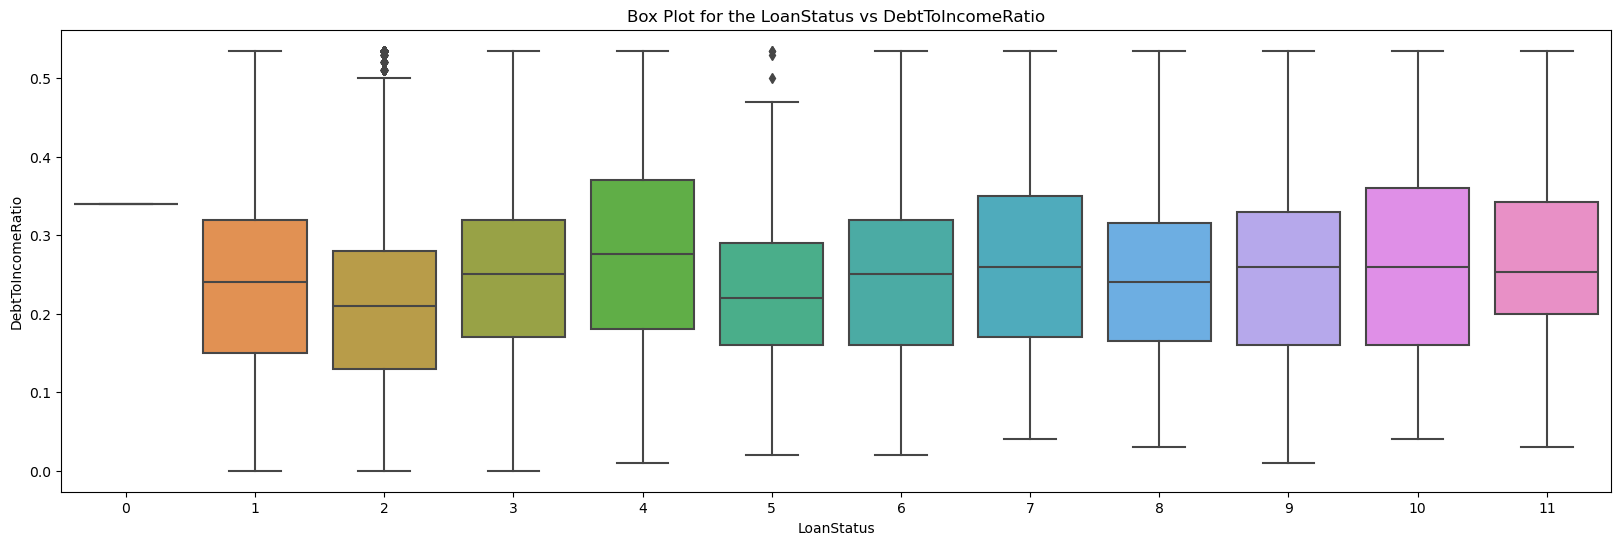

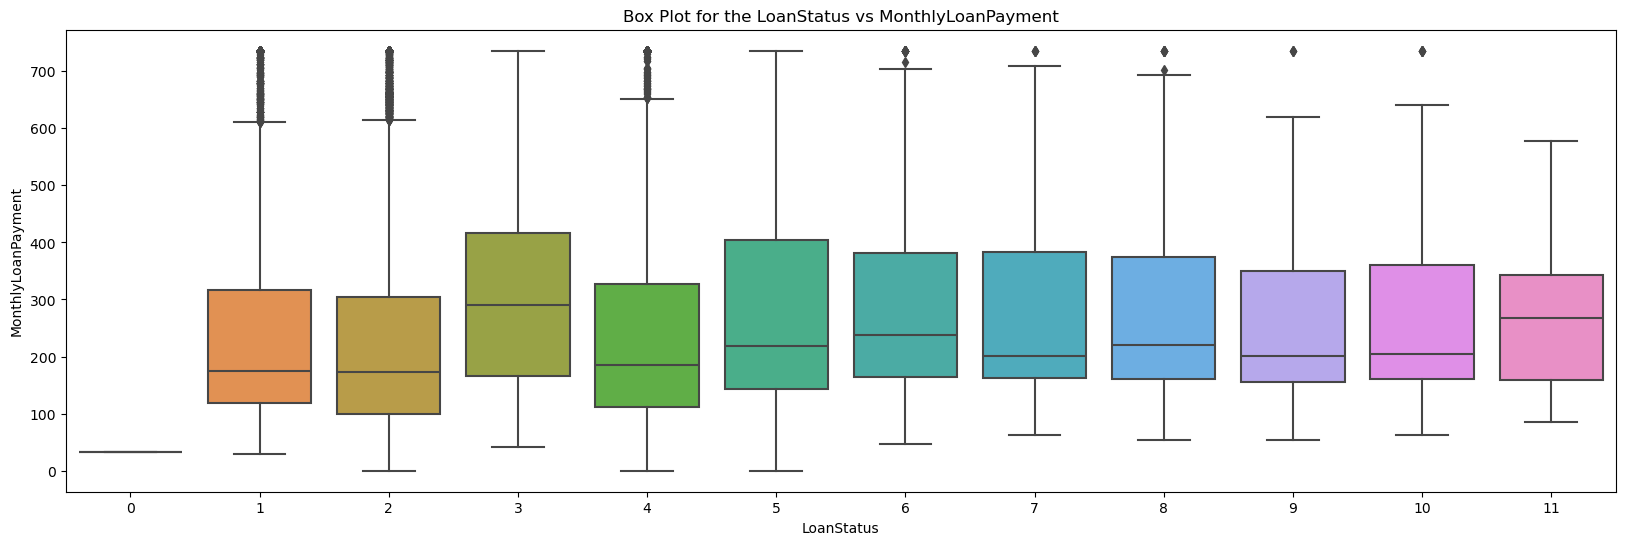

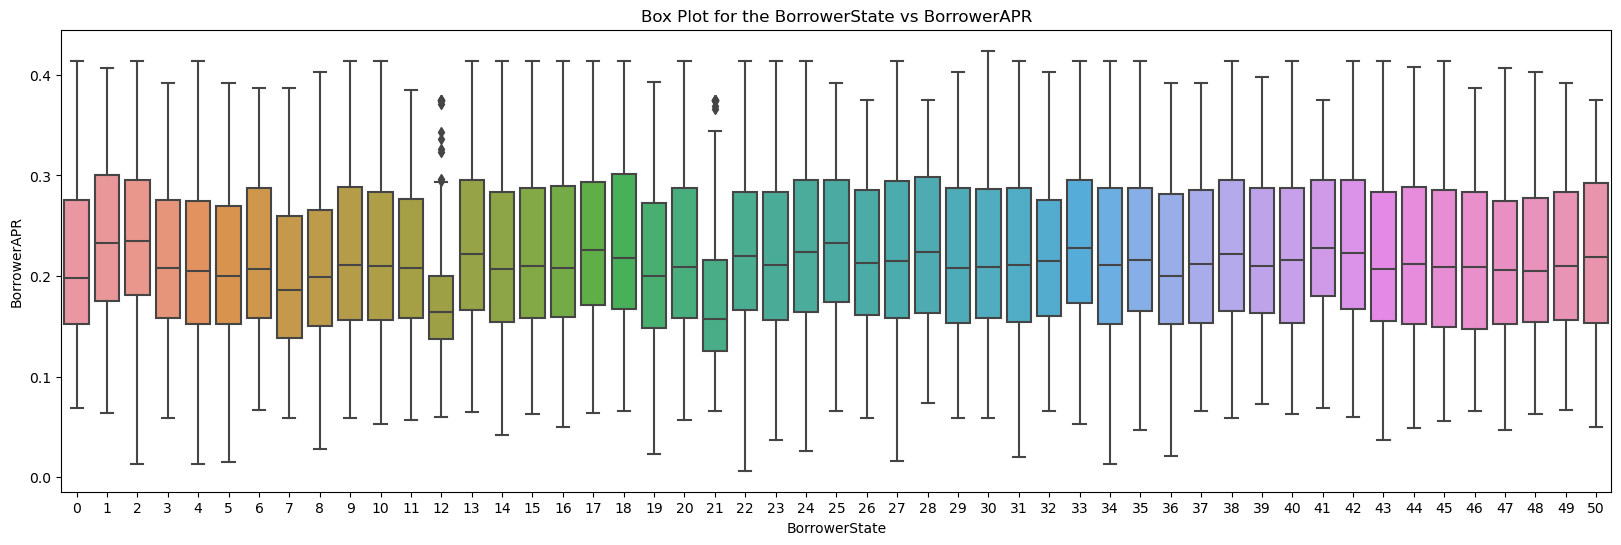

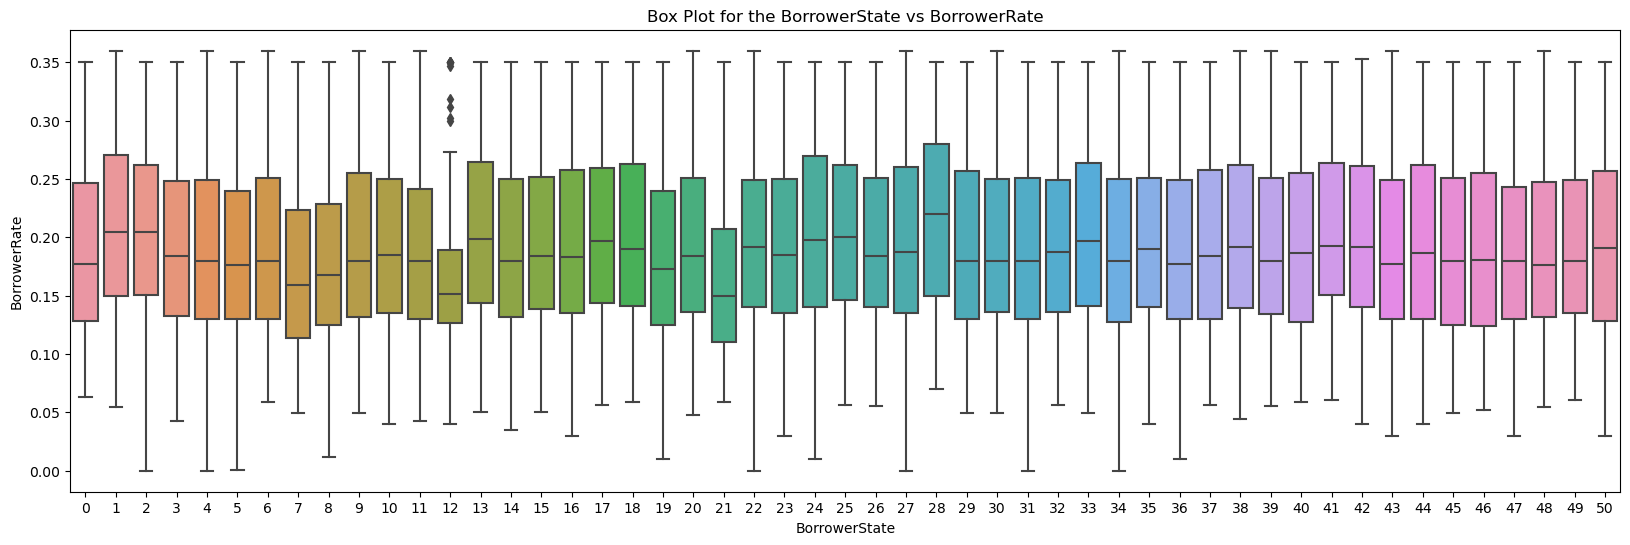

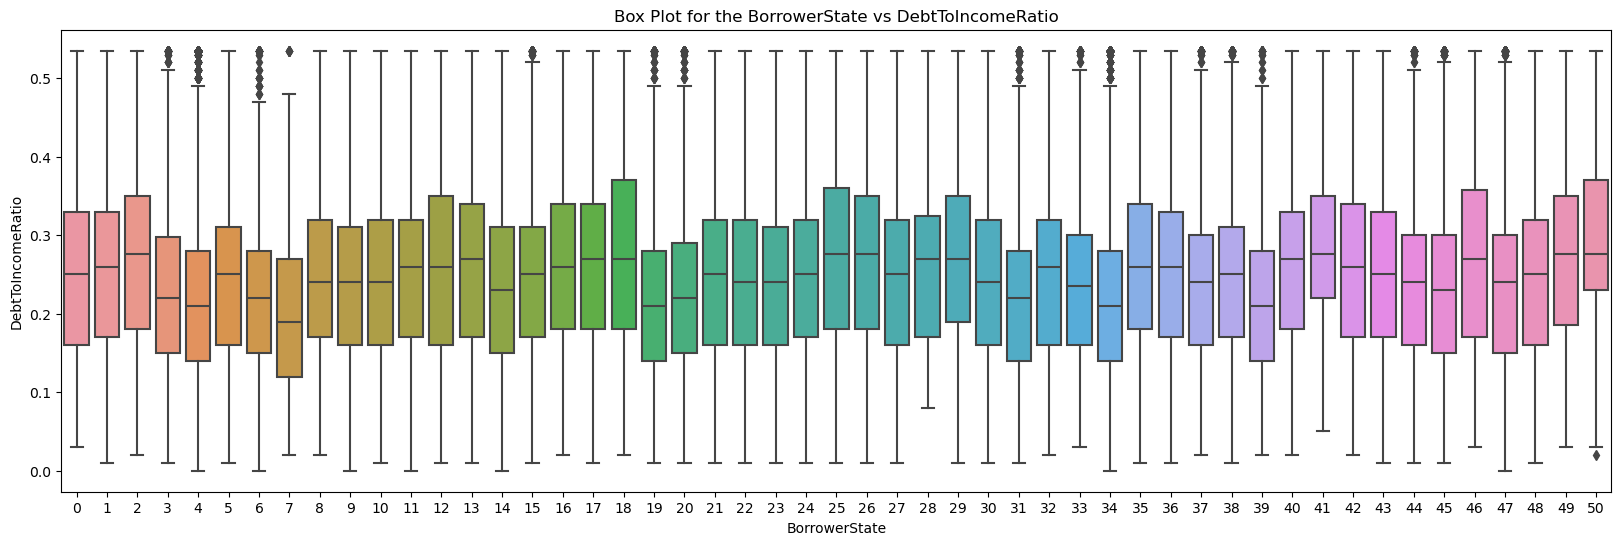

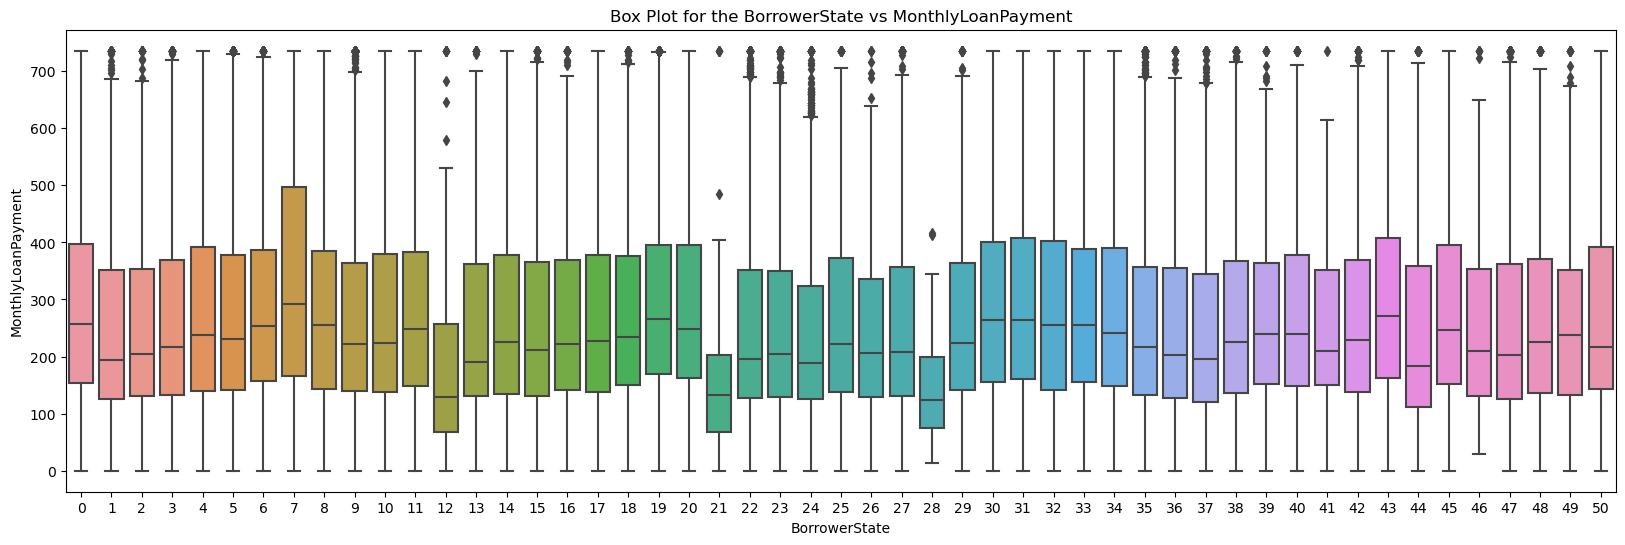

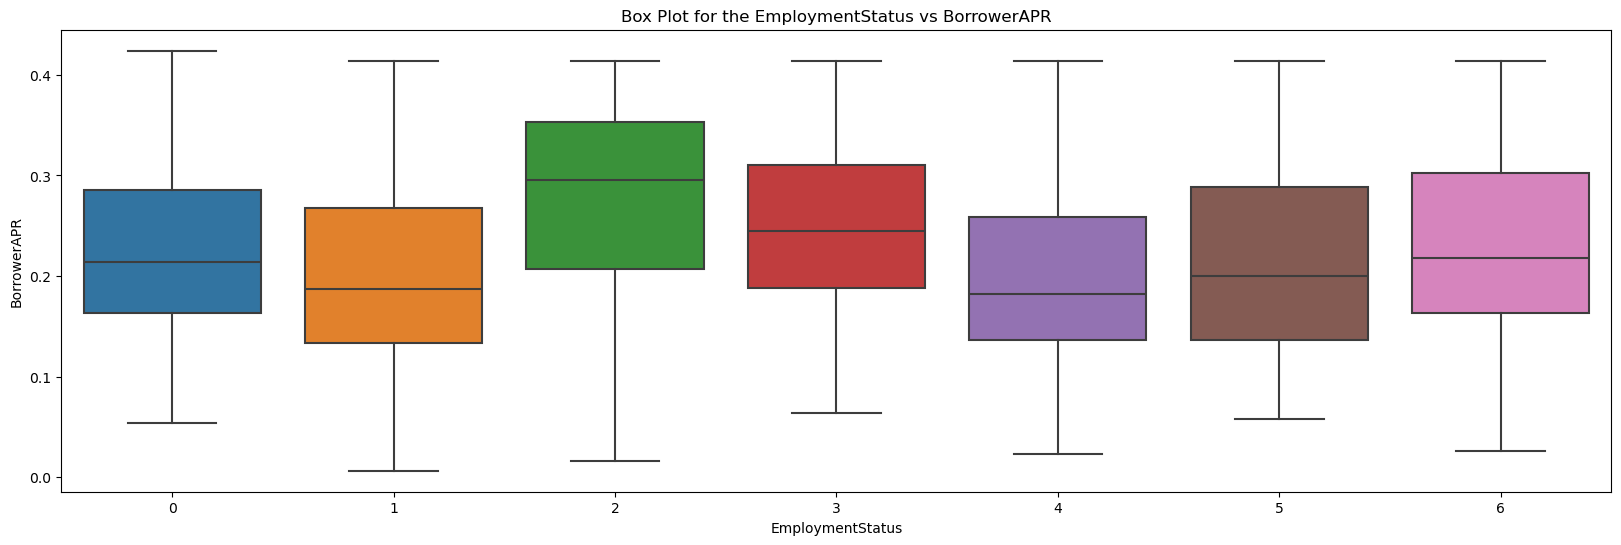

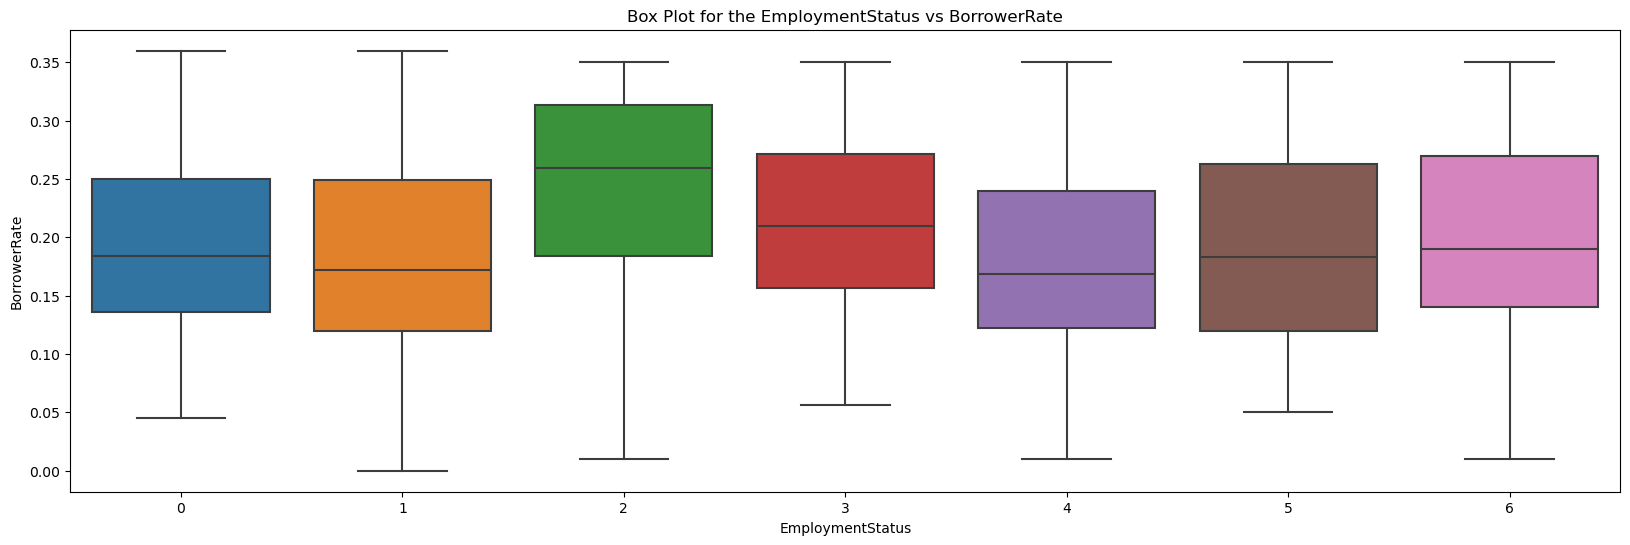

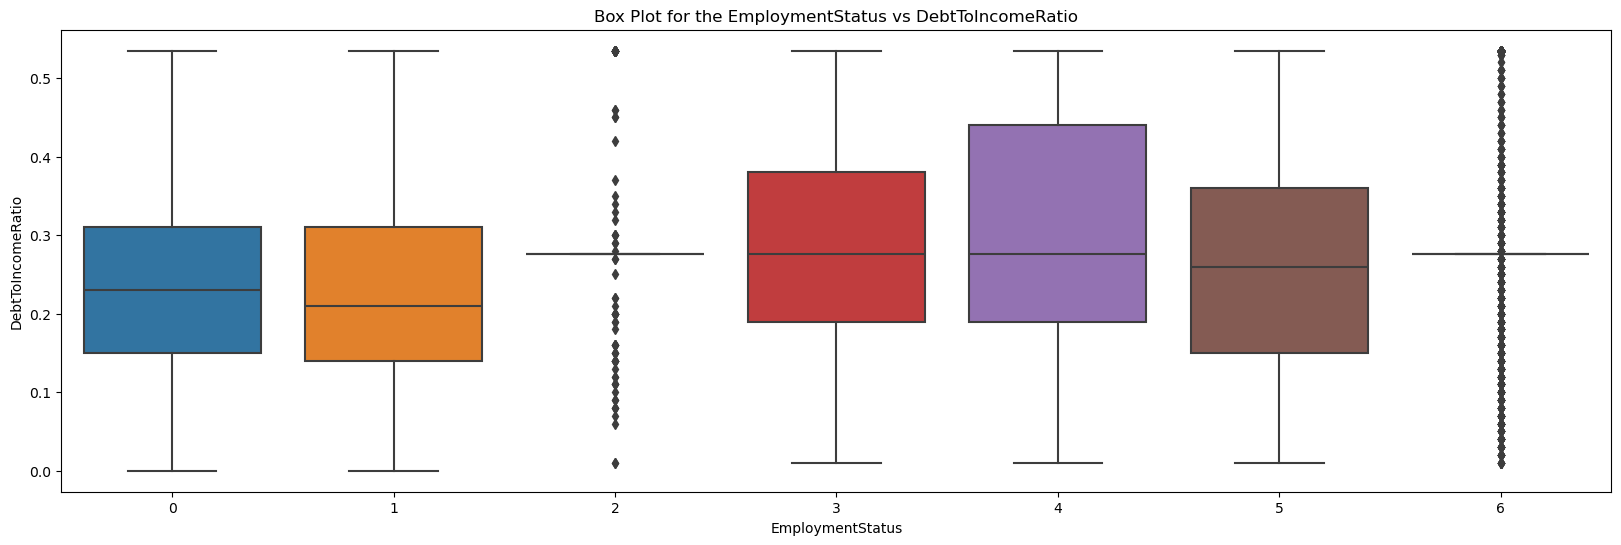

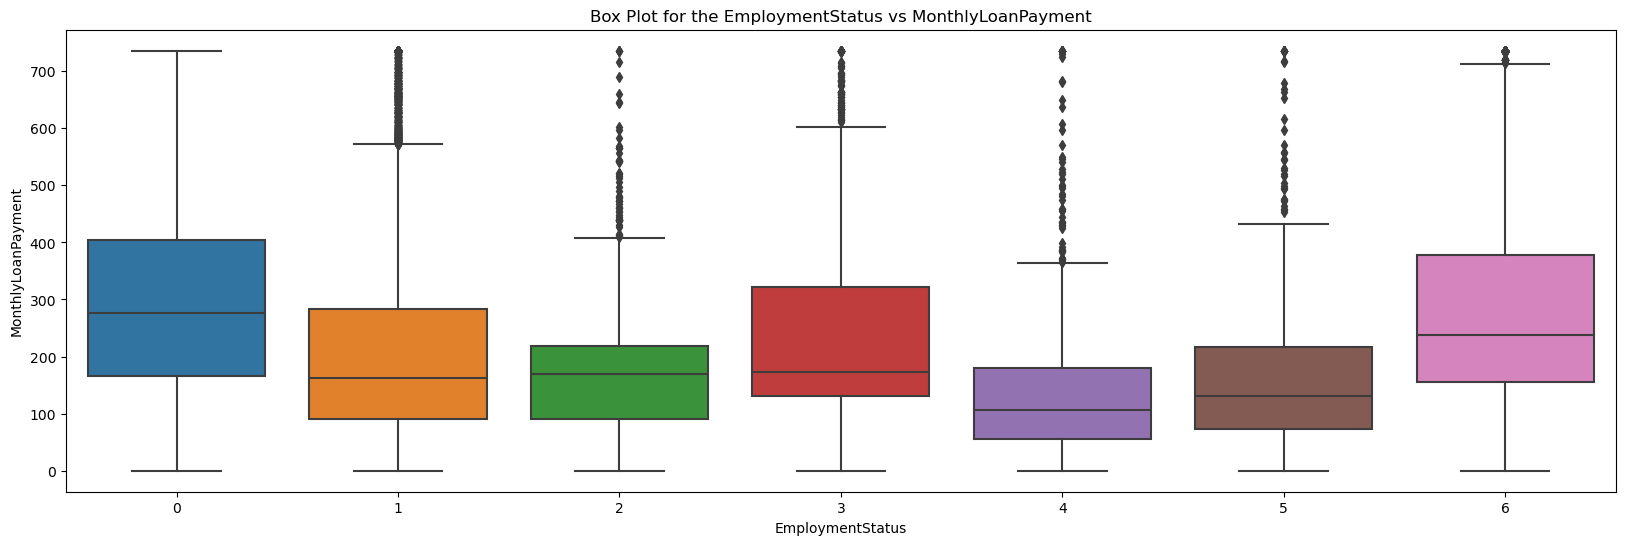

In [54]:
numcols1 = ['BorrowerAPR', 'BorrowerRate', 'DebtToIncomeRatio', 'MonthlyLoanPayment']
catcols1 = ['IncomeRange', 'ProsperRating (Alpha)','LoanStatus','BorrowerState','EmploymentStatus']
for i in catcols1:
    for j in numcols1:
        plt.figure(figsize = (20,6))
        sns.boxplot(x = i, y = j, data = dfclassif)
        plt.title(f"Box Plot for the {i} vs {j}")
        plt.show()

### 3. Multivariate Data Analysis

#### Dimensionality Reduction using PCA
##### PCA is imported from the 'sklearn.decomposition' module, which is used for dimensionality reduction.

In [55]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaledfeatures = scaler.fit_transform(dfclassif[numcols])

In [56]:
pca = PCA()
pca_result = pca.fit_transform(scaledfeatures)

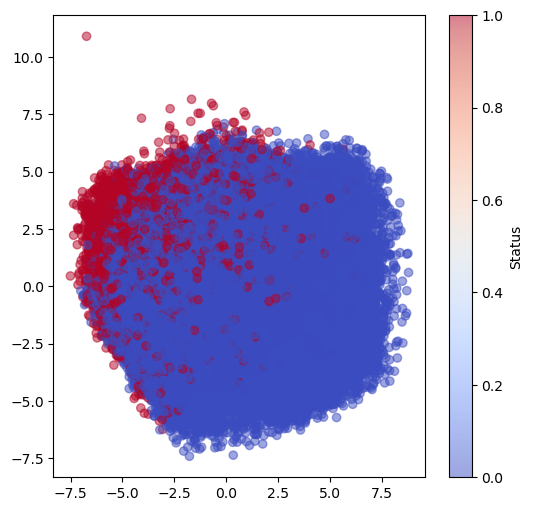

In [57]:
plt.figure(figsize = (6,6))
plt.scatter(pca_result[:,0], pca_result[:,1], cmap= 'coolwarm', c = dfclassif['Status'], alpha = 0.5)
plt.colorbar(label = 'Status')
plt.show()

#### 3D Plot

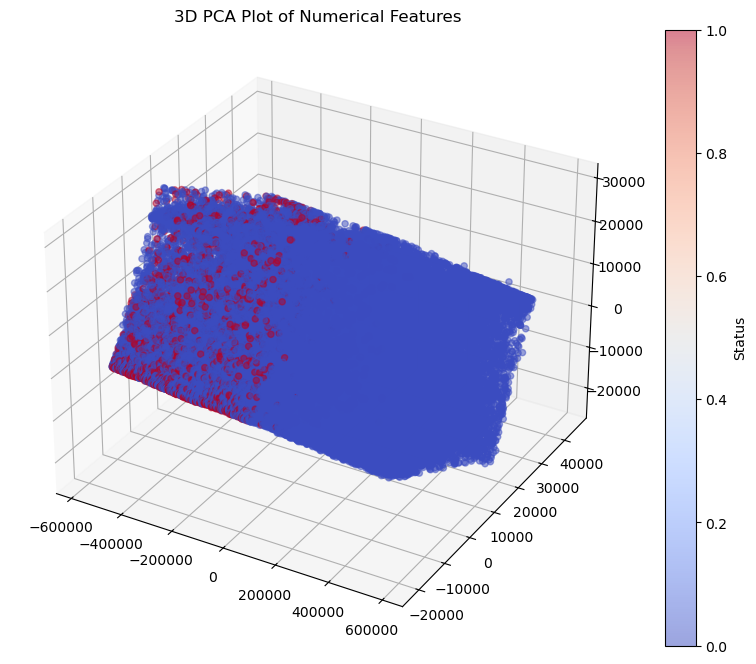

In [58]:
from mpl_toolkits.mplot3d import Axes3D
pca = PCA()
pca_result = pca.fit_transform(dfclassif[numcols])

fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111, projection = '3d')
sc = ax.scatter(pca_result[:,0], pca_result[:,1], pca_result[:, 2], c = dfclassif['Status'], cmap = 'coolwarm', alpha = 0.5)
plt.title('3D PCA Plot of Numerical Features')
plt.colorbar(sc, label = 'Status')
plt.show()


In [59]:
dfclassif['IncomeRange'].value_counts()

IncomeRange
3    32186
4    31049
2    17336
5    16916
1     7267
7      803
0      618
6      138
Name: count, dtype: int64

## Feature Engineering

### 1. Feature Selection

In [60]:
dfclassif.shape

(106313, 61)

In [61]:
X = dfclassif.drop(columns = ['Status'])
y = dfclassif['Status']

### Resampling using SMOTE (Synthetic Minority Over Sampling Technique)

**SMOTE** is done by generating synthetic samples for the minority class.
- It identifies the imbalance.
- Focus on the minority.
  - Creates synthetic samples just for the minority data points and generates the new ones similar to them.
- Increase minority.
  - By adding these, SMOTE balances the data, giving the model a better chance to learn the minority class.

In [62]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 42)

In [63]:
smote = SMOTE(random_state = 42)
X_resampled , y_resampled = smote.fit_resample(X_train, y_train)

In [64]:
y_resampled.value_counts()

Status
0    75021
1    75021
Name: count, dtype: int64

In [65]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)

#### Mutual Information

In [66]:
from sklearn.feature_selection import mutual_info_classif
miscores = mutual_info_classif(X_resampled_scaled, y_resampled)
mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': miscores})
mi_df = mi_df.sort_values(by= 'MI Score', ascending = False)
print(mi_df)

                               Feature  MI Score
44           LoanCurrentDaysDelinquent  0.693157
59                           Investors  0.477658
20            EmploymentStatusDuration  0.471894
37                         TotalTrades  0.463444
35                 BankcardUtilization  0.462305
40                   DebtToIncomeRatio  0.453621
9                          LenderYield  0.444398
8                         BorrowerRate  0.444178
26                  CurrentCreditLines  0.433523
29         OpenRevolvingMonthlyPayment  0.432876
5                           LoanStatus  0.432178
31                      TotalInquiries  0.430872
27                     OpenCreditLines  0.429710
7                          BorrowerAPR  0.419033
28               OpenRevolvingAccounts  0.413511
25               CreditScoreRangeUpper  0.408231
24               CreditScoreRangeLower  0.407885
38  TradesNeverDelinquent (percentage)  0.407575
11                       EstimatedLoss  0.378834
47                  

In [67]:
from sklearn.feature_selection import mutual_info_classif
miscores = mutual_info_classif(X_resampled_scaled, y_resampled)
mi_df = pd.DataFrame({'Feature': X.columns, 'Importance': miscores})
topmi = mi_df.nlargest(50, 'Importance')['Feature']
print(topmi)

44             LoanCurrentDaysDelinquent
59                             Investors
20              EmploymentStatusDuration
35                   BankcardUtilization
37                           TotalTrades
40                     DebtToIncomeRatio
8                           BorrowerRate
9                            LenderYield
29           OpenRevolvingMonthlyPayment
26                    CurrentCreditLines
5                             LoanStatus
27                       OpenCreditLines
31                        TotalInquiries
7                            BorrowerAPR
28                 OpenRevolvingAccounts
38    TradesNeverDelinquent (percentage)
25                 CreditScoreRangeUpper
24                 CreditScoreRangeLower
11                         EstimatedLoss
47                    LoanOriginalAmount
6                             ClosedDate
12                       EstimatedReturn
10               EstimatedEffectiveYield
30                  InquiriesLast6Months
15              

### 3. Normalization, Scaling and PCA (Principal Component Analysis)

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)
pca = PCA(n_components =  0.95)
X_resampled_pca = pca.fit_transform(X_resampled_scaled)
X_test_pca = pca.transform(X_test_scaled)
print('Original: ', X_resampled.shape)
print('Transformed: ', X_resampled_pca.shape)

Original:  (150042, 60)
Transformed:  (150042, 33)


In [69]:
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Number of components selected:", pca.n_components_)

Explained variance ratio: [0.19223228 0.13951769 0.09230546 0.06581765 0.04197913 0.03001052
 0.02883059 0.02507137 0.02203953 0.02156858 0.02056629 0.01840965
 0.01717625 0.01686633 0.01676457 0.01661925 0.01614064 0.01596827
 0.01528443 0.01487855 0.01423209 0.01368264 0.01278932 0.01182646
 0.01132981 0.01046065 0.00922744 0.00852577 0.00730733 0.00710531
 0.00649011 0.00634163 0.00571145]
Number of components selected: 33


##### The number of components selected by PCA indicates how many principal components are needed to retain 95% of the variance.

**Explained Variance Ratio:** The printed array shows the proportion of variance explained by each principal component.


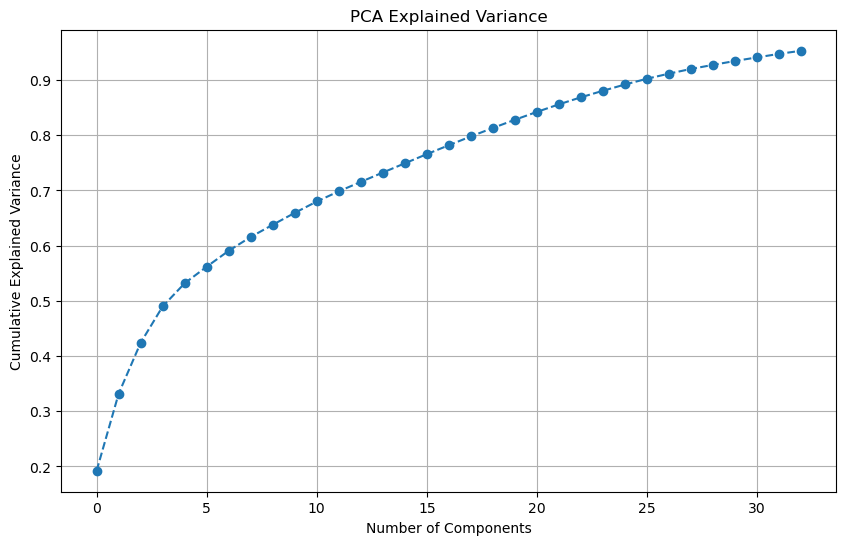

In [70]:
plt.figure(figsize= (10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker = 'o', linestyle = '--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid(True)
plt.show()

##### This diagram shows a plot of the cumulative explained variance against the number of components from a Principal Component Analysis (PCA).
- X-axis (Number of Components)
- Y-axis (Cumulative Explained Variance)

##### The plot starts at the origin (0,0).
- As you move to the right, adding more components, the cumulative explained variance increases.
- The curve usually rises quickly at first, indicating that the first few components capture most of the variance.
- Eventually, the curve levels off, indicating that adding more components captures less additional variance.

## Model Building

In [71]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [72]:
X_train_new = X_resampled_pca
y_train_new = y_resampled
X_test_new = X_test_pca

### 1. Logistic Regression

In [73]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state = 42)
LR.fit(X_train_new, y_train_new)
ypred1 = LR.predict(X_test_new)
print("Logistic Regression")
print(classification_report(y_test, ypred1))
print("Confusin matrix:\n", confusion_matrix(y_test, ypred1))
print("Accuracy:\n", accuracy_score(y_test, ypred1))


Logistic Regression
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     18791
           1       0.84      0.91      0.88      2472

    accuracy                           0.97     21263
   macro avg       0.91      0.95      0.93     21263
weighted avg       0.97      0.97      0.97     21263

Confusin matrix:
 [[18364   427]
 [  212  2260]]
Accuracy:
 0.9699477966420543


### 2. Decision Tree Classification

In [74]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(random_state = 42)
DT.fit(X_train_new, y_train_new)
ypred2 = DT.predict(X_test_new)
print("Decision Tress Classification")
print(classification_report(y_test, ypred2))
print("Confusion matrix:\n", confusion_matrix(y_test, ypred2))
print("Accuracy:\n", accuracy_score(y_test, ypred2))

Decision Tress Classification
              precision    recall  f1-score   support

           0       0.97      0.93      0.95     18791
           1       0.59      0.78      0.67      2472

    accuracy                           0.91     21263
   macro avg       0.78      0.85      0.81     21263
weighted avg       0.93      0.91      0.92     21263

Confusion matrix:
 [[17462  1329]
 [  546  1926]]
Accuracy:
 0.9118186521187038


### 3. Naive Bayes Classification

In [75]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train_new, y_train_new)
ypred3 = NB.predict(X_test_new)
print("Naive Bayes Classification")
print(classification_report(y_test, ypred3))
print("Confusion matrix:\n", confusion_matrix(y_test, ypred3))
print("Accuracy:\n",accuracy_score(y_test, ypred3))

Naive Bayes Classification
              precision    recall  f1-score   support

           0       0.96      0.92      0.94     18791
           1       0.55      0.73      0.63      2472

    accuracy                           0.90     21263
   macro avg       0.75      0.83      0.78     21263
weighted avg       0.91      0.90      0.90     21263

Confusion matrix:
 [[17276  1515]
 [  657  1815]]
Accuracy:
 0.8978507266143065


### 4. SVM - Support Vector Machine

In [76]:
from sklearn.svm import SVC
svm = SVC(random_state = 42)
svm.fit(X_train_new, y_train_new)
ypred4 = svm.predict(X_test_new)
print("SVM : Support Vector Machine")
print(classification_report(y_test, ypred4))
print("Confusion matrix:\n", confusion_matrix(y_test, ypred4))
print("Accuracy:\n",accuracy_score(y_test, ypred4))

SVM : Support Vector Machine
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     18791
           1       0.93      0.97      0.95      2472

    accuracy                           0.99     21263
   macro avg       0.96      0.98      0.97     21263
weighted avg       0.99      0.99      0.99     21263

Confusion matrix:
 [[18610   181]
 [   86  2386]]
Accuracy:
 0.9874429760617034


### Cross-Validation

In [77]:
from sklearn.model_selection import cross_val_score
LR = LogisticRegression(random_state = 42)
LRscores = cross_val_score(LR, X_train_new, y_train_new, cv = 5, scoring = 'accuracy')
print("Logistic Regression Cross-validation Scores: ",LRscores)
print("Mean Accuracy: ",LRscores.mean())

Logistic Regression Cross-validation Scores:  [0.95054817 0.97377453 0.9745068  0.97344042 0.97527326]
Mean Accuracy:  0.9695086355458333


In [78]:
from sklearn.model_selection import cross_val_score
DT = DecisionTreeClassifier(random_state = 42)
DTscores = cross_val_score(DT, X_train_new, y_train_new, cv = 5, scoring = 'accuracy')
print("Decision Tree Cross-validation Scores: ",DTscores)
print("Mean Accuracy: ",DTscores.mean())

Decision Tree Cross-validation Scores:  [0.9007631  0.93998467 0.94038256 0.94128232 0.94071581]
Mean Accuracy:  0.9326256948295409


In [79]:
from sklearn.model_selection import cross_val_score
NB = GaussianNB()
NBscores = cross_val_score(NB, X_train_new, y_train_new, cv = 5, scoring = 'accuracy')
print("Naive Bayes Cross-validation Scores: ",NBscores)
print("Mean Accuracy: ",NBscores.mean())

Naive Bayes Cross-validation Scores:  [0.83611583 0.91309274 0.91322314 0.91149027 0.9138563 ]
Mean Accuracy:  0.897555657100968


In [80]:
from sklearn.model_selection import cross_val_score
svm = SVC(random_state = 42)
svmscores = cross_val_score(svm, X_train_new, y_train_new, cv = 5, scoring = 'accuracy')
print("SVM Cross-validation Scores: ",svmscores)
print("Mean Accuracy: ",svmscores.mean())

SVM Cross-validation Scores:  [0.9808724  0.99330201 0.99406825 0.99300187 0.99340176]
Mean Accuracy:  0.9909292577018505


## Model Performance Analysis - (Classification)

### Logistic Regression
- *Accuracy*: 0.97
- *Precision*: High for both classes, especially for class 0 (0.99).
- *Recall*: Very high for class 0 (0.98), good for class 1 (0.91).
- *F1-Score*: High for both classes, indicating balanced performance.
- *Cross-Validation Mean Accuracy*: 0.97

### Decision Tree Classification
- *Accuracy*: 0.91
- *Precision*: High for class 0 (0.97), moderate for class 1 (0.59).
- *Recall*: High for class 0 (0.93), moderate for class 1 (0.78).
- *F1-Score*: High for class 0 (0.95), moderate for class 1 (0.67).
- *Cross-Validation Mean Accuracy*: 0.93

### Naive Bayes Classification
- *Accuracy*: 0.90
- *Precision*: High for class 0 (0.96), lower for class 1 (0.55).
- *Recall*: High for class 0 (0.92), moderate for class 1 (0.73).
- *F1-Score*: High for class 0 (0.94), moderate for class 1 (0.63).
- *Cross-Validation Mean Accuracy*: 0.90

### Support Vector Machine (SVM)
- *Accuracy*: 0.99
- *Precision*: Very high for both classes, especially for class 0 (1.00).
- *Recall*: Very high for both classes, especially for class 0 (0.99).
- *F1-Score*: Very high for both classes, indicating excellent performance.
- *Cross-Validation Mean Accuracy*: 0.99

### Summary
- ***Logistic Regression* and *SVM* show the highest overall accuracy and balanced performance across precision, recall, and F1-score.**
- *Decision Tree* and *Naive Bayes* perform well but have lower precision and recall for class 1 compared to Logistic Regression and SVM.
- *SVM* has the highest mean cross-validation accuracy, indicating it generalizes well across different subsets of the data.

# **Regression**

## Loading the cleaned dataset

In [81]:
dfreg = pd.read_csv('FinalProsperLoanDataForReg.csv')

## Data Structure and Content

In [82]:
dfreg.head()

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
3  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   
4  0F05359734824199381F61D        1074836  2013-12-14 08:26:37.093000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1           C    36    Current  2014-03-04 00:00:00      0.12016   
2           C    36    Current  2014-03-04 00:00:00      0.12528   
3           C    36    Current  2014-03-04 00:00:00      0.24614   
4           C    60    Current  2014-03-04 00:00:00      0.15425   

   BorrowerRate  LenderYield  ...  MonthlyLoanPayment  LP_CustomerPayments  \
0        0.1580       0.1380  ...              330.43             11396.14   
1        0.0920       0.0820  ...              318.93                 0.00   
2        0.0974       0.0874  ...              321.45              5143.20   
3        0.2085       0.1985  ...              563.97              2819.85   
4        0.1314       0.1214  ...              342.37               679.34   

   LP_CustomerPrincipalPayments  LP_InterestandFees LP_ServiceFees  \
0                       9272.20             1971.14        -133.18   
1                          0.00                0.00           0.00   
2                       4091.09             1052.11        -108.01   
3                       1563.22             1256.63         -60.27   
4                        351.89              327.45         -25.33   

   LP_CollectionFees  LP_NonPrincipalRecoverypayments PercentFunded Investors  \
0                0.0                              0.0           1.0     258.0   
1                0.0                              0.0           1.0       1.0   
2                0.0                              0.0           1.0     158.0   
3                0.0                              0.0           1.0      20.0   
4                0.0                              0.0           1.0       1.0   

  Status  
0      0  
1      0  
2      0  
3      0  
4      0  

[5 rows x 61 columns]

In [83]:
dfreg.tail()

ListingKey  ListingNumber            ListingCreationDate  \
106308  E6D9357655724827169606C         753087  2013-04-14 05:55:02.663000000   
106309  E6DB353036033497292EE43         537216  2011-11-03 20:42:55.333000000   
106310  E6E13596170052029692BB1        1069178  2013-12-13 05:49:12.703000000   
106311  E6EB3531504622671970D9E         539056  2011-11-14 13:18:26.597000000   
106312  E6ED3600409833199F711B7        1140093  2014-01-15 09:27:37.657000000   

       CreditGrade  Term              LoanStatus           ClosedDate  \
106308           C    36                 Current  2014-03-04 00:00:00   
106309           C    36  FinalPaymentInProgress  2014-03-04 00:00:00   
106310           C    60                 Current  2014-03-04 00:00:00   
106311           C    60               Completed  2013-08-13 00:00:00   
106312           C    36                 Current  2014-03-04 00:00:00   

        BorrowerAPR  BorrowerRate  LenderYield  ...  MonthlyLoanPayment  \
106308      0.22354        0.1864       0.1764  ...              364.74   
106309      0.13220        0.1110       0.1010  ...               65.57   
106310      0.23984        0.2150       0.2050  ...              273.35   
106311      0.28408        0.2605       0.2505  ...              449.55   
106312      0.13189        0.1039       0.0939  ...               64.90   

        LP_CustomerPayments  LP_CustomerPrincipalPayments  LP_InterestandFees  \
106308            3647.4000                       2238.38           1409.0200   
106309            2330.5500                       1997.16            333.3900   
106310             546.7000                        183.15            363.5500   
106311           12318.4200                       9272.20           3270.1750   
106312              64.3307                         47.25             17.0807   

       LP_ServiceFees  LP_CollectionFees  LP_NonPrincipalRecoverypayments  \
106308         -75.58                0.0                              0.0   
106309         -30.05                0.0                              0.0   
106310         -16.91                0.0                              0.0   
106311        -235.05                0.0                              0.0   
106312          -1.70                0.0                              0.0   

       PercentFunded Investors Status  
106308           1.0       1.0      0  
106309           1.0      22.0      0  
106310           1.0     119.0      0  
106311           1.0     274.0      0  
106312           1.0       1.0      0  

[5 rows x 61 columns]

In [84]:
dfreg.shape

(106313, 61)

In [85]:
dfreg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106313 entries, 0 to 106312
Data columns (total 61 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   ListingKey                          106313 non-null  object 
 1   ListingNumber                       106313 non-null  int64  
 2   ListingCreationDate                 106313 non-null  object 
 3   CreditGrade                         106313 non-null  object 
 4   Term                                106313 non-null  int64  
 5   LoanStatus                          106313 non-null  object 
 6   ClosedDate                          106313 non-null  object 
 7   BorrowerAPR                         106313 non-null  float64
 8   BorrowerRate                        106313 non-null  float64
 9   LenderYield                         106313 non-null  float64
 10  EstimatedEffectiveYield             106313 non-null  float64
 11  EstimatedLoss             

In [86]:
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [87]:
dfreg.isnull().sum().sum()

0

In [88]:
dfreg.duplicated().sum()

0

### Loan Tenure

**LoanTenure = (𝑀𝑎𝑡𝑢𝑟𝑖𝑡𝑦𝐷𝑎𝑡_𝑂𝑟𝑖𝑔𝑖𝑛𝑎𝑙𝑦𝑒𝑎𝑟 − 𝐿𝑜𝑎𝑛𝐷𝑎𝑡𝑒𝑦𝑒𝑎𝑟) 𝑥 12 −
(𝑀𝑎𝑡𝑢𝑟𝑖𝑡𝑦𝐷𝑎𝑡𝑒_𝑂𝑟𝑖𝑔𝑖𝑛𝑎𝑙𝑚𝑜𝑛𝑡ℎ − 𝐿𝑜𝑎𝑛𝐷𝑎𝑡𝑒𝑚𝑜𝑛𝑡ℎ)**

In [89]:
dfreg["Term"].describe()

count    106313.000000
mean         41.176639
std          10.720635
min          12.000000
25%          36.000000
50%          36.000000
75%          36.000000
max          60.000000
Name: Term, dtype: float64

In [90]:
datecols = ["ClosedDate", "LoanOriginationDate", "ListingCreationDate"]
dfreg.dropna()
dfreg.shape

(106313, 61)

In [91]:
for col in datecols:
    dfreg[col] = pd.to_datetime(dfreg[col], errors='coerce')
dfreg.shape

(106313, 61)

In [92]:
print(dfreg.shape)
dfreg[datecols].head()

(106313, 61)


ClosedDate LoanOriginationDate     ListingCreationDate
0 2009-08-14          2007-09-12 2007-08-26 19:09:29.263
1 2014-03-04          2014-03-03 2014-02-27 08:28:07.900
2 2014-03-04          2012-11-01 2012-10-22 11:02:35.010
3 2014-03-04          2013-09-20 2013-09-14 18:38:39.097
4 2014-03-04          2013-12-24 2013-12-14 08:26:37.093

In [93]:
dfreg["LoanTenure"] = ((dfreg["ClosedDate"].dt.year - dfreg["LoanOriginationDate"].dt.year) * 12) - (dfreg["ClosedDate"].dt.month - dfreg["LoanOriginationDate"].dt.month)

In [94]:
dfreg["LoanTenure"].describe()

count    106300.000000
mean         18.026152
std          13.018767
min         -27.000000
25%          11.000000
50%          18.000000
75%          27.000000
max          59.000000
Name: LoanTenure, dtype: float64

In [95]:
print(dfreg["Term"].describe())
print(dfreg["LoanTenure"].describe())

count    106313.000000
mean         41.176639
std          10.720635
min          12.000000
25%          36.000000
50%          36.000000
75%          36.000000
max          60.000000
Name: Term, dtype: float64
count    106300.000000
mean         18.026152
std          13.018767
min         -27.000000
25%          11.000000
50%          18.000000
75%          27.000000
max          59.000000
Name: LoanTenure, dtype: float64


In [96]:
dfreg.drop(datecols, axis=1, inplace=True)
dfreg.drop("LoanTenure", axis=1, inplace=True)
dfreg.rename(columns={"Term" : "LoanTenure"}, inplace=True)

In [97]:
dfreg.shape

(106313, 58)

### Equated Monthly Installments (EMI)

-	Tenure ---> **LoanTenure**
-	Principle repayment ---> **LP_CustomerPrinciplePayments**
-	Interest ---> **BorrowerRate**


In [98]:
#EMI Columns
EMI = ['LP_CustomerPayments', 'LP_CustomerPrincipalPayments']
dfreg[EMI].head()

LP_CustomerPayments  LP_CustomerPrincipalPayments
0             11396.14                       9272.20
1                 0.00                          0.00
2              5143.20                       4091.09
3              2819.85                       1563.22
4               679.34                        351.89

 ### EMI = P × r × (1 + r) ^ n / ((1 + r) ^ n – 1)

In [99]:
def EMI(P, r, n):
  P = P.values
  r = r.values
  n = n.values
  numerator = np.empty(0)
  denominator = np.empty(0)
  result = np.empty(0)
  for i in range(P.shape[0]):
    # EMI = P × r × (1 + r) ^ n / ((1 + r) ^ n – 1)
    numerator = np.append(numerator, P[i] * r[i] * np.power((1 + r[i]),n[i]))
    denominator = np.append(denominator, np.power((1 + r[i]),n[i]) - 1)
    result = np.append(result, (numerator[i] / denominator[i]))

  return result

In [100]:
dfreg["BorrowerRate"].describe()

count    106313.000000
mean          0.192986
std           0.075208
min           0.000000
25%           0.133400
50%           0.183500
75%           0.251100
max           0.360000
Name: BorrowerRate, dtype: float64

In [101]:
dfreg["EMI"] = EMI(dfreg["LP_CustomerPrincipalPayments"], dfreg["BorrowerRate"], dfreg["LoanTenure"])
dfreg["EMI"].describe()

count    106308.000000
mean        493.537440
std         545.155188
min           0.000000
25%          87.989381
50%         280.366407
75%         728.142676
max        3245.335954
Name: EMI, dtype: float64

### Eligible Loan Amount (ELA)

**Components of ELA:**

-	A: “AppliedAmount” ---> **LoanOriginalAmount**
-	R: “Interest” ---> **BorrowerRate**
-	N: “LoanTenure” ---> **LoanTenure**
-	I: “IncomeTotal”  ---> **StatedMonthlyIncome**

In [102]:
ELA = ['DebtToIncomeRatio', 'IncomeRange', 'IncomeVerifiable','StatedMonthlyIncome']
dfreg[ELA].head()

DebtToIncomeRatio     IncomeRange  IncomeVerifiable  StatedMonthlyIncome
0               0.17  $25,000-49,999              True          3083.333333
1               0.18  $50,000-74,999              True          6125.000000
2               0.15  $25,000-49,999              True          2875.000000
3               0.26       $100,000+              True          9583.333333
4               0.36       $100,000+              True          8333.333333

In [103]:
dfreg['IncomeVerifiable'].value_counts()

IncomeVerifiable
True     97764
False     8549
Name: count, dtype: int64

In [104]:
df_new = dfreg[dfreg['IncomeVerifiable'] == True]
print(df_new.shape)
print(dfreg.shape[0] - df_new.shape[0])

(97764, 59)
8549


In [105]:
def ELA(df):
  dfreg['Ava_Inc'] = (dfreg['StatedMonthlyIncome'] * 12 * 0.3) * dfreg['LoanTenure']
  dfreg['Total_Loan_Amnt'] = np.round(dfreg['LoanOriginalAmount'] + (dfreg['LoanOriginalAmount'] * df['BorrowerRate']) *df['LoanTenure'])

  ELA = np.empty(0)

  for i in range(len(dfreg['Ava_Inc'].values)):
    if dfreg['Ava_Inc'].iloc[i] <= 0:
      ELA = np.append(ELA, 0)
    elif dfreg['Total_Loan_Amnt'].iloc[i] <= dfreg['Ava_Inc'].iloc[i]:
      ELA = np.append(ELA, dfreg['Total_Loan_Amnt'].iloc[i])
    else:
      ELA = np.append(ELA, dfreg['Ava_Inc'].iloc[i])

  dfreg.drop(["Ava_Inc", "Total_Loan_Amnt"], axis=1, inplace=True)

  return ELA

In [106]:
dfreg['ELA'] = ELA(dfreg)
dfreg['ELA'].describe()

count    106313.000000
mean      72701.375241
std       59209.774768
min           0.000000
25%       29972.000000
50%       51680.000000
75%       99910.000000
max      383712.000000
Name: ELA, dtype: float64

In [107]:
# Dropping extra cols
['CreditGrade', 'ClosedDate',
       'ProsperRating (Alpha)', 'ListingCategory', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'IsBorrowerHomeowner',
       'CurrentlyInGroup', 'GroupKey', 'FirstRecordedCreditLine',
       'IncomeRange', 'IncomeVerifiable', 'LoanOriginationDate']
dfreg.drop(['LoanStatus'], axis=1, inplace=True)

In [108]:
dfreg.shape

(106313, 59)

## Preferred Return on Investment (PROI)

In [109]:
def plot_by_woe(df_WoE, rotation_of_x_axis_labels=0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize=(18, 6))
    plt.plot(x, y, marker='o', linestyle='--', color='k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title('Weight of Evidence by ' + df_WoE.columns[0])
    
    plt.xticks(rotation=rotation_of_x_axis_labels, ha='right', fontsize=10)
    plt.gca().tick_params(axis='x', which='major', pad=15)
    plt.tight_layout()
    plt.show()

In [110]:
dfreg.select_dtypes(exclude=[int, float]).columns

Index(['ListingKey', 'CreditGrade', 'ProsperRating (Alpha)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'IsBorrowerHomeowner',
       'CurrentlyInGroup', 'DateCreditPulled', 'IncomeRange',
       'IncomeVerifiable', 'LoanOriginationQuarter', 'MemberKey'],
      dtype='object')

In [111]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
cat = dfreg.select_dtypes(include=["object"]).columns
for col in cat:
    dfreg[col] = encoder.fit_transform(dfreg[col])
print(cat)

Index(['ListingKey', 'CreditGrade', 'ProsperRating (Alpha)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'DateCreditPulled', 'IncomeRange',
       'LoanOriginationQuarter', 'MemberKey'],
      dtype='object')


In [112]:
bool = ['IsBorrowerHomeowner', 'CurrentlyInGroup', 'IncomeVerifiable']
for col in bool:
    dfreg[col] = dfreg[col].astype(int)

In [113]:
dfreg.isnull().sum().sum()

5

In [114]:
dfreg.dropna(inplace=True)

In [115]:
dfreg.isnull().sum().sum()

0

## Feature Importance Analysis

In [116]:
X = dfreg.drop(["Status"], axis=1)
y = dfreg["Status"]
print(dfreg.shape)
print(y.shape)

(106308, 59)
(106308,)


In [117]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

In [118]:
from sklearn.model_selection import train_test_split
X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(X_scale, y, test_size=0.25, random_state=0)

In [119]:
from sklearn.ensemble import RandomForestRegressor
rid_reg = RandomForestRegressor()
rid_reg.fit(X_class_train, y_class_train)
y_pred_base = rid_reg.predict(X_class_test)

In [120]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error
# model evaluation
mse = mean_squared_error(y_class_test, y_pred_base)
mae =  mean_absolute_percentage_error(y_class_test, y_pred_base)
r2 = r2_score(y_class_test, y_pred_base)
print(f'Ridge Regression - Base Model:')
print(f'mean_squared_error : {mse:.6f}')
print(f'mean_squared_percentage_error : {mae:.6f}')
print(f'R2_score : {r2:.6f}')

Ridge Regression - Base Model:
mean_squared_error : 0.000000
mean_squared_percentage_error : 0.000000
R2_score : 1.000000


In [121]:
result = pd.DataFrame(X.columns.values, columns=['feature_name'])
result['importance'] = rid_reg.feature_importances_
result.sort_values(by='importance', ascending=False, inplace=True)
result.head(40)

feature_name  importance
41           LoanCurrentDaysDelinquent         1.0
0                           ListingKey         0.0
43                          LoanNumber         0.0
31              RevolvingCreditBalance         0.0
32                 BankcardUtilization         0.0
33             AvailableBankcardCredit         0.0
34                         TotalTrades         0.0
35  TradesNeverDelinquent (percentage)         0.0
36             TradesOpenedLast6Months         0.0
37                   DebtToIncomeRatio         0.0
38                         IncomeRange         0.0
39                    IncomeVerifiable         0.0
40                 StatedMonthlyIncome         0.0
42          LoanMonthsSinceOrigination         0.0
44                  LoanOriginalAmount         0.0
1                        ListingNumber         0.0
45              LoanOriginationQuarter         0.0
46                           MemberKey         0.0
47                  MonthlyLoanPayment         0.0
48                 LP_CustomerPayments         0.0
49        LP_CustomerPrincipalPayments         0.0
50                  LP_InterestandFees         0.0
51                      LP_ServiceFees         0.0
52                   LP_CollectionFees         0.0
53     LP_NonPrincipalRecoverypayments         0.0
54                       PercentFunded         0.0
55                           Investors         0.0
56                                 EMI         0.0
30             DelinquenciesLast7Years         0.0
29                    AmountDelinquent         0.0
28                      TotalInquiries         0.0
27                InquiriesLast6Months         0.0
2                          CreditGrade         0.0
3                           LoanTenure         0.0
4                          BorrowerAPR         0.0
5                         BorrowerRate         0.0
6                          LenderYield         0.0
7              EstimatedEffectiveYield         0.0
8                        EstimatedLoss         0.0
9                      EstimatedReturn         0.0

## Analysis of Numerical Attributes

In [122]:
# WoE function for ordered discrete and continuous variables
def woe_continuous(dfreg, discrete_variabe_name, good_bad_variable_df):
    dfreg = pd.concat([dfreg[discrete_variabe_name], good_bad_variable_df], axis = 1)
    dfreg = pd.concat([dfreg.groupby(dfreg.columns.values[0], as_index = False)[dfreg.columns.values[1]].count(),
                    dfreg.groupby(dfreg.columns.values[0], as_index = False)[dfreg.columns.values[1]].mean()], axis = 1)
    dfreg = dfreg.iloc[:, [0, 1, 3]]
    dfreg.columns = [dfreg.columns.values[0], 'n_obs', 'prop_good']
    dfreg['prop_n_obs'] = dfreg['n_obs'] / dfreg['n_obs'].sum()
    dfreg['n_good'] = dfreg['prop_good'] * dfreg['n_obs']
    dfreg['n_bad'] = (1 - dfreg['prop_good']) * dfreg['n_obs']
    dfreg['prop_n_good'] = dfreg['n_good'] / dfreg['n_good'].sum()
    dfreg['prop_n_bad'] = dfreg['n_bad'] / dfreg['n_bad'].sum()
    dfreg['WoE'] = np.log(dfreg['prop_n_good'] / dfreg['prop_n_bad'])
    dfreg['diff_prop_good'] = dfreg['prop_good'].diff().abs()
    dfreg['diff_WoE'] = dfreg['WoE'].diff().abs()
    dfreg['IV'] = (dfreg['prop_n_good'] - dfreg['prop_n_bad']) * dfreg['WoE']
    dfreg['IV'] = dfreg['IV'].sum()
    return dfreg

In [123]:
imp = ['LP_CustomerPrincipalPayments',
 'ProsperRating (Alpha)',
 'LoanOriginalAmount',
 'LoanCurrentDaysDelinquent',
 'MonthlyLoanPayment']
print(imp)

['LP_CustomerPrincipalPayments', 'ProsperRating (Alpha)', 'LoanOriginalAmount', 'LoanCurrentDaysDelinquent', 'MonthlyLoanPayment']


In [124]:
target = dfreg["Status"]
df_new = dfreg[imp]
df_new.shape

(106308, 5)

#### **LP_CustomerPrincipalPayments**

In [125]:
pd.options.display.max_rows = None
df_new['LP_CustomerPrincipalPayments_factor'] = pd.cut(df_new['LP_CustomerPrincipalPayments'], 10)
temp = woe_continuous(df_new, 'LP_CustomerPrincipalPayments_factor', target)
temp

LP_CustomerPrincipalPayments_factor  n_obs  prop_good  prop_n_obs  n_good  \
0                    (-9.272, 927.22]  39202   0.162951    0.368759  6388.0   
1                   (927.22, 1854.44]  18404   0.138339    0.173120  2546.0   
2                  (1854.44, 2781.66]  11677   0.107219    0.109841  1252.0   
3                  (2781.66, 3708.88]   7955   0.089629    0.074830   713.0   
4                   (3708.88, 4636.1]   6592   0.072512    0.062009   478.0   
5                   (4636.1, 5563.32]   5068   0.063141    0.047673   320.0   
6                  (5563.32, 6490.54]   2572   0.075428    0.024194   194.0   
7                  (6490.54, 7417.76]   2414   0.057167    0.022708   138.0   
8                  (7417.76, 8344.98]   2705   0.038078    0.025445   103.0   
9                   (8344.98, 9272.2]   9719   0.037967    0.091423   369.0   

     n_bad  prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE  \
0  32814.0     0.510999    0.349803  0.378997             NaN       NaN   
1  15858.0     0.203664    0.169049  0.186280        0.024611  0.192717   
2  10425.0     0.100152    0.111132 -0.104034        0.031120  0.290314   
3   7242.0     0.057035    0.077201 -0.302740        0.017590  0.198707   
4   6114.0     0.038237    0.065176 -0.533295        0.017117  0.230555   
5   4748.0     0.025598    0.050615 -0.681727        0.009371  0.148432   
6   2378.0     0.015519    0.025350 -0.490726        0.012286  0.191001   
7   2276.0     0.011039    0.024263 -0.787490        0.018261  0.296764   
8   2602.0     0.008239    0.027738 -1.213876        0.019089  0.426386   
9   9350.0     0.029518    0.099673 -1.216904        0.000111  0.003028   

         IV  
0  0.230488  
1  0.230488  
2  0.230488  
3  0.230488  
4  0.230488  
5  0.230488  
6  0.230488  
7  0.230488  
8  0.230488  
9  0.230488

In [126]:
pd.options.display.max_rows = None
temp = df_new[df_new['LP_CustomerPrincipalPayments'] < 2000]
temp['LP_CustomerPrincipalPayments_factor'] = pd.cut(temp['LP_CustomerPrincipalPayments'], 10)
temp = woe_continuous(temp, 'LP_CustomerPrincipalPayments_factor', target)
temp

LP_CustomerPrincipalPayments_factor  n_obs  prop_good  prop_n_obs  n_good  \
0                     (-2.0, 199.999]  13514   0.157540    0.226627  2129.0   
1                  (199.999, 399.998]   9701   0.153489    0.162684  1489.0   
2                  (399.998, 599.997]   7041   0.175401    0.118076  1235.0   
3                  (599.997, 799.996]   5779   0.166638    0.096913   963.0   
4                  (799.996, 999.995]   5341   0.168133    0.089568   898.0   
5                 (999.995, 1199.994]   5357   0.120963    0.089836   648.0   
6                (1199.994, 1399.993]   3565   0.153997    0.059784   549.0   
7                (1399.993, 1599.992]   3852   0.125389    0.064597   483.0   
8                (1599.992, 1799.991]   2789   0.159197    0.046771   444.0   
9                 (1799.991, 1999.99]   2692   0.122957    0.045144   331.0   

     n_bad  prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE  \
0  11385.0     0.232195    0.225615  0.028748             NaN       NaN   
1   8212.0     0.162395    0.162736 -0.002099        0.004051  0.030847   
2   5806.0     0.134693    0.115057  0.157571        0.021912  0.159671   
3   4816.0     0.105028    0.095438  0.095747        0.008763  0.061825   
4   4443.0     0.097939    0.088046  0.106477        0.001495  0.010731   
5   4709.0     0.070673    0.093318 -0.277948        0.047170  0.384425   
6   3016.0     0.059876    0.059768  0.001804        0.033034  0.279752   
7   3369.0     0.052678    0.066763 -0.236962        0.028608  0.238766   
8   2345.0     0.048424    0.046471  0.041176        0.033807  0.278138   
9   2361.0     0.036100    0.046788 -0.259330        0.036240  0.300506   

        IV  
0  0.01774  
1  0.01774  
2  0.01774  
3  0.01774  
4  0.01774  
5  0.01774  
6  0.01774  
7  0.01774  
8  0.01774  
9  0.01774

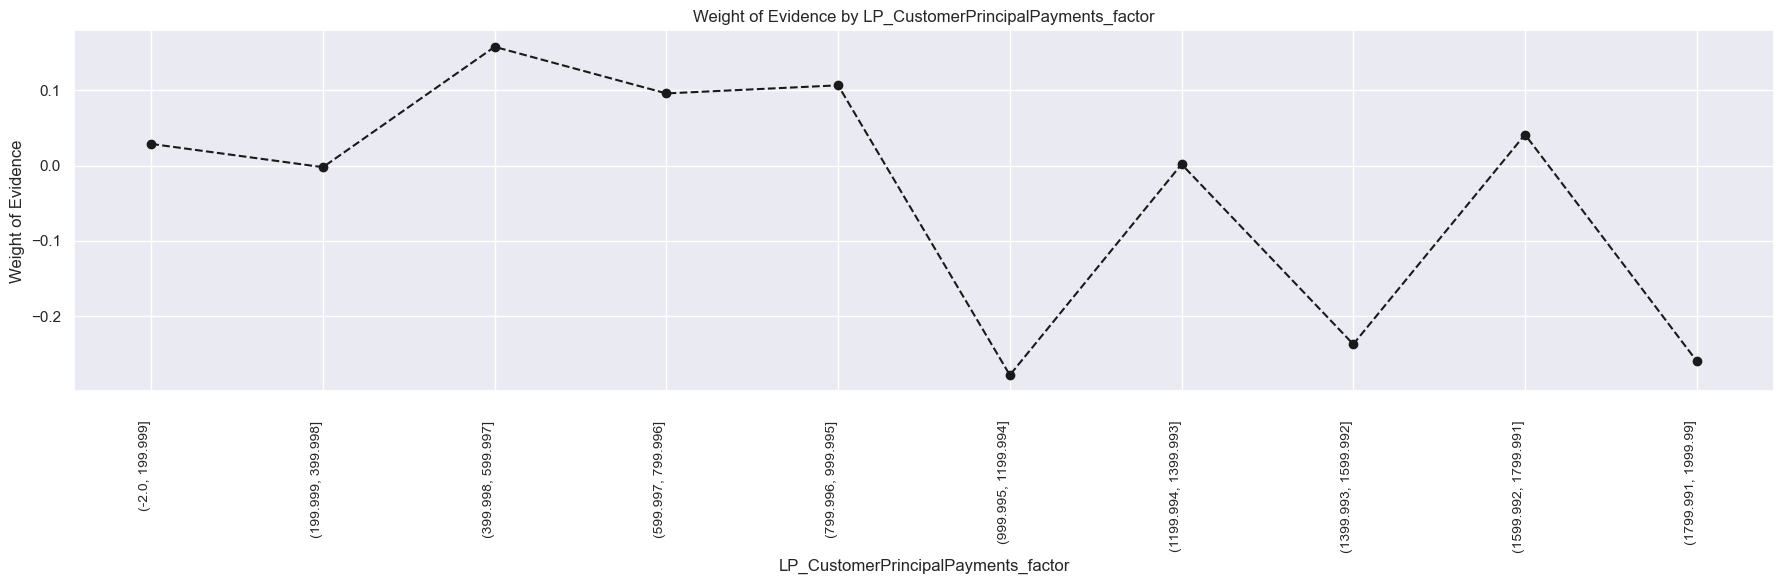

In [127]:
plot_by_woe(temp, 90)

In [128]:
# Create categorie
df_new['LP_CustomerPrincipalPayments_factor'] = np.where(df_new['LP_CustomerPrincipalPayments'] < 200, "<200",
                                                    np.where(df_new['LP_CustomerPrincipalPayments'] < 1000, "200_1k",
                                                    np.where(df_new['LP_CustomerPrincipalPayments'] < 2000, "1k_2k",
                                                    np.where(df_new['LP_CustomerPrincipalPayments'] < 10500, "2k_10.5k", ">10.5k"))))
df_new['LP_CustomerPrincipalPayments_factor'].value_counts()

LP_CustomerPrincipalPayments_factor
2k_10.5k    46677
200_1k      27862
1k_2k       18255
<200        13514
Name: count, dtype: int64

#### **ProsperRating (Alpha)**

In [129]:
df_new['ProsperRating_factor'] = df_new['ProsperRating (Alpha)'].map(lambda x: str(x))
print(df_new['ProsperRating_factor'].dtype)
df_new['ProsperRating_factor'].value_counts()

object


ProsperRating_factor
3    39800
2    15581
0    14551
4    14274
5     9795
6     6935
1     5372
Name: count, dtype: int64

#### **LoanOriginalAmount**

In [130]:
df_new['LoanOriginalAmount_factor'] = pd.cut(df_new['LoanOriginalAmount'], 10)
temp = woe_continuous(df_new, 'LoanOriginalAmount_factor', target)
temp

LoanOriginalAmount_factor  n_obs  prop_good  prop_n_obs  n_good    n_bad  \
0           (977.0, 3300.0]  20593   0.182635    0.193711  3761.0  16832.0   
1          (3300.0, 5600.0]  27076   0.134547    0.254694  3643.0  23433.0   
2          (5600.0, 7900.0]  11092   0.152182    0.104338  1688.0   9404.0   
3         (7900.0, 10200.0]  17402   0.074819    0.163694  1302.0  16100.0   
4        (10200.0, 12500.0]   4362   0.080468    0.041032   351.0   4011.0   
5        (12500.0, 14800.0]   2905   0.073666    0.027326   214.0   2691.0   
6        (14800.0, 17100.0]  13228   0.059193    0.124431   783.0  12445.0   
7        (17100.0, 19400.0]   1252   0.075879    0.011777    95.0   1157.0   
8        (19400.0, 21700.0]   3547   0.050465    0.033365   179.0   3368.0   
9        (21700.0, 24000.0]   4851   0.099979    0.045632   485.0   4366.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0     0.300856    0.179432  0.516834             NaN       NaN  0.201482  
1     0.291417    0.249800  0.154093        0.048088  0.362741  0.201482  
2     0.135029    0.100248  0.297840        0.017635  0.143747  0.201482  
3     0.104152    0.171629 -0.499487        0.077363  0.797327  0.201482  
4     0.028078    0.042758 -0.420579        0.005649  0.078908  0.201482  
5     0.017119    0.028687 -0.516261        0.006802  0.095682  0.201482  
6     0.062635    0.132666 -0.750511        0.014473  0.234249  0.201482  
7     0.007599    0.012334 -0.484278        0.016686  0.266233  0.201482  
8     0.014319    0.035904 -0.919258        0.025413  0.434980  0.201482  
9     0.038797    0.046542 -0.182023        0.049514  0.737235  0.201482

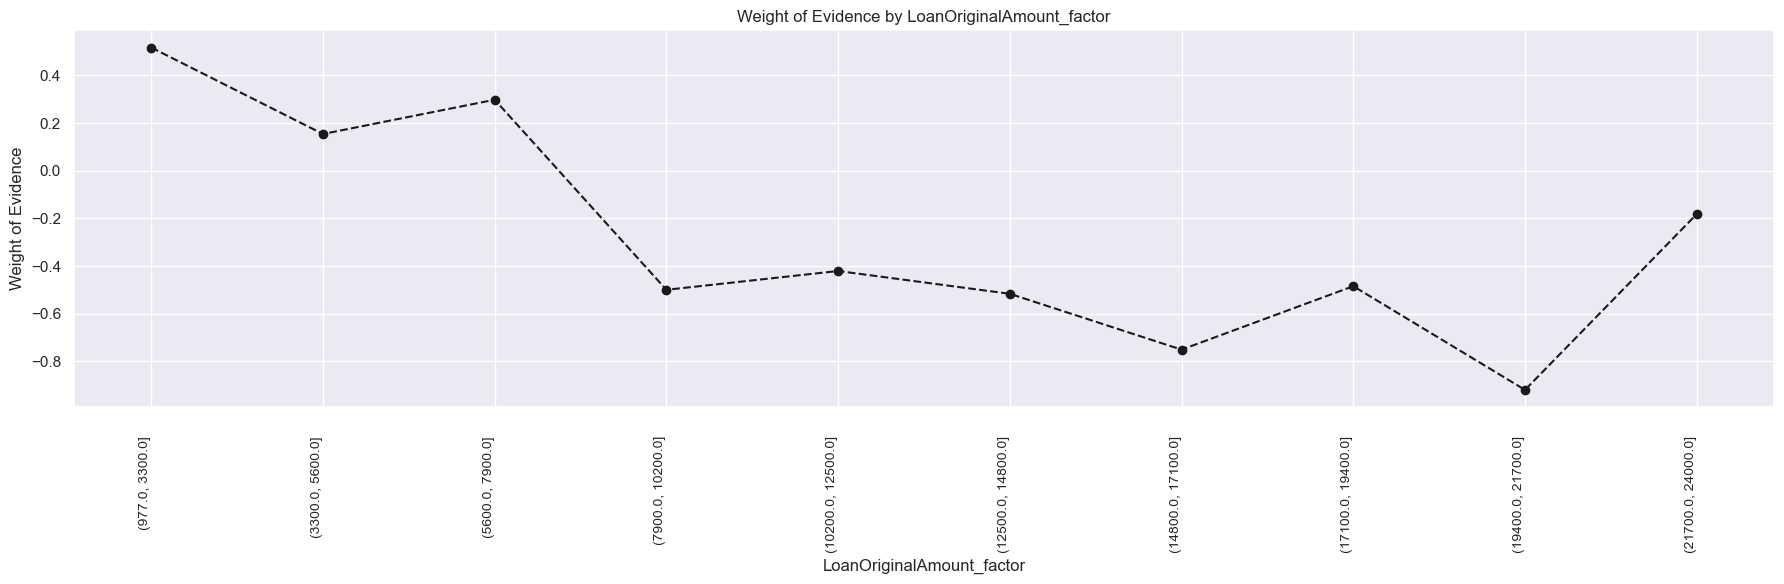

In [131]:
plot_by_woe(temp, 90)

In [132]:
temp = df_new[df_new['LoanOriginalAmount'] <= 9500]
temp['LoanOriginalAmount_factor'] = pd.cut(temp['LoanOriginalAmount'], 10)
temp = woe_continuous(temp, 'LoanOriginalAmount_factor', target)
temp

LoanOriginalAmount_factor  n_obs  prop_good  prop_n_obs  n_good    n_bad  \
0           (991.5, 1850.0]   4898   0.232136    0.075453  1137.0   3761.0   
1          (1850.0, 2700.0]   9596   0.159754    0.147824  1533.0   8063.0   
2          (2700.0, 3550.0]   8604   0.175151    0.132543  1507.0   7097.0   
3          (3550.0, 4400.0]  15103   0.107727    0.232658  1627.0  13476.0   
4          (4400.0, 5250.0]   8395   0.170816    0.129323  1434.0   6961.0   
5          (5250.0, 6100.0]   4213   0.138381    0.064900   583.0   3630.0   
6          (6100.0, 6950.0]   1718   0.125146    0.026465   215.0   1503.0   
7          (6950.0, 7800.0]   6191   0.169278    0.095371  1048.0   5143.0   
8          (7800.0, 8650.0]   3625   0.091034    0.055842   330.0   3295.0   
9          (8650.0, 9500.0]   2572   0.100700    0.039621   259.0   2313.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0     0.117544    0.068082  0.546093             NaN       NaN  0.089887  
1     0.158482    0.145958  0.082326        0.072382  0.463767  0.089887  
2     0.155794    0.128471  0.192834        0.015397  0.110508  0.089887  
3     0.168200    0.243945 -0.371787        0.067424  0.564621  0.089887  
4     0.148248    0.126009  0.162530        0.063089  0.534317  0.089887  
5     0.060271    0.065711 -0.086416        0.032435  0.248945  0.089887  
6     0.022227    0.027208 -0.202195        0.013236  0.115780  0.089887  
7     0.108343    0.093099  0.151632        0.044132  0.353827  0.089887  
8     0.034116    0.059647 -0.558684        0.078244  0.710316  0.089887  
9     0.026776    0.041870 -0.447088        0.009665  0.111596  0.089887

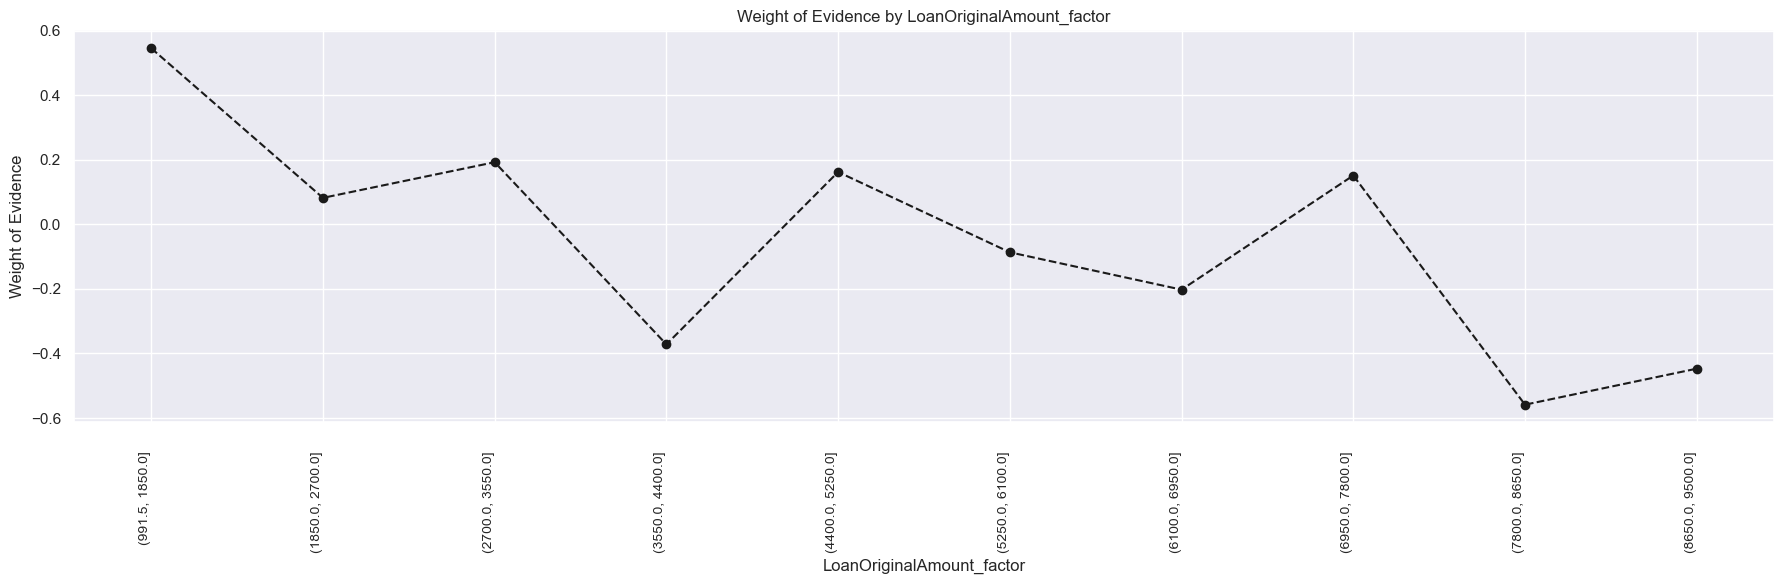

In [133]:
plot_by_woe(temp, 90)

In [134]:
def convert(x):
    if x <= 2000:
        return "<2k"
    elif x <= 3000:
        return "2k_3k"
    elif x <= 3500:
        return "3k_3.5k"
    elif x <= 4000:
        return "3.5k_4K"
    elif x <=5000:
        return "4k_5k"
    elif x <= 7500:
        return "5k_7.5k"
    elif x <= 9500:
        return "7.5k_9.5k"
    elif x <= 14500:
        return "9.5k_14.5k"
    elif x <= 19500:
        return "14.5k_19.5k"
    elif x <= 25000:
        return "19.5k_24.5k"
    else:
        return "25.5k<"

In [135]:
df_new['LoanOriginalAmount_factor'] = dfreg['LoanOriginalAmount'].map(lambda x : convert(x))
df_new['LoanOriginalAmount_factor'].value_counts()

LoanOriginalAmount_factor
9.5k_14.5k     18466
3.5k_4K        14760
14.5k_19.5k    14584
5k_7.5k        12186
<2k            10647
2k_3k           9263
4k_5k           8558
19.5k_24.5k     8343
7.5k_9.5k       6338
3k_3.5k         3163
Name: count, dtype: int64

#### **LoanCurrentDaysDelinquent**

In [136]:
temp = df_new[df_new['LoanCurrentDaysDelinquent'] < 50]
temp['LoanCurrentDaysDelinquent_factor'] = pd.cut(temp['LoanCurrentDaysDelinquent'], 10)
temp = woe_continuous(temp, 'LoanCurrentDaysDelinquent_factor', target)
temp

LoanCurrentDaysDelinquent_factor  n_obs  prop_good  prop_n_obs  n_good  \
0                    (-0.049, 4.9]  90542        0.0    0.988137     0.0   
1                       (4.9, 9.8]    192        0.0    0.002095     0.0   
2                      (9.8, 14.7]    373        0.0    0.004071     0.0   
3                     (14.7, 19.6]    108        0.0    0.001179     0.0   
4                     (19.6, 24.5]     99        0.0    0.001080     0.0   
5                     (24.5, 29.4]     68        0.0    0.000742     0.0   
6                     (29.4, 34.3]     54        0.0    0.000589     0.0   
7                     (34.3, 39.2]     57        0.0    0.000622     0.0   
8                     (39.2, 44.1]     85        0.0    0.000928     0.0   
9                     (44.1, 49.0]     51        0.0    0.000557     0.0   

     n_bad  prop_n_good  prop_n_bad  WoE  diff_prop_good  diff_WoE   IV  
0  90542.0          NaN    0.988137  NaN             NaN       NaN  0.0  
1    192.0          NaN    0.002095  NaN             0.0       NaN  0.0  
2    373.0          NaN    0.004071  NaN             0.0       NaN  0.0  
3    108.0          NaN    0.001179  NaN             0.0       NaN  0.0  
4     99.0          NaN    0.001080  NaN             0.0       NaN  0.0  
5     68.0          NaN    0.000742  NaN             0.0       NaN  0.0  
6     54.0          NaN    0.000589  NaN             0.0       NaN  0.0  
7     57.0          NaN    0.000622  NaN             0.0       NaN  0.0  
8     85.0          NaN    0.000928  NaN             0.0       NaN  0.0  
9     51.0          NaN    0.000557  NaN             0.0       NaN  0.0

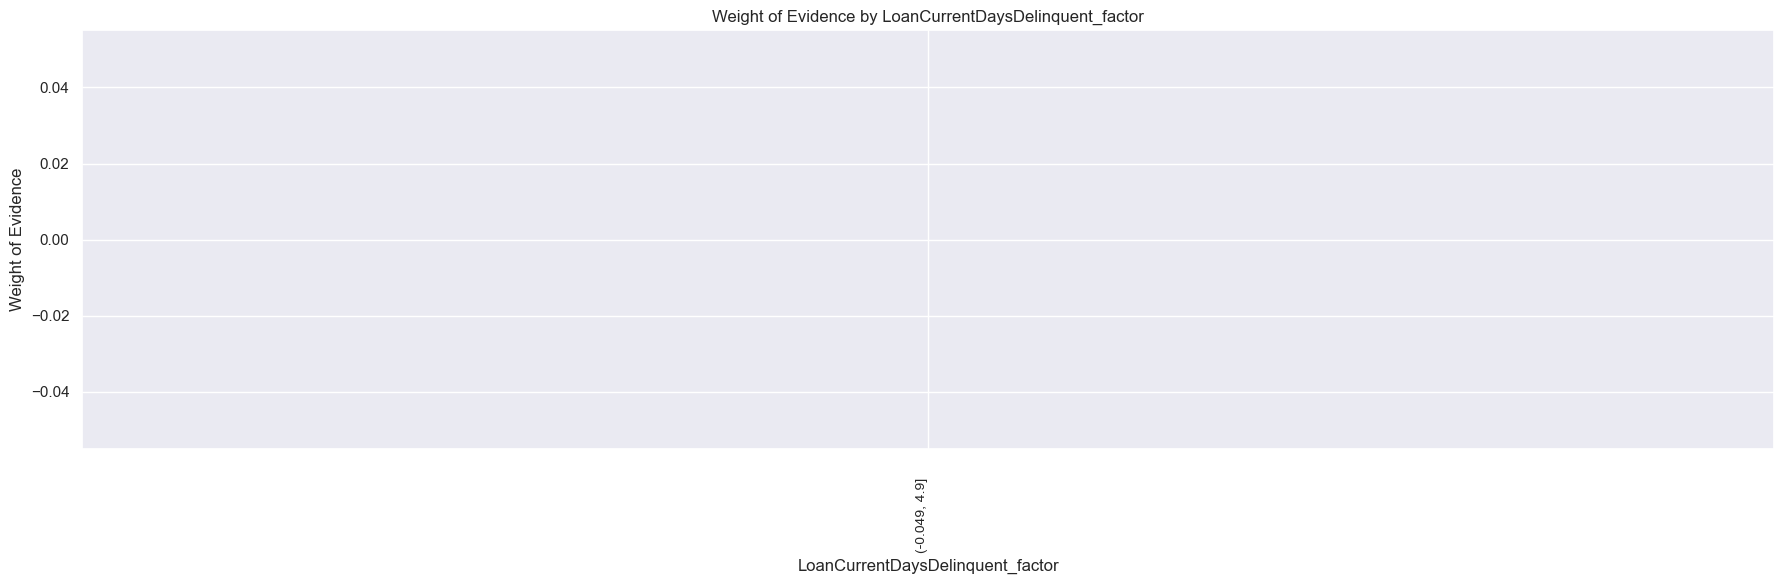

In [137]:
plot_by_woe(temp, 90)

In [138]:
def convert(x):
    if x == 0:
        return "=0"
    elif x < 50:
        return "<50"
    else:
        return "50<"

In [139]:
df_new['LoanCurrentDaysDelinquent_factor'] = df_new['LoanCurrentDaysDelinquent'].map(lambda x : convert(x))
df_new['LoanCurrentDaysDelinquent_factor'].value_counts()

LoanCurrentDaysDelinquent_factor
=0     90318
50<    14679
<50     1311
Name: count, dtype: int64

#### **MonthlyLoanPayment**

In [140]:
df_new['MonthlyLoanPayment_factor'] = pd.cut(df_new['MonthlyLoanPayment'], 10)
temp = woe_continuous(df_new, 'MonthlyLoanPayment_factor', target)
temp

MonthlyLoanPayment_factor  n_obs  prop_good  prop_n_obs  n_good    n_bad  \
0          (-0.736, 73.584]   8029   0.167020    0.075526  1341.0   6688.0   
1         (73.584, 147.168]  20603   0.151095    0.193805  3113.0  17490.0   
2        (147.168, 220.752]  23089   0.134826    0.217190  3113.0  19976.0   
3        (220.752, 294.336]  13064   0.103261    0.122888  1349.0  11715.0   
4         (294.336, 367.92]  13285   0.097779    0.124967  1299.0  11986.0   
5         (367.92, 441.504]   9610   0.068678    0.090398   660.0   8950.0   
6        (441.504, 515.088]   5844   0.065708    0.054972   384.0   5460.0   
7        (515.088, 588.672]   5469   0.073688    0.051445   403.0   5066.0   
8        (588.672, 662.256]   2847   0.064981    0.026781   185.0   2662.0   
9         (662.256, 735.84]   4468   0.146374    0.042029   654.0   3814.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0     0.107271    0.071295  0.408532             NaN       NaN  0.111655  
1     0.249020    0.186447  0.289388        0.015925  0.119143  0.111655  
2     0.249020    0.212948  0.156486        0.016268  0.132902  0.111655  
3     0.107911    0.124884 -0.146076        0.031565  0.302562  0.111655  
4     0.103912    0.127773 -0.206714        0.005481  0.060638  0.111655  
5     0.052796    0.095409 -0.591738        0.029101  0.385024  0.111655  
6     0.030718    0.058205 -0.639131        0.002970  0.047393  0.111655  
7     0.032237    0.054004 -0.515939        0.007980  0.123191  0.111655  
8     0.014799    0.028377 -0.651046        0.008707  0.135107  0.111655  
9     0.052316    0.040658  0.252104        0.081394  0.903151  0.111655

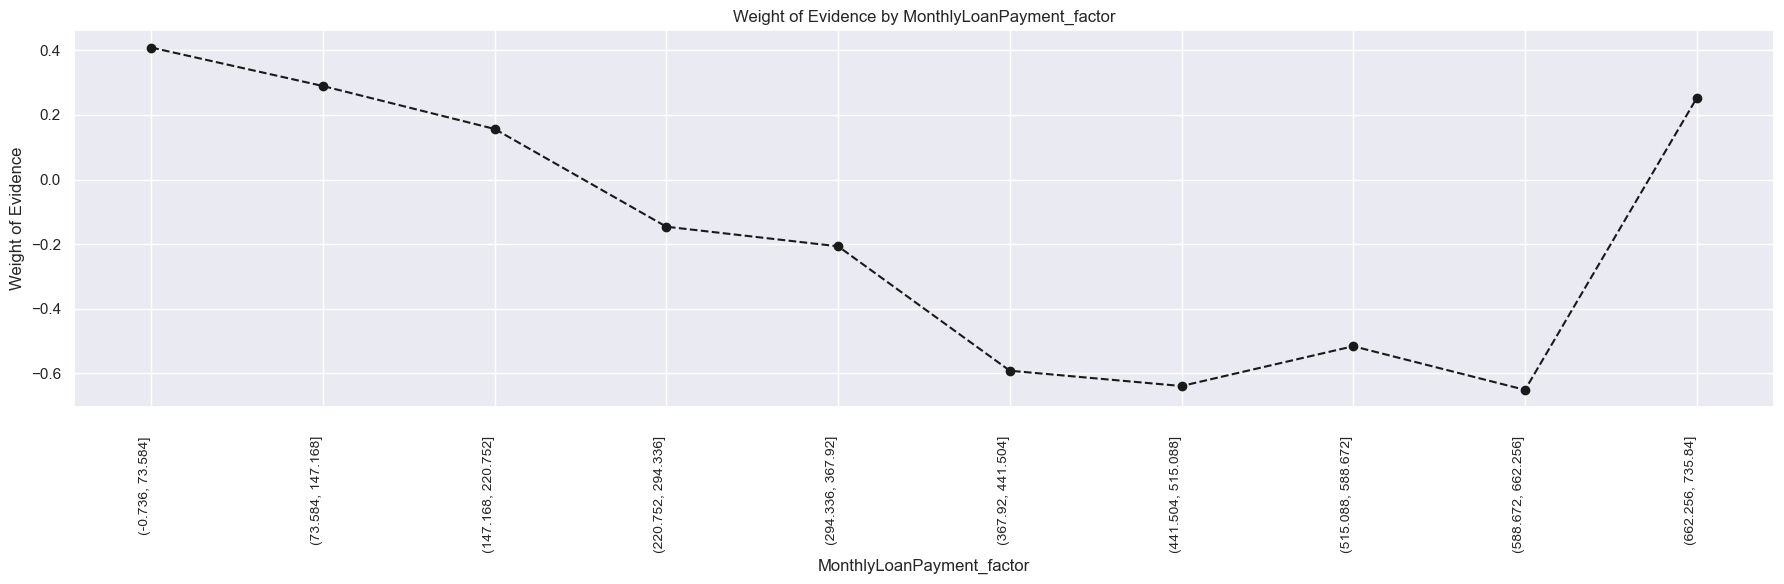

In [141]:
plot_by_woe(temp, 90)

In [142]:
temp = df_new[df_new['MonthlyLoanPayment'] > 90]
temp['MonthlyLoanPayment_factor'] = pd.cut(temp['MonthlyLoanPayment'], 10)
temp = woe_continuous(temp, 'MonthlyLoanPayment_factor', target)
temp

MonthlyLoanPayment_factor  n_obs  prop_good  prop_n_obs  n_good    n_bad  \
0         (89.364, 154.593]  17865   0.146040    0.190784  2609.0  15256.0   
1        (154.593, 219.176]  20933   0.137391    0.223548  2876.0  18057.0   
2        (219.176, 283.759]  11614   0.105476    0.124028  1225.0  10389.0   
3        (283.759, 348.342]  11454   0.104330    0.122320  1195.0  10259.0   
4        (348.342, 412.925]  10725   0.067692    0.114534   726.0   9999.0   
5        (412.925, 477.508]   5094   0.079309    0.054400   404.0   4690.0   
6        (477.508, 542.091]   5465   0.057823    0.058362   316.0   5149.0   
7        (542.091, 606.674]   3917   0.083227    0.041830   326.0   3591.0   
8        (606.674, 671.257]   2396   0.055092    0.025587   132.0   2264.0   
9         (671.257, 735.84]   4177   0.152741    0.044607   638.0   3539.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0     0.249737    0.183381  0.308842             NaN       NaN  0.114359  
1     0.275294    0.217050  0.237715        0.008649  0.071127  0.114359  
2     0.117259    0.124878 -0.062958        0.031915  0.300674  0.114359  
3     0.114387    0.123316 -0.075161        0.001146  0.012202  0.114359  
4     0.069494    0.120190 -0.547842        0.036638  0.472681  0.114359  
5     0.038671    0.056375 -0.376925        0.011617  0.170917  0.114359  
6     0.030248    0.061892 -0.715967        0.021486  0.339043  0.114359  
7     0.031205    0.043165 -0.324440        0.025404  0.391527  0.114359  
8     0.012635    0.027214 -0.767238        0.028135  0.442798  0.114359  
9     0.061070    0.042540  0.361587        0.097649  1.128825  0.114359

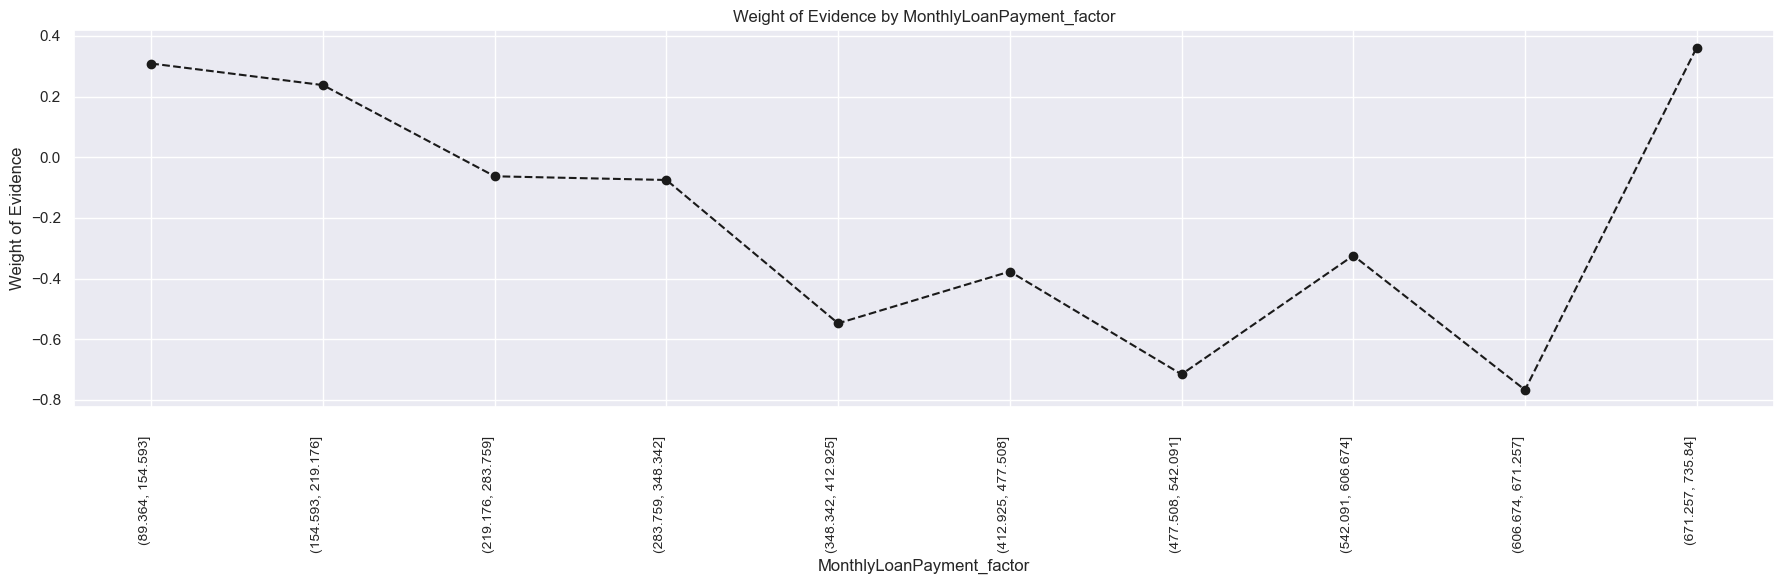

In [143]:
plot_by_woe(temp, 90)

In [144]:
def convert(x):
    if x <= 90:
        return "<90"
    elif x <= 225:
        return "90_225"
    elif x <= 360:
        return "225_360"
    elif x <= 600:
        return "360_600"
    elif x <= 750:
        return "600_750"
    else:
        return "750<"

In [145]:
df_new['MonthlyLoanPayment_factor'] = df_new['MonthlyLoanPayment'].map(lambda x : convert(x))
df_new['MonthlyLoanPayment_factor'].value_counts()

MonthlyLoanPayment_factor
90_225     39741
225_360    24306
360_600    22787
<90        12668
600_750     6806
Name: count, dtype: int64

## Analysis of Categorical Attributes

In [146]:
# WoE function for discrete unordered variables
def woe_discrete(dfreg, discrete_variabe_name, good_bad_variable_df):
    dfreg = pd.concat([dfreg[discrete_variabe_name], good_bad_variable_df], axis = 1)
    dfreg = pd.concat([dfreg.groupby(dfreg.columns.values[0], as_index = False)[dfreg.columns.values[1]].count(),
                    dfreg.groupby(dfreg.columns.values[0], as_index = False)[dfreg.columns.values[1]].mean()], axis = 1)
    dfreg = dfreg.iloc[:, [0, 1, 3]]
    dfreg.columns = [dfreg.columns.values[0], 'n_obs', 'prop_good']
    dfreg['prop_n_obs'] = dfreg['n_obs'] / dfreg['n_obs'].sum()
    dfreg['n_good'] = dfreg['prop_good'] * dfreg['n_obs']
    dfreg['n_bad'] = (1 - dfreg['prop_good']) * dfreg['n_obs']
    dfreg['prop_n_good'] = dfreg['n_good'] / dfreg['n_good'].sum()
    dfreg['prop_n_bad'] = dfreg['n_bad'] / dfreg['n_bad'].sum()
    dfreg['WoE'] = np.log(dfreg['prop_n_good'] / dfreg['prop_n_bad'])
    dfreg = dfreg.sort_values(['WoE'])
    dfreg = dfreg.reset_index(drop = True)
    dfreg['diff_prop_good'] = dfreg['prop_good'].diff().abs()
    dfreg['diff_WoE'] = dfreg['WoE'].diff().abs()
    dfreg['IV'] = (dfreg['prop_n_good'] - dfreg['prop_n_bad']) * dfreg['WoE']
    dfreg['IV'] = dfreg['IV'].sum()
    return dfreg

In [147]:
df_new = df_new[['LP_CustomerPrincipalPayments_factor', 'ProsperRating_factor',
       'LoanOriginalAmount_factor', 'LoanCurrentDaysDelinquent_factor',
       'MonthlyLoanPayment_factor']]
df_new.columns

Index(['LP_CustomerPrincipalPayments_factor', 'ProsperRating_factor',
       'LoanOriginalAmount_factor', 'LoanCurrentDaysDelinquent_factor',
       'MonthlyLoanPayment_factor'],
      dtype='object')

#### **LP_CustomerPrincipalPayments_factor**

In [148]:
temp = woe_discrete(df_new, 'LP_CustomerPrincipalPayments_factor', target)
temp.sort_values(by = 'LP_CustomerPrincipalPayments_factor', inplace=True)
temp

LP_CustomerPrincipalPayments_factor  n_obs  prop_good  prop_n_obs  n_good  \
1                               1k_2k  18255   0.134484    0.171718  2455.0   
3                              200_1k  27862   0.164561    0.262088  4585.0   
0                            2k_10.5k  46677   0.071384    0.439073  3332.0   
2                                <200  13514   0.157540    0.127121  2129.0   

     n_bad  prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE  \
1  15800.0     0.196384    0.168431  0.153548        0.063100  0.703735   
3  23277.0     0.366771    0.248137  0.390755        0.007021  0.051969   
0  43345.0     0.266539    0.462066 -0.550188             NaN       NaN   
2  11385.0     0.170306    0.121366  0.338787        0.023057  0.185239   

         IV  
1  0.174806  
3  0.174806  
0  0.174806  
2  0.174806

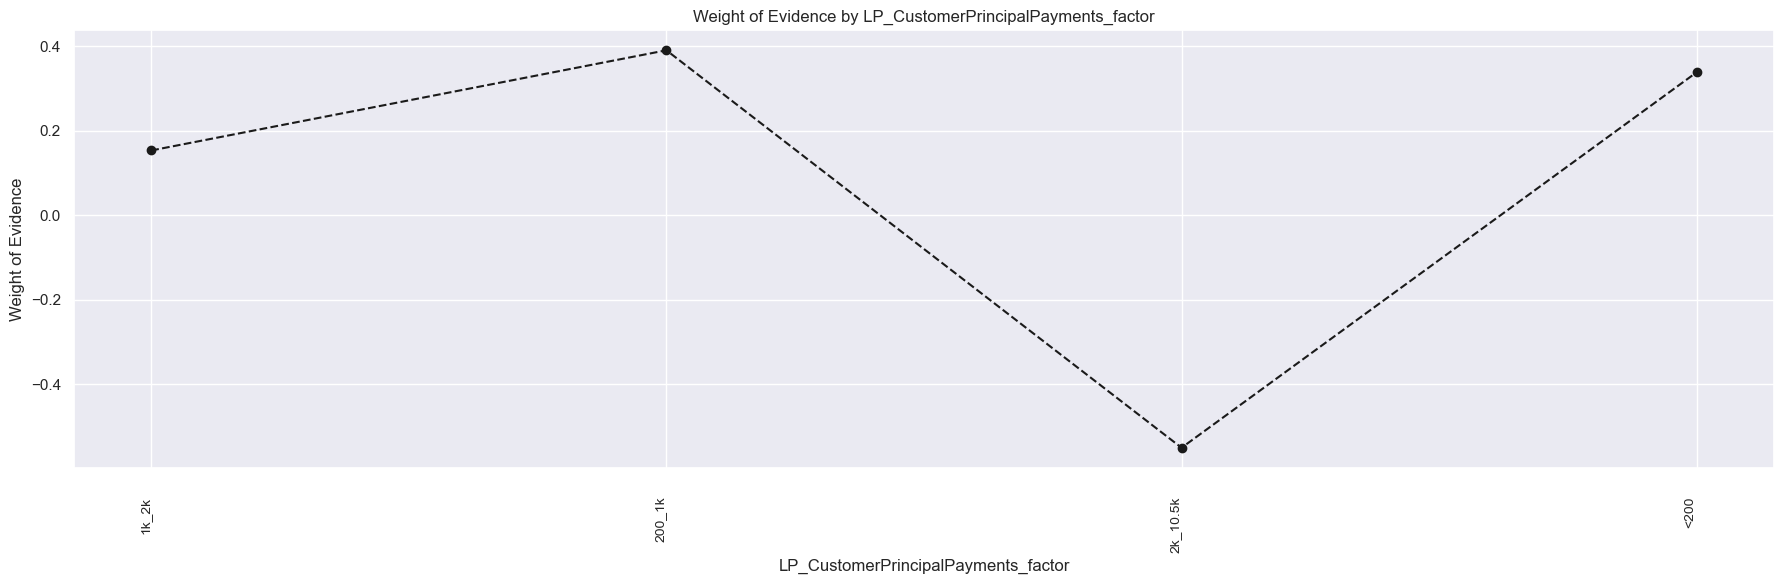

In [149]:
plot_by_woe(temp, 90)

#### **ProsperRating_factor**

In [150]:
temp = woe_discrete(df_new, 'ProsperRating_factor', target)
temp.sort_values(by = 'ProsperRating_factor', inplace=True)
temp

ProsperRating_factor  n_obs  prop_good  prop_n_obs  n_good    n_bad  \
1                    0  14551   0.023572    0.136876   343.0  14208.0   
0                    1   5372   0.012472    0.050532    67.0   5305.0   
2                    2  15581   0.030743    0.146565   479.0  15102.0   
6                    3  39800   0.197085    0.374384  7844.0  31956.0   
3                    4  14274   0.100112    0.134270  1429.0  12845.0   
4                    5   9795   0.115671    0.092138  1133.0   8662.0   
5                    6   6935   0.173901    0.065235  1206.0   5729.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
1     0.027438    0.151460 -1.708399        0.011100  0.647882  0.704087  
0     0.005360    0.056552 -2.356282             NaN       NaN  0.704087  
2     0.038317    0.160990 -1.435451        0.007170  0.272948  0.704087  
6     0.627470    0.340657  0.610820        0.023185  0.153621  0.704087  
3     0.114311    0.136930 -0.180549        0.069370  1.254902  0.704087  
4     0.090633    0.092339 -0.018646        0.015559  0.161903  0.704087  
5     0.096472    0.061072  0.457199        0.058229  0.475845  0.704087

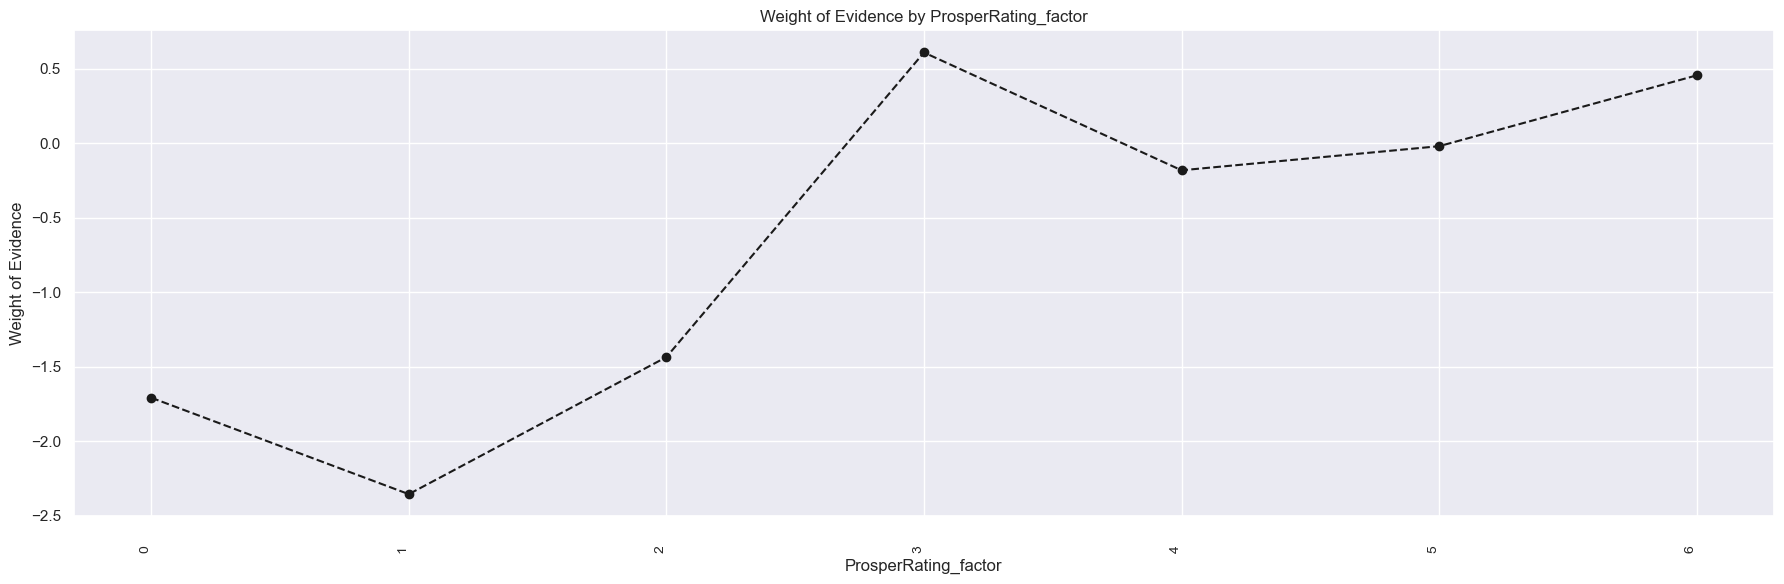

In [151]:
plot_by_woe(temp, 90)

#### **LoanOriginalAmount_factor**

In [152]:
temp = woe_discrete(df_new, 'LoanOriginalAmount_factor', target)
temp.sort_values(by = 'LoanOriginalAmount_factor', inplace=True)
temp

LoanOriginalAmount_factor  n_obs  prop_good  prop_n_obs  n_good    n_bad  \
0               14.5k_19.5k  14584   0.061231    0.137186   893.0  13691.0   
2               19.5k_24.5k   8343   0.078269    0.078480   653.0   7690.0   
7                     2k_3k   9263   0.180179    0.087134  1669.0   7594.0   
4                   3.5k_4K  14760   0.106775    0.138842  1576.0  13184.0   
9                   3k_3.5k   3163   0.183686    0.029753   581.0   2582.0   
6                     4k_5k   8558   0.169549    0.080502  1451.0   7107.0   
5                   5k_7.5k  12186   0.153373    0.114629  1869.0  10317.0   
3                 7.5k_9.5k   6338   0.095298    0.059619   604.0   5734.0   
1                9.5k_14.5k  18466   0.069425    0.173703  1282.0  17184.0   
8                       <2k  10647   0.180614    0.100152  1923.0   8724.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE       IV  
0     0.071434    0.145949 -0.714477             NaN       NaN  0.21417  
2     0.052236    0.081977 -0.450668        0.008844  0.129458  0.21417  
7     0.133509    0.080953  0.500297        0.010630  0.073693  0.21417  
4     0.126070    0.140544 -0.108683        0.011477  0.126480  0.21417  
9     0.046476    0.027525  0.523862        0.003072  0.020623  0.21417  
6     0.116071    0.075762  0.426604        0.016176  0.119562  0.21417  
5     0.149508    0.109981  0.307041        0.046598  0.415724  0.21417  
3     0.048316    0.061126 -0.235164        0.017029  0.215504  0.21417  
1     0.102552    0.183185 -0.580127        0.008193  0.134350  0.21417  
8     0.153828    0.092999  0.503239        0.000435  0.002942  0.21417

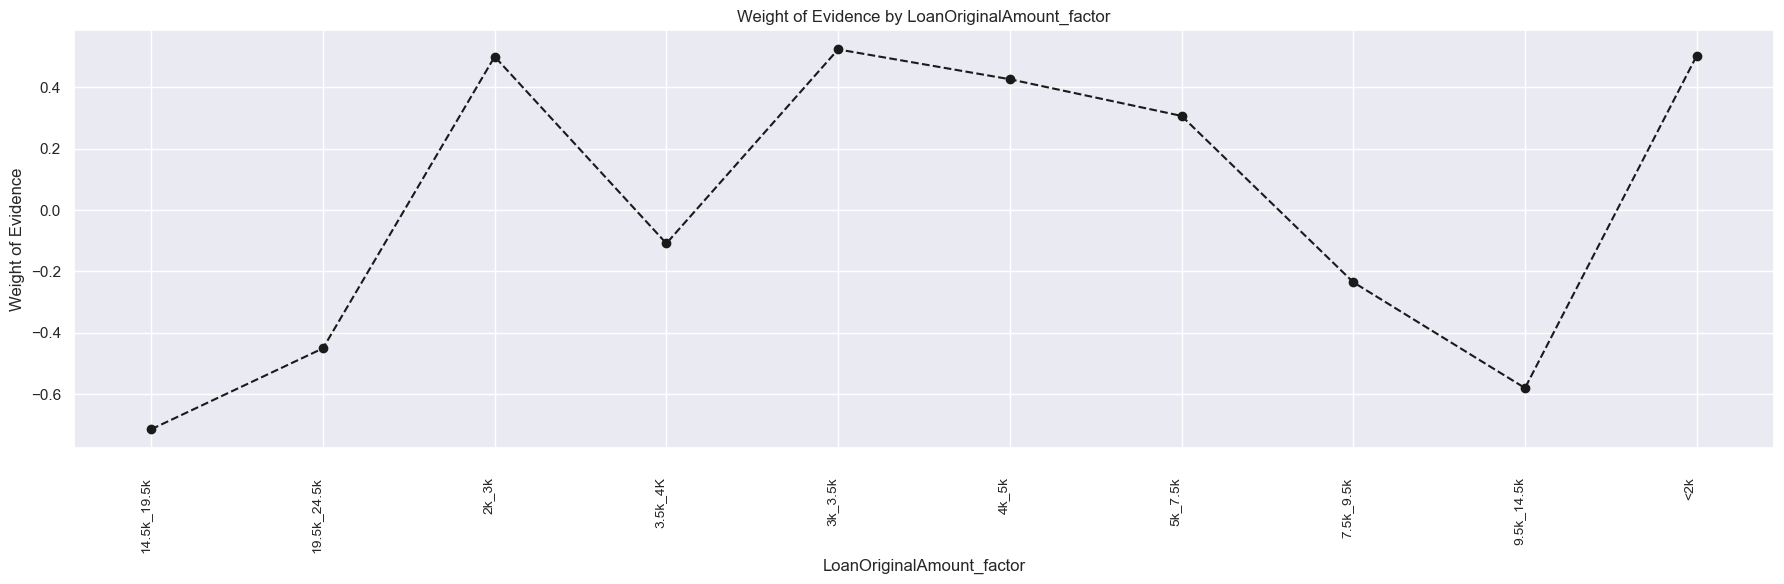

In [153]:
plot_by_woe(temp, 90)

#### **LoanCurrentDaysDelinquent_factor**

In [154]:
temp = woe_discrete(df_new, 'LoanCurrentDaysDelinquent_factor', target)
temp.sort_values(by = 'LoanCurrentDaysDelinquent_factor', inplace=True)
temp

LoanCurrentDaysDelinquent_factor  n_obs  prop_good  prop_n_obs   n_good  \
2                              50<  14679   0.851625    0.138080  12501.0   
0                              <50   1311   0.000000    0.012332      0.0   
1                               =0  90318   0.000000    0.849588      0.0   

     n_bad  prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
2   2178.0          1.0    0.023218  3.762832        0.851625       inf  inf  
0   1311.0          0.0    0.013976      -inf             NaN       NaN  inf  
1  90318.0          0.0    0.962807      -inf        0.000000       NaN  inf

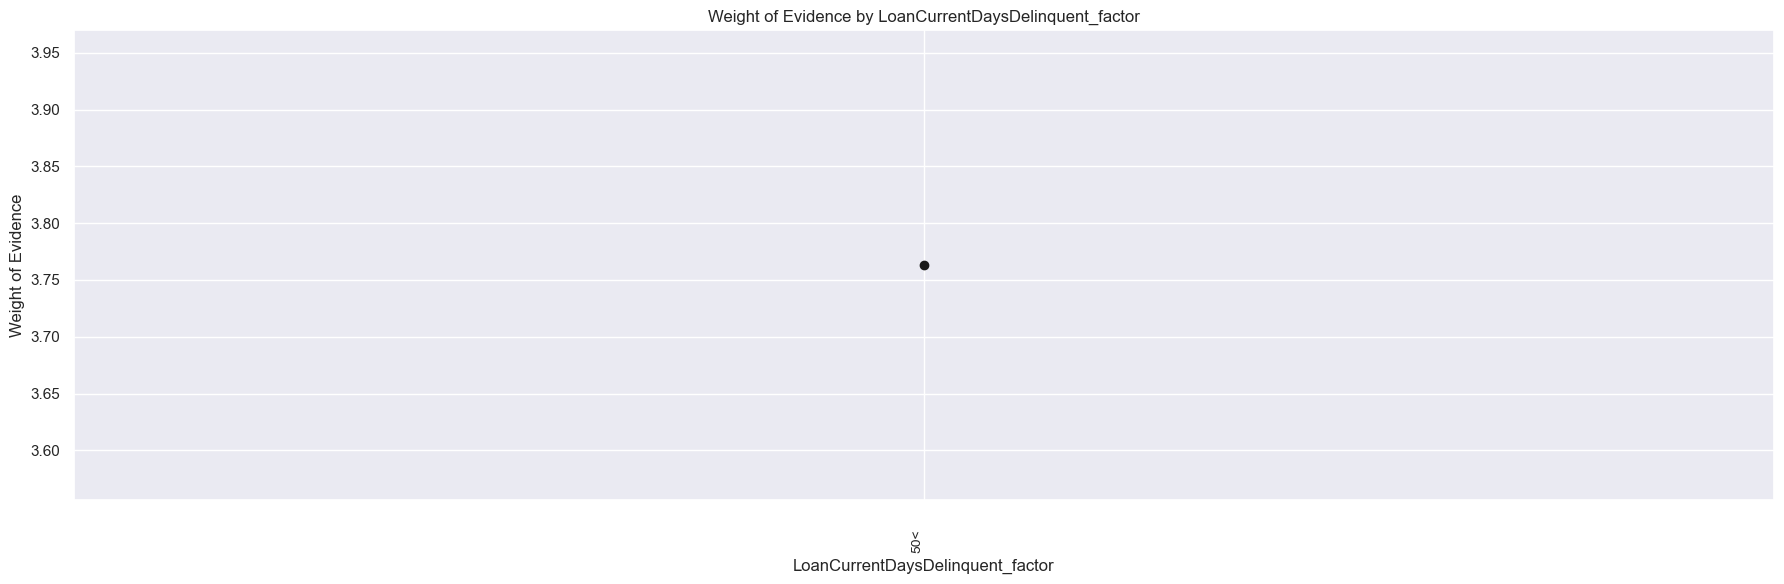

In [155]:
plot_by_woe(temp, 90)

#### **MonthlyLoanPayment_factor**

In [156]:
temp = woe_discrete(df_new, 'MonthlyLoanPayment_factor', target)
temp.sort_values(by = 'MonthlyLoanPayment_factor', inplace=True)
temp

MonthlyLoanPayment_factor  n_obs  prop_good  prop_n_obs  n_good    n_bad  \
1                   225_360  24306   0.100757    0.228638  2449.0  21857.0   
0                   360_600  22787   0.070303    0.214349  1602.0  21185.0   
2                   600_750   6806   0.116956    0.064022   796.0   6010.0   
3                    90_225  39741   0.140912    0.373829  5600.0  34141.0   
4                       <90  12668   0.162141    0.119163  2054.0  10614.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE       IV  
1     0.195904    0.233000 -0.173411        0.030454  0.393199  0.09832  
0     0.128150    0.225836 -0.566610             NaN       NaN  0.09832  
2     0.063675    0.064068 -0.006150        0.016199  0.167261  0.09832  
3     0.447964    0.363949  0.207698        0.023957  0.213848  0.09832  
4     0.164307    0.113147  0.373046        0.021228  0.165348  0.09832

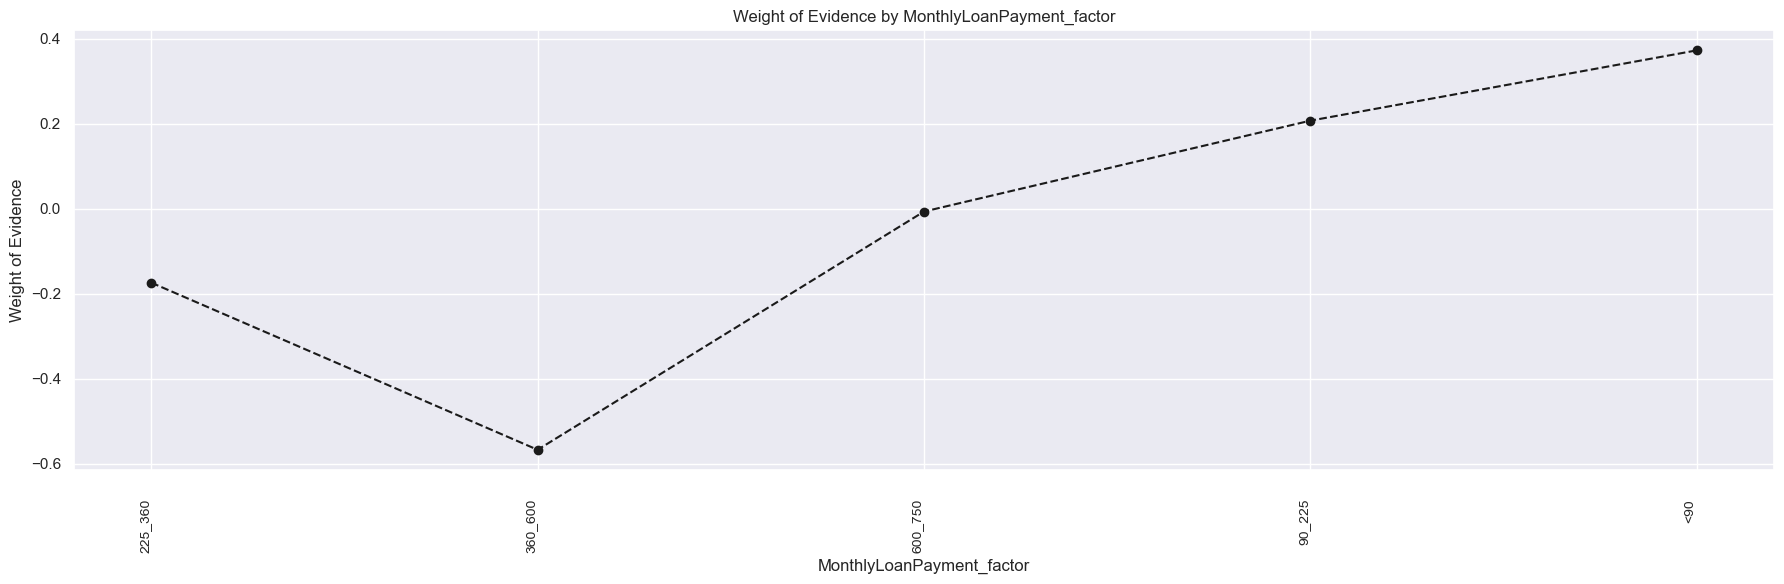

In [157]:
plot_by_woe(temp, 90)

## PreferredROI

In [158]:
def PROI(dfreg):
    # Calculate ROI
    dfreg['InterestAmount'] = (dfreg['LoanOriginalAmount']*(dfreg['BorrowerRate']))
    dfreg['TotalAmount'] = (dfreg['InterestAmount'] + dfreg['LoanOriginalAmount'])
    dfreg['ROI'] = (dfreg['InterestAmount'] / dfreg['TotalAmount'])
    print(dfreg['ROI'].describe())

    # Setting PROI
    dfreg['PROI'] = dfreg['ROI'].median()

    for i in range(dfreg.shape[0]):
        # Check out LP_CustomerPrinciplePayment
        if dfreg['LP_CustomerPrincipalPayments'].iloc[i] <= 1000:
            dfreg['PROI'].iloc[i] = dfreg['PROI'].iloc[i] + 0.05
        elif (dfreg['LP_CustomerPrincipalPayments'].iloc[i] > 2000) & (dfreg['LP_CustomerPrincipalPayments'].iloc[i] <= 10500):
            dfreg['PROI'].iloc[i] = dfreg['PROI'].iloc[i] - 0.05
        elif (dfreg['LP_CustomerPrincipalPayments'].iloc[i] > 10500):
            dfreg['PROI'].iloc[i] = dfreg['PROI'].iloc[i] - 0.1

        # Check out ProsperRating
        if dfreg['ProsperRating (Alpha)'].iloc[i] in [2, 3]:
            dfreg['PROI'].iloc[i] = dfreg['PROI'].iloc[i] + 0.05
        elif dfreg['ProsperRating (Alpha)'].iloc[i] == 6:
            dfreg['PROI'].iloc[i] = dfreg['PROI'].iloc[i] - 0.05

        # Check out LoanOriginalAmount
        if dfreg['LoanOriginalAmount'].iloc[i] <= 2000:
            dfreg['PROI'].iloc[i] = dfreg['PROI'].iloc[i] - 0.05
        elif (dfreg['LoanOriginalAmount'].iloc[i] > 19500) & (dfreg['LoanOriginalAmount'].iloc[i] <= 25500):
            dfreg['PROI'].iloc[i] = dfreg['PROI'].iloc[i] + 0.05
        elif dfreg['LoanOriginalAmount'].iloc[i] > 25500:
            dfreg['PROI'].iloc[i] = dfreg['PROI'].iloc[i] + 0.1

        # Check out LoanCurrentDaysDelinquent
        if (dfreg['LoanCurrentDaysDelinquent'].iloc[i] >= 50):
            dfreg['PROI'].iloc[i] = dfreg['PROI'].iloc[i] + 0.05

        # Check out MonthlyLoanPayment
        if (dfreg['MonthlyLoanPayment'].iloc[i] <= 90):
            dfreg['PROI'].iloc[i] = dfreg['PROI'].iloc[i] - 0.05
        elif (dfreg['MonthlyLoanPayment'].iloc[i] <= 750) & (dfreg['MonthlyLoanPayment'].iloc[i] > 360):
            dfreg['PROI'].iloc[i] = dfreg['PROI'].iloc[i] + 0.05

    print(dfreg['ROI'].describe())

    return dfreg['PROI']

In [159]:
dfreg['PROI'] = PROI(dfreg)

count    106308.000000
mean          0.158477
std           0.052405
min           0.000100
25%           0.117699
50%           0.155049
75%           0.200703
max           0.264706
Name: ROI, dtype: float64
count    106308.000000
mean          0.158477
std           0.052405
min           0.000100
25%           0.117699
50%           0.155049
75%           0.200703
max           0.264706
Name: ROI, dtype: float64


In [160]:
dfreg.columns

Index(['ListingKey', 'ListingNumber', 'CreditGrade', 'LoanTenure',
       'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield',
       'EstimatedLoss', 'EstimatedReturn', 'ProsperRating (numeric)',
       'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)',
       'BorrowerState', 'Occupation', 'EmploymentStatus',
       'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'CurrentlyInGroup',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'CurrentCreditLines', 'OpenCreditLines', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'AmountDelinquent', 'DelinquenciesLast7Years', 'RevolvingCreditBalance',
       'BankcardUtilization', 'AvailableBankcardCredit', 'TotalTrades',
       'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months',
       'DebtToIncomeRatio', 'IncomeRange', 'IncomeVerifiable',
       'StatedMonthlyIncome', 'LoanCurrentDaysDelinqu

## Model Building for the three target variables

In [161]:
X = dfreg.drop(['LoanTenure', 'EMI', 'ELA'], axis=1)
y_lt = dfreg['LoanTenure']
y_emi = dfreg['EMI']
y_ela = dfreg['ELA']

In [162]:
from sklearn.model_selection import train_test_split
X_train_lt, X_test_lt, y_train_lt, y_test_lt = train_test_split(X, y_lt, test_size=0.2, random_state=42)
X_train_emi, X_test_emi, y_train_emi, y_test_emi = train_test_split(X, y_emi, test_size=0.2, random_state=42)
X_train_ela, X_test_ela, y_train_ela, y_test_ela = train_test_split(X, y_ela, test_size=0.2, random_state=42)

In [163]:
from sklearn.metrics import mean_squared_error, r2_score
def train_evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

### 1. Linear Regression

In [164]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
# LoanTenure
mse_lt_1, r2_lt_1 = train_evaluate(lr, X_train_lt, X_test_lt, y_train_lt, y_test_lt)
#EMI
mse_emi_1, r2_emi_1 = train_evaluate(lr, X_train_emi, X_test_emi, y_train_emi, y_test_emi)
#ELA
mse_ela_1, r2_ela_1 = train_evaluate(lr, X_train_ela, X_test_ela, y_train_ela, y_test_ela)

### 2. Lasso Regression

In [165]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 1.0)
# LoanTenure
mse_lt_2, r2_lt_2 = train_evaluate(lasso, X_train_lt, X_test_lt, y_train_lt, y_test_lt)
#EMI
mse_emi_2, r2_emi_2 = train_evaluate(lasso, X_train_emi, X_test_emi, y_train_emi, y_test_emi)
#ELA
mse_ela_2, r2_ela_2 = train_evaluate(lasso, X_train_ela, X_test_ela, y_train_ela, y_test_ela)

### 3. Ridge Regression

In [166]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha= 1.0)
mse_lt_3, r2_lt_3 = train_evaluate(ridge, X_train_lt, X_test_lt, y_train_lt, y_test_lt)
#EMI
mse_emi_3, r2_emi_3 = train_evaluate(ridge, X_train_emi, X_test_emi, y_train_emi, y_test_emi)
#ELA
mse_ela_3, r2_ela_3 = train_evaluate(ridge, X_train_ela, X_test_ela, y_train_ela, y_test_ela)

In [167]:
import math
#R_mse Values
#Linear Regression
R_lt1 = math.sqrt(mse_lt_1)
R_emi1 = math.sqrt(mse_emi_1)
R_ela1 = math.sqrt(mse_ela_1)
#Lasso Regression 
R_lt2 = math.sqrt(mse_lt_2)
R_emi2 = math.sqrt(mse_emi_2)
R_ela2 = math.sqrt(mse_ela_2)
#Ridge Regression
R_lt3 = math.sqrt(mse_lt_3)
R_emi3 = math.sqrt(mse_emi_3)
R_ela3 = math.sqrt(mse_ela_3)

In [168]:
results = [
    {'Model': 'Linear Regression', 'Target Variable': 'LoanTenure', 'RMSE': R_lt1, 'R2': r2_lt_1},
    {'Model': 'Linear Regression', 'Target Variable': 'EMI', 'RMSE': R_emi1, 'R2': r2_emi_1},
    {'Model': 'Linear Regression', 'Target Variable': 'ELA', 'RMSE': R_ela1, 'R2': r2_ela_1},
    {'Model': 'Lasso Regression', 'Target Variable': 'LoanTenure', 'RMSE': R_lt2, 'R2': r2_lt_2},
    {'Model': 'Lasso Regression', 'Target Variable': 'EMI', 'RMSE': R_emi2, 'R2': r2_emi_2},
    {'Model': 'Lasso Regression', 'Target Variable': 'ELA', 'RMSE': R_ela2, 'R2': r2_ela_2},
    {'Model': 'Ridge Regression', 'Target Variable': 'LoanTenure', 'RMSE': R_lt3, 'R2': r2_lt_3},
    {'Model': 'Ridge Regression', 'Target Variable': 'EMI', 'RMSE': R_emi3, 'R2': r2_emi_3},
    {'Model': 'Ridge Regression', 'Target Variable': 'ELA', 'RMSE': R_ela3, 'R2': r2_ela_3},
]

In [169]:
results = pd.DataFrame(results)

In [170]:
results

Model Target Variable          RMSE        R2
0  Linear Regression      LoanTenure      4.742087  0.804918
1  Linear Regression             EMI    147.745425  0.925904
2  Linear Regression             ELA  15996.703386  0.926250
3   Lasso Regression      LoanTenure      5.613015  0.726681
4   Lasso Regression             EMI    157.365993  0.915940
5   Lasso Regression             ELA  15997.554034  0.926242
6   Ridge Regression      LoanTenure      4.793496  0.800666
7   Ridge Regression             EMI    148.489202  0.925156
8   Ridge Regression             ELA  16000.234253  0.926218

In [171]:
from sklearn.model_selection import cross_val_score
imp_cols = X_train_lt.columns

In [172]:
# Linear Regression for LoanTenure
lr_lt = LinearRegression()
lr_lt.fit(X_train_lt, y_train_lt)
coeff_lt = pd.DataFrame({'Feature': imp_cols, 'Coefficient': lr_lt.coef_})
coeff_lt.sort_values(by='Coefficient', ascending=False, inplace=True)
print("Feature importance for LoanTenure (Linear Regression):")
print(coeff_lt)

Feature importance for LoanTenure (Linear Regression):
                               Feature   Coefficient
58                                 ROI  2.671411e+02
4                         BorrowerRate  1.620182e+02
5                          LenderYield  8.390786e+01
8                      EstimatedReturn  7.665343e+01
59                                PROI  1.775469e+01
34  TradesNeverDelinquent (percentage)  1.036014e+00
2                          CreditGrade  5.249608e-01
17                 IsBorrowerHomeowner  1.791791e-01
11                        ProsperScore  9.895386e-02
35             TradesOpenedLast6Months  6.685726e-02
23                     OpenCreditLines  4.100288e-02
12           ListingCategory (numeric)  3.519852e-02
37                         IncomeRange  3.171691e-02
31                 BankcardUtilization  2.446771e-02
27                      TotalInquiries  2.029774e-02
33                         TotalTrades  1.025719e-02
13                       BorrowerState  3.06

In [173]:
# Linear Regression for EMI
lr_emi = LinearRegression()
lr_emi.fit(X_train_emi, y_train_emi)
coeff_emi = pd.DataFrame({'Feature': imp_cols, 'Coefficient': lr_emi.coef_})
coeff_emi.sort_values(by='Coefficient', ascending=False, inplace=True)
print("Feature importance for EMI (Linear Regression):")
print(coeff_emi)

Feature importance for EMI (Linear Regression):
                               Feature   Coefficient
4                         BorrowerRate  7.703080e+03
3                          BorrowerAPR  4.264806e+03
8                      EstimatedReturn  2.553473e+03
7                        EstimatedLoss  8.333986e+02
9              ProsperRating (numeric)  7.944666e+01
10               ProsperRating (Alpha)  2.177228e+01
11                        ProsperScore  1.475869e+01
36                   DebtToIncomeRatio  1.256344e+01
34  TradesNeverDelinquent (percentage)  1.130680e+01
2                          CreditGrade  8.088775e+00
17                 IsBorrowerHomeowner  7.627554e+00
26                InquiriesLast6Months  5.414202e+00
41          LoanMonthsSinceOrigination  4.578433e+00
50                      LP_ServiceFees  1.658950e+00
22                  CurrentCreditLines  1.539869e+00
15                    EmploymentStatus  1.064062e+00
27                      TotalInquiries  7.094874e-0

In [174]:
# Linear Regression for ELA
lr_ela = LinearRegression()
lr_ela.fit(X_train_ela, y_train_ela)
coeff_ela = pd.DataFrame({'Feature': imp_cols, 'Coefficient': lr_ela.coef_})
coeff_ela.sort_values(by='Coefficient', ascending=False, inplace=True)
print("Feature importance for ELA (Linear Regression):")
print(coeff_ela)

Feature importance for ELA (Linear Regression):
                               Feature   Coefficient
8                      EstimatedReturn  1.368354e+05
5                          LenderYield  1.014457e+05
4                         BorrowerRate  9.786101e+04
58                                 ROI  3.909452e+04
59                                PROI  2.999331e+04
38                    IncomeVerifiable  1.281677e+04
36                   DebtToIncomeRatio  6.123340e+03
2                          CreditGrade  3.648297e+03
34  TradesNeverDelinquent (percentage)  2.611324e+03
15                    EmploymentStatus  6.553423e+02
37                         IncomeRange  2.940851e+02
24               OpenRevolvingAccounts  2.414769e+02
17                 IsBorrowerHomeowner  2.323863e+02
35             TradesOpenedLast6Months  1.430432e+02
56                      InterestAmount  3.476672e+01
57                         TotalAmount  2.049895e+01
29             DelinquenciesLast7Years  1.774789e+0

In [175]:
# Cross-Validation for Linear Regression on LoanTenure
cv_scores_lt = cross_val_score(lr_lt, X_train_lt, y_train_lt, cv=5, scoring='r2')
print(f"Cross-Validation R² Scores for LoanTenure (Linear Regression): {cv_scores_lt}")
print(f"Mean Cross-Validation R² Score for LoanTenure (Linear Regression): {cv_scores_lt.mean()}")

Cross-Validation R² Scores for LoanTenure (Linear Regression): [0.78808227 0.80266106 0.79677897 0.79702707 0.79222777]
Mean Cross-Validation R² Score for LoanTenure (Linear Regression): 0.7953554279532579


In [176]:
# Cross-Validation for Linear Regression on EMI
cv_scores_emi = cross_val_score(lr_emi, X_train_emi, y_train_emi, cv=5, scoring='r2')
print(f"Cross-Validation R² Scores for EMI (Linear Regression): {cv_scores_emi}")
print(f"Mean Cross-Validation R² Score for EMI (Linear Regression): {cv_scores_emi.mean()}")

Cross-Validation R² Scores for EMI (Linear Regression): [0.92395884 0.92683246 0.92638722 0.92466062 0.92319102]
Mean Cross-Validation R² Score for EMI (Linear Regression): 0.9250060329568107


In [177]:
# Cross-Validation for Linear Regression on ELA
cv_scores_ela = cross_val_score(lr_ela, X_train_ela, y_train_ela, cv=5, scoring='r2')
print(f"Cross-Validation R² Scores for ELA (Linear Regression): {cv_scores_ela}")
print(f"Mean Cross-Validation R² Score for ELA (Linear Regression): {cv_scores_ela.mean()}")

Cross-Validation R² Scores for ELA (Linear Regression): [0.9281865  0.93657764 0.92695647 0.93429285 0.92861042]
Mean Cross-Validation R² Score for ELA (Linear Regression): 0.930924778113749


## Model Performance Analysis - (Regression)

### Linear Regression
- *LoanTenure*:
  - *RMSE*: 4.742087
  - *R²*: 0.804918
  - *Cross-Validation R² Scores*: [0.78808227, 0.80266106, 0.79677897, 0.79702707, 0.79222777]
  - *Mean Cross-Validation R² Score*: 0.7953554279532579

- *EMI*:
  - *RMSE*: 147.745425
  - *R²*: 0.925904
  - *Cross-Validation R² Scores*: [0.92395884, 0.92683246, 0.92638722, 0.92466062, 0.92319102]
  - *Mean Cross-Validation R² Score*: 0.9250060329568107

- *ELA*:
  - *RMSE*: 15996.703386
  - *R²*: 0.926250
  - *Cross-Validation R² Scores*: [0.9281865, 0.93657764, 0.92695647, 0.93429285, 0.92861042]
  - *Mean Cross-Validation R² Score*: 0.930924778113749

### Lasso Regression
- *LoanTenure*:
  - *RMSE*: 5.613015
  - *R²*: 0.726681

- *EMI*:
  - *RMSE*: 157.365993
  - *R²*: 0.915940

- *ELA*:
  - *RMSE*: 15997.554034
  - *R²*: 0.926242

### Ridge Regression
- *LoanTenure*:
  - *RMSE*: 4.793496
  - *R²*: 0.800666

- *EMI*:
  - *RMSE*: 148.489202
  - *R²*: 0.925156

- *ELA*:
  - *RMSE*: 16000.234253
  - *R²*: 0.926218

### Summary
- *Linear Regression*:
  - Performs best overall with high R² values and lower RMSE across all target variables.
  - *LoanTenure* has a mean cross-validation R² score of 0.795, indicating good generalization.
  - *EMI* and *ELA* have very high R² values (0.925 and 0.926 respectively) with consistent cross-validation scores.

- *Lasso Regression*:
  - Generally has slightly higher RMSE and lower R² compared to Linear Regression.
  - Still performs reasonably well but is less accurate for *LoanTenure* with an R² of 0.726.

- *Ridge Regression*:
  - Similar performance to Linear Regression but with slightly higher RMSE and lower R² values.
  - Offers a balance between model simplicity and performance.

- **Overall, *Linear Regression* shows the best performance, especially for predicting *EMI* and *ELA*, with high R² scores and low RMSE, making it the preferred model for these targets.**

# **Pipeline** 


In this project, we use the scikit-learn `Pipeline` for integrating multiple stages of the machine learning workflow, including data preprocessing and model fittiny:

1. **Integration of Multiple Models:**
   - The project involves both classification (`Status` prediction) and regression tasks (`LoanTenure`, `EMI`, `ELA` predictions). The `Pipeline` allows us to seamlessly integrate these tasks into a single workflow.

2. **Consistent Data Transformation:**
   - By defining a `Pipeline`, we ensure that all data preprocessing steps, such as scaling and handling missing values, are applied consistently to both the training and testing datasets. This prevents data leakage and ensures robust model eval **consistency.

Overall, the `Pipeline` enhances efficiency, maintains data integrity throughout the workflow, and prepares the models for deployment in real-wor**ld applications.


In [183]:
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, mean_squared_error, r2_score
import joblib

In [184]:
features = dfreg.drop(columns=['Status', 'LoanTenure', 'EMI', 'ELA'])
Status = dfreg['Status']
LoanTenure = dfreg['LoanTenure']
EMI = dfreg['EMI']
ELA = dfreg['ELA']

In [185]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_class_train, y_class_test, y_reg1_train, y_reg1_test, y_reg2_train, y_reg2_test, y_reg3_train, y_reg3_test = train_test_split(
    features, Status, LoanTenure, EMI, ELA, test_size=0.2, random_state=42
)

In [186]:
class MultiRegressionPipeline:
    def __init__(self, clf, reg1, reg2, reg3):
        self.clf = clf
        self.reg1 = reg1
        self.reg2 = reg2
        self.reg3 = reg3

    def fit(self, X, y_class, y_reg1, y_reg2, y_reg3):
        self.clf.fit(X, y_class)
        X_filtered = X[y_class == 1]
        self.reg1.fit(X_filtered, y_reg1[y_class == 1])
        self.reg2.fit(X_filtered, y_reg2[y_class == 1])
        self.reg3.fit(X_filtered, y_reg3[y_class == 1])
        return self

    def predict(self, X):
        y_class_pred = self.clf.predict(X)
        X_filtered = X[y_class_pred == 1]
        y_reg1_pred = self.reg1.predict(X_filtered)
        y_reg2_pred = self.reg2.predict(X_filtered)
        y_reg3_pred = self.reg3.predict(X_filtered)
        return y_class_pred, y_reg1_pred, y_reg2_pred, y_reg3_pred

In [187]:
pipeline = MultiRegressionPipeline(
    clf=LogisticRegression(random_state=42),
    reg1=LinearRegression(),
    reg2=LinearRegression(),
    reg3=LinearRegression()
)

In [188]:
pipeline.fit(X_train, y_class_train, y_reg1_train, y_reg2_train, y_reg3_train)
y_class_pred, y_reg1_pred, y_reg2_pred, y_reg3_pred = pipeline.predict(X_test)

In [189]:
accuracy = accuracy_score(y_class_test, y_class_pred)
precision = precision_score(y_class_test, y_class_pred)
recall = recall_score(y_class_test, y_class_pred)
f1 = f1_score(y_class_test, y_class_pred)
print(f"Classification Model - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-Score: {f1}")

Classification Model - Accuracy: 0.9516978647352083, Precision: 0.8451492537313433, Recall: 0.7227762265656162, F1-Score: 0.7791872715545044


In [190]:
y_reg1_test_filtered = y_reg1_test[y_class_pred == 1]
y_reg2_test_filtered = y_reg2_test[y_class_pred == 1]
y_reg3_test_filtered = y_reg3_test[y_class_pred == 1]

In [191]:
mae_lt = mean_absolute_error(y_reg1_test_filtered, y_reg1_pred)
mse_lt = mean_squared_error(y_reg1_test_filtered, y_reg1_pred)
r2_lt = r2_score(y_reg1_test_filtered, y_reg1_pred)
print(f"Loan Tenure Regression Model - MAE: {mae_lt}, MSE: {mse_lt}, R2: {r2_lt}")

Loan Tenure Regression Model - MAE: 2.041118646322931, MSE: 9.926423880776987, R2: 0.799283267339595


In [192]:
mae_emi = mean_absolute_error(y_reg2_test_filtered, y_reg2_pred)
mse_emi = mean_squared_error(y_reg2_test_filtered, y_reg2_pred)
r2_emi = r2_score(y_reg2_test_filtered, y_reg2_pred)
print(f"EMI Regression Model - MAE: {mae_emi}, MSE: {mse_emi}, R2: {r2_emi}")

EMI Regression Model - MAE: 54.66221838611705, MSE: 6758.247067738147, R2: 0.9327232466608179


In [193]:
mae_ela = mean_absolute_error(y_reg3_test_filtered, y_reg3_pred)
mse_ela = mean_squared_error(y_reg3_test_filtered, y_reg3_pred)
r2_ela = r2_score(y_reg3_test_filtered, y_reg3_pred)
print(f"ELA Regression Model - MAE: {mae_ela}, MSE: {mse_ela}, R2: {r2_ela}")

ELA Regression Model - MAE: 11529.842237792875, MSE: 612210976.9420726, R2: 0.8242205470184376


In [195]:
print(f"Classification Model - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-Score: {f1}")
print(f"Loan Tenure Regression Model - MAE: {mae_lt}, MSE: {mse_lt}, R2: {r2_lt}")
print(f"EMI Regression Model - MAE: {mae_emi}, MSE: {mse_emi}, R2: {r2_emi}")
print(f"ELA Regression Model - MAE: {mae_ela}, MSE: {mse_ela}, R2: {r2_ela}")

Classification Model - Accuracy: 0.9516978647352083, Precision: 0.8451492537313433, Recall: 0.7227762265656162, F1-Score: 0.7791872715545044
Loan Tenure Regression Model - MAE: 2.041118646322931, MSE: 9.926423880776987, R2: 0.799283267339595
EMI Regression Model - MAE: 54.66221838611705, MSE: 6758.247067738147, R2: 0.9327232466608179
ELA Regression Model - MAE: 11529.842237792875, MSE: 612210976.9420726, R2: 0.8242205470184376


In [198]:
result1 = {'Model': 'Classification Model', 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1},

In [197]:
results2 = [
    {'Model': 'Loan Tenure Regression Model', 'MAE': mae_lt, 'MSE': mse_lt, 'R2': r2_lt},
    {'Model': 'EMI Regression Model', 'MAE': mae_emi, 'MSE': mse_emi, 'R2': r2_emi},
    {'Model': 'ELA Regression Model', 'MAE': mae_ela, 'MSE': mse_ela, 'R2': r2_ela},
]

In [199]:
results2 = pd.DataFrame(results2)

In [200]:
results2

Model           MAE           MSE        R2
0  Loan Tenure Regression Model      2.041119  9.926424e+00  0.799283
1          EMI Regression Model     54.662218  6.758247e+03  0.932723
2          ELA Regression Model  11529.842238  6.122110e+08  0.824221

In [201]:
result1 = pd.DataFrame(result1)

In [202]:
result1

Model  Accuracy  Precision    Recall  F1-Score
0  Classification Model  0.951698   0.845149  0.722776  0.779187

### Model Performance Analysis - (Pipeline)

#### Classification Model:
- **Accuracy:** 95.17%
- **Precision:** 84.51%
- **Recall:** 72.28%
- **F1-Score:** 77.92%

#### Regression Models:

##### Loan Tenure Regression:
- **Mean Absolute Error (MAE):** 2.0411
- **Mean Squared Error (MSE):** 9.9264
- **R-squared (R2):** 0.7993

##### EMI Regression:
- **MAE:** 54.6622
- **MSE:** 6758.2471
- **R2:** 0.9327

##### ELA Regression:
- **MAE:** 11529.8422
- **MSE:** 612210976reas for potential improvement.


### Overall Analysis:
- **Classification Model:** The model effectively predicts loan approval status with high accuracy, precision, recall, and F1-score, indicating robust performance.
- **Regression Models:** 
  - **EMI Regression:** Shows excellent predictive accuracy with low MAE, MSE, and high R2 score, indicating precise monthly payment predictions.
  - **Loan Tenure Regression:** Performs well with moderate errors and explains a substantial portion of variance in loan tenure predictions.
  - **ELA Regression:** Demonstrates higher errors compared to EMI and Loan Tenure, indicating potential for improvement, though still explains a significant amount of variance in expected loan amounts.

## Saving the Pipeline using joblib

In [204]:
joblib.dump(pipeline, 'CombinedPipeline.pkl')
load = joblib.load('CombinedPipeline.pkl')
y_class_pred_loaded, y_reg1_pred_loaded, y_reg2_pred_loaded, y_reg3_pred_loaded = load.predict(X_test)

#### `joblib.dump` to save the pipeline object and then `joblib.load` to load it back is correct for persisting your trained model. 

### Saving and Loading a Machine Learning Pipeline

- **Saving:** `joblib.dump(pipeline, 'CombinedPipeline.pkl')` saves the entire pipeline with trained models and preprocessing steps.

- **Loading:** `loaded_pipeline = joblib.load('CombinedPipeline.pkl')` loads the pipeline back into memory.

- **Predicting:** Use `loaded_pipeline.predict(X_test)` to apply the saved models (`clf`, `reg1`, `reg2`, `reg3`) on new data (`X_test`).

This method enables efficient reuse of trained models without retraining, suitable for deployment and further analysis.
